In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("C:/Users/zhipe/OneDrive/Desktop/Master thesis/demostration")

from causal_ensemble_model import *
from utilities_ensemble import *
from utilities_plotting import *
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr



$${B(t+1)} = 1.06{B(t)} - 1.22{A(t-2)}{B(t-1)} - 1.41{A(t-2)}^{2}{A(t-3)} + {\epsilon}_{1}$$
$${C(t+1)} = -1.23{B(t)}{B{t-1}}{C(t-1)} + 0.69{B(t)}^2 + 1.07{B(t-1)}^{2}{B(t-4)}{C(t-2)} + {\epsilon}_{2}$$
$${E(t+1)} = -0.78{A(t-3)}{D(t-1)} + 0.91{D(t)}^{2}{E(t-3)} - 0.86{A(t)}^{2}{E(t-1)} + 1.17{A(t-4)}{D(t-2)} + {\epsilon}_{3}$$
A -> B, B -> C A,D -> E

In [2]:
np.random.seed(12)
A = np.random.rand(30005) 
np.random.seed(221)
B = np.random.rand(30005) 
np.random.seed(132)
C = np.random.rand(30005) 
np.random.seed(35)
D = np.random.rand(30005) 
np.random.seed(684)
E = np.random.rand(30005) 
np.random.seed(103)
e_1 = np.random.normal(size=(30005,)) / 100
np.random.seed(403)
e_2 = np.random.normal(size=(30005,)) / 100
np.random.seed(85)
e_3 = np.random.normal(size=(30005,)) / 100

list_0 = np.linspace(4,30003,30000).astype(int)
for i in list_0:
    B[i+1] = 1.06 * B[i] - 1.22 * A[i-2] * B[i-1] - 1.41 * A[i-2] ** 2 * A[i-3] + e_1[i]
    C[i+1] = -1.23 * B[i] * B[i-1] * C[i-1] + 0.69 * B[i] ** 2 +1.07 * B[i-1] ** 2 * B[i-4] * C[i-2] + e_2[i]
    E[i+1] = -0.78 * A[i-3] * D[i-1] + 0.91* D[i] ** 2 * E[i-3] - 0.86* A[i] ** 2 * E[i-1] + 1.17 * A[i-4] * D[i-2] + e_3[i]

A_0 = A[5:] * 100
B_0 = B[5:] * 100
C_0 = C[5:] * 100
D_0 = D[5:] * 100
E_0 = E[5:] * 100

df = pd.DataFrame({'$X^1$': A_0, '$X^2$': B_0, '$X^3$': C_0, '$X^4$': D_0, '$X^5$': E_0})

In [3]:
df

$X^1$       $X^2$       $X^3$      $X^4$      $X^5$
0      91.874701   81.968469   36.579959  11.134664  13.647739
1      90.071485   15.602917   41.879583  62.643723 -61.811205
2       3.342143   15.496380   -0.928859  27.678789  39.940721
3      95.694934   -2.365061    2.467731  68.217467  11.397723
4      13.720932 -125.612366    0.401689  67.897078 -43.622293
...          ...         ...         ...        ...        ...
29995  59.470977    0.006866 -541.833704   6.533027   8.319209
29996  55.152473   52.475587 -158.311163  12.102702  31.489051
29997   8.837275   34.402427   19.832689   5.784306  16.424199
29998   9.350728  -29.029900  364.692533  12.197703  -1.375757
29999  19.845247  -79.312032   31.020279  38.807362   4.752034

[30000 rows x 5 columns]

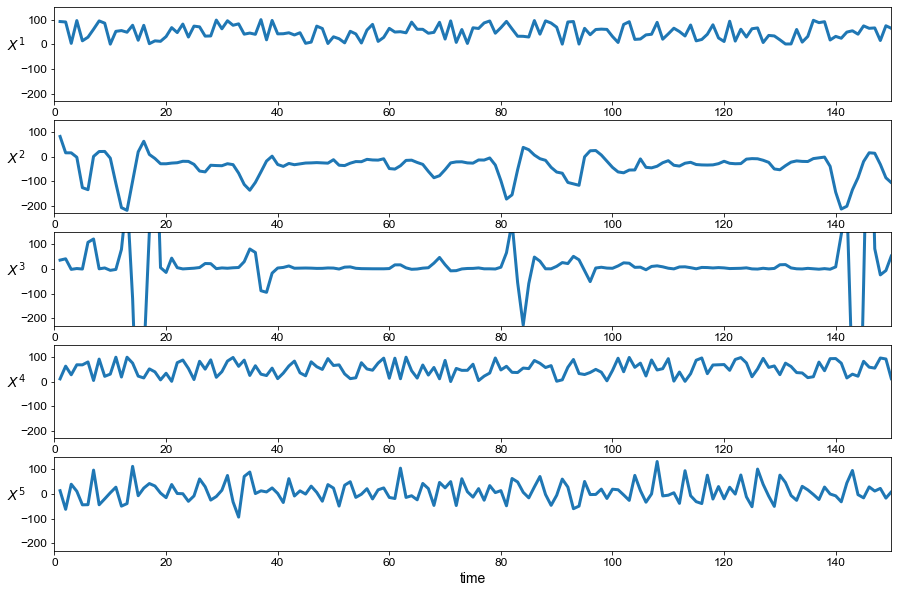

In [4]:
X = np.linspace(1,30000,30000).astype(int)
f_0, axes_0 = plt.subplots(5, 1, figsize=(15,10))

for i in range(5):
    k=i+1
    plt.subplot(5, 1, k)
    plt.plot(X, df[f'$X^{k}$'], linewidth=3)
    plt.xlabel('time', fontproperties = 'Arial', size=14)
    plt.ylabel(f'$X^{k}$', fontproperties = 'Arial', size=14, rotation=0)
    plt.yticks(fontproperties = 'Arial', size = 12)
    plt.xticks(fontproperties = 'Arial', size = 12)
    plt.xlim((0,150))
    plt.ylim((-230,150))

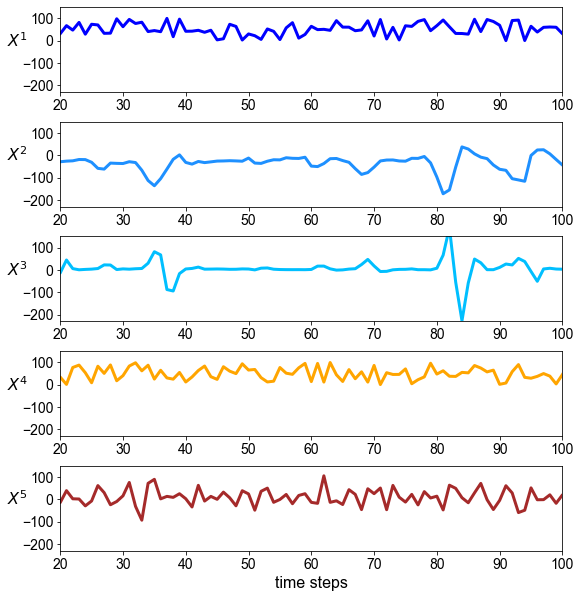

In [5]:
X = np.linspace(1,30000,30000).astype(int)
f_0, axes_0 = plt.subplots(5, 1, figsize=(9,10))

plt.subplot(5, 1, 1)
plt.plot(X, df['$X^1$'], linewidth=3, color='b')
plt.ylabel('$X^1$', fontproperties = 'Arial', size=16, rotation=0)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xticks(fontproperties = 'Arial', size = 14)
plt.xlim((20,100))
plt.ylim((-230,150))

plt.subplot(5, 1, 2)
plt.plot(X, df['$X^2$'], linewidth=3, color='dodgerblue')
plt.ylabel('$X^2$', fontproperties = 'Arial', size=16, rotation=0)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xticks(fontproperties = 'Arial', size = 14)
plt.xlim((20,100))
plt.ylim((-230,150))

plt.subplot(5, 1, 3)
plt.plot(X, df['$X^3$'], linewidth=3, color='deepskyblue')
plt.ylabel('$X^3$', fontproperties = 'Arial', size=16, rotation=0)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xticks(fontproperties = 'Arial', size = 14)
plt.xlim((20,100))
plt.ylim((-230,150))

plt.subplot(5, 1, 4)
plt.plot(X, df['$X^4$'], linewidth=3, color='orange')
plt.ylabel('$X^4$', fontproperties = 'Arial', size=16, rotation=0)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xticks(fontproperties = 'Arial', size = 14)
plt.xlim((20,100))
plt.ylim((-230,150))

plt.subplot(5, 1, 5)
plt.plot(X, df['$X^5$'], linewidth=3, color='brown')
plt.xlabel('time steps', fontproperties = 'Arial', size=16)
plt.ylabel('$X^5$', fontproperties = 'Arial', size=16, rotation=0)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xticks(fontproperties = 'Arial', size = 14)
plt.xlim((20,100))
plt.ylim((-230,150))

plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.savefig('C:/Users/zhipe/OneDrive/Desktop/Master thesis/codes/examples/results/4_02.jpg', 
            bbox_inches = 'tight',
            pad_inches=0.2,
            dpi=300)


In [6]:
data_use = df
feature_names = data_use.columns.tolist()

In [7]:
df_process = df.copy()

for i in feature_names:
    q3, q1 = np.percentile(df_process[i], [90 ,10])
    iqr = q3 - q1
    upper = q3 + 2 * iqr
    lower = q1 - 2 * iqr
    df_process[i][df_process[i]>upper] = (upper + 0.01)
    df_process[i][df_process[i]<lower] = (lower - 0.01)

    n = len(df_process)
    j = 1
    while j < (n-1):
        if df_process[i][j] > upper or df_process[i][j] < lower:
            n_start = j-1
            n_end = j+1
            for k in range(n):
                if df_process[i][n_end] > upper or df_process[i][n_end] < lower:
                    n_end += 1
                    if n_end == n-1:
                        break
                else: 
                    break
            num = n_end - n_start - 1
            for l in range(num):
                df_process[i][j+l] = ((df_process[i][n_end] 
                                       - df_process[i][n_start]) 
                                      / (num+1) 
                                      * (l+1) 
                                      + df_process[i][n_start])
            j += num
        j += 1
                              
df_process          

$X^1$       $X^2$       $X^3$      $X^4$      $X^5$
0      91.874701   81.968469   36.579959  11.134664  13.647739
1      90.071485   15.602917   41.879583  62.643723 -61.811205
2       3.342143   15.496380   -0.928859  27.678789  39.940721
3      95.694934   -2.365061    2.467731  68.217467  11.397723
4      13.720932 -125.612366    0.401689  67.897078 -43.622293
...          ...         ...         ...        ...        ...
29995  59.470977    0.006866   32.636709   6.533027   8.319209
29996  55.152473   52.475587 -158.311163  12.102702  31.489051
29997   8.837275   34.402427   19.832689   5.784306  16.424199
29998   9.350728  -29.029900   25.426484  12.197703  -1.375757
29999  19.845247  -79.312032   31.020279  38.807362   4.752034

[30000 rows x 5 columns]

In [8]:
ce = causal_ensemble(df_process, feature_names, num_parts=12, threshold=0.3)

# 1. CCM 

In [9]:
causal_ccm_parts = ce.ccm(lag=1, 
                          embed=6, 
                          split_percent=0.75, 
                          num_iter=25, 
                          convergence_threshold=0.03)

In [10]:
causal_ccm_parts

array([[[0.    , 0.3234, 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.8521, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.344 ],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.3696, 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7373, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3279],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.3822, 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7969, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3195],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.378 , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7482, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3466],
        [0.    , 0.    , 0.    , 0.    , 0. 

# 2. TE

In [11]:
causal_nte_parts = ce.nte(k=6, max_lag=6)

In [12]:
causal_nte_parts

array([[[0.    , 0.    , 0.    , 0.3284, 0.    ],
        [0.    , 0.    , 0.774 , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7775, 0.    , 0.404 ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3485],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7747, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.36  , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.7779, 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0. 

# 3. PCMCI

In [13]:
pc_alpha = [0.01, 0.02, 0.03, 0.04, 0.05]
causal_pcmciplus_parts = ce.pcmciplus(max_lag=6, 
                                      pc_alpha=pc_alpha, 
                                      cond_ind_test='parCorr')


##
## Optimizing pc_alpha over pc_alpha_list = [0.01, 0.02, 0.03, 0.04, 0.05]
##

## pc_alpha = 0.01 (1/5):

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1

##
## Optimizing pc_alpha over pc_alpha_list = [0.01, 0.02, 0.03, 0.04, 0.05]
##

## pc_alpha = 0.01 (1/5):

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1

##
## Optimizing pc_alpha over pc_alpha_list = [0.01, 0.02, 0.03, 0.04, 0.05]
##

## pc_alpha = 0.01 (1/5):



##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1


## Variable $X^1$


## Variable $X^1$


Iterating through pc_alpha = [0.01]:
Iterating through pc_alpha = [0.01]:
##
## Optimi

    Subset 0: () gives pval = 0.79909 / val = -0.004
    Non-significance detected.

    Link ($X^2$ -5) --> $X^1$ (11/30):

    Link ($X^2$ -5) --> $X^1$ (11/30):    Subset 0: () gives pval = 0.18634 / val = -0.022
    Subset 0: () gives pval = 0.14181 / val =  0.024    Subset 0: () gives pval = 0.16054 / val = -0.023
    Non-significance detected.

    Subset 0: () gives pval = 0.74288 / val = -0.005

    Non-significance detected.

    Link ($X^2$ -5) --> $X^1$ (11/30):

    Link ($X^2$ -3) --> $X^1$ (9/30):    Non-significance detected.

    Link ($X^2$ -5) --> $X^1$ (11/30):
    Non-significance detected.    Subset 0: () gives pval = 0.40795 / val =  0.014    Subset 0: () gives pval = 0.46591 / val =  0.012
    Subset 0: () gives pval = 0.82177 / val =  0.004    Subset 0: () gives pval = 0.21866 / val =  0.020
    Non-significance detected.

    Non-significance detected.

    Link ($X^2$ -5) --> $X^1$ (11/30):

    Link ($X^2$ -4) --> $X^1$ (10/30):


    Link ($X^2$ -3) --> $X^1


    Subset 0: () gives pval = 0.13222 / val = -0.025    Non-significance detected.

    Link ($X^3$ -6) --> $X^1$ (18/30):
    Subset 0: () gives pval = 0.36437 / val = -0.015

    Non-significance detected.
    Subset 0: () gives pval = 0.04379 / val = -0.033
    Link ($X^4$ -2) --> $X^1$ (20/30):
    Link ($X^4$ -2) --> $X^1$ (20/30):
    Non-significance detected.




    Link ($X^4$ -3) --> $X^1$ (21/30):
    Subset 0: () gives pval = 0.09525 / val =  0.027
    Non-significance detected.
    Subset 0: () gives pval = 0.06636 / val =  0.030
    Non-significance detected.
    Non-significance detected.

    Link ($X^4$ -5) --> $X^1$ (23/30):
    Subset 0: () gives pval = 0.22214 / val = -0.020
    Non-significance detected.
    Subset 0: () gives pval = 0.00739 / val = -0.044    Subset 0: () gives pval = 0.53583 / val = -0.010
    Link ($X^4$ -3) --> $X^1$ (21/30):
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^1$ (21/30):

    Link ($X^4$ -1) --> $X^1$ (19/30):


    Link ($X^5$ -6) --> $X^1$ (30/30):

    Variable $X^1$ has 0 link(s):

Algorithm converged for variable $X^1$

## Variable $X^2$

    Subset 0: () gives pval = 0.97610 / val = -0.000
    Non-significance detected.

Iterating through pc_alpha = [0.01]:
    Subset 0: () gives pval = 0.70197 / val = -0.006
Testing condition sets of dimension 0:


    Link ($X^5$ -5) --> $X^1$ (29/30):    Subset 0: () gives pval = 0.07433 / val =  0.029    Subset 0: () gives pval = 0.66399 / val =  0.007
# pc_alpha = 0.01 (1/1):    Subset 0: () gives pval = 0.41967 / val =  0.013
    Non-significance detected.


Testing condition sets of dimension 0:

    Link ($X^5$ -5) --> $X^1$ (29/30):


    Link ($X^1$ -1) --> $X^2$ (1/30):
    Non-significance detected.
    Non-significance detected.

    Link ($X^5$ -6) --> $X^1$ (30/30):

    Link ($X^1$ -1) --> $X^2$ (1/30):    Non-significance detected.


    Subset 0: () gives pval = 0.23332 / val = -0.019    Subset 0: () gives pval = 0.24178 / val = -0.019


    Subset 0: () gives pval = 0.05355 / val =  0.032
    Non-significance detected.
    Subset 0: () gives pval = 0.00000 / val = -0.273
    Link ($X^3$ -1) --> $X^2$ (13/30):

    Link ($X^3$ -2) --> $X^2$ (14/30):
    Subset 0: () gives pval = 0.45294 / val = -0.012
    No conditions of dimension 0 left.
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/30):


    Link ($X^3$ -2) --> $X^2$ (14/30):
    Subset 0: () gives pval = 0.00000 / val = -0.210    Subset 0: () gives pval = 0.00000 / val = -0.224

    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^2$ (12/30):

    Link ($X^2$ -6) --> $X^2$ (12/30):    Subset 0: () gives pval = 0.00947 / val =  0.042    Subset 0: () gives pval = 0.00000 / val = -0.258
    Subset 0: () gives pval = 0.00000 / val =  0.134    Subset 0: () gives pval = 0.00000 / val = -0.392
    No conditions of dimension 0 left.

    Subset 0: () gives pval = 0.92335 / val = -0.002

    Link ($X^


    Link ($X^4$ -6) --> $X^2$ (24/30):

    Link ($X^4$ -4) --> $X^2$ (22/30):


    Subset 0: () gives pval = 0.00001 / val =  0.073
    No conditions of dimension 0 left.
    Non-significance detected.

    Link ($X^4$ -5) --> $X^2$ (23/30):

    Link ($X^4$ -2) --> $X^2$ (20/30):
    Link ($X^5$ -3) --> $X^2$ (27/30):

    Link ($X^5$ -2) --> $X^2$ (26/30):
    Subset 0: () gives pval = 0.12724 / val =  0.025
    Subset 0: () gives pval = 0.05858 / val =  0.031

    Non-significance detected.
    Non-significance detected.

    Link ($X^5$ -2) --> $X^2$ (26/30):

    Link ($X^5$ -1) --> $X^2$ (25/30):
    Subset 0: () gives pval = 0.12950 / val =  0.025    Subset 0: () gives pval = 0.00028 / val =  0.059
    Subset 0: () gives pval = 0.26571 / val =  0.018
    No conditions of dimension 0 left.
    Non-significance detected.

    Link ($X^5$ -2) --> $X^2$ (26/30):

    Non-significance detected.
    Subset 0: () gives pval = 0.17231 / val =  0.022
    Link ($X^4$ -6) --> $X^2$ (24/

    Subset 0: ($X^1$ -4)  gives pval = 0.00000 / val =  0.694
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/15):
    Subset 0: ($X^1$ -4)  gives pval = 0.00000 / val =  0.695
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/15):
    Subset 0: () gives pval = 0.54369 / val =  0.010
    Non-significance detected.

    Link ($X^5$ -6) --> $X^2$ (30/30):
    Subset 0: () gives pval = 0.00000 / val =  0.081    Subset 0: ($X^2$ -4)  gives pval = 0.00000 / val =  0.615
    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^2$ (28/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.454

    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (3/15):
    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (2/18):
    Subset 0: () gives pval = 0.65248 / val =  0.007
    Non-significance detected.

    Link ($X^5$ -6) --> $X^2$ (30/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.15

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.164    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.510
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^2$ (6/15):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.121
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^2$ (5/16):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.520    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.138
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^2$ (6/16):

    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (4/16):
    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^2$ (5/18):
    Subset 0: ($X^2$ -1)  gives pval = 0.00009 / val =  0.064
    No conditions of dimension 1 left.

    Link ($X^2$ -5) --> $X^2$ (7/15):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.162
    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (4/15):
    Subset 0: ($X^2$

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.158
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^2$ (14/15):
    No conditions of dimension 1 left.    Subset 0: ($X^2$ -1)  gives pval = 0.00178 / val = -0.051
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^2$ (14/15):


    Link ($X^1$ -3) --> $X^2$ (12/16):
    Subset 0: ($X^2$ -1)  gives pval = 0.00496 / val =  0.046
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^2$ (14/17):
    Subset 0: ($X^2$ -1)  gives pval = 0.06334 / val =  0.030    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.651
    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^2$ (13/16):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.135    Non-significance detected.
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^2$ (13/18):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.217


    Link ($X^5$ -2) --> $X^2$ (15/15):
    No conditions of 

    No conditions of dimension 1 left.
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.126
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.123
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.121
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.110
        ($X^3$ -1): max_pval = 0.00001, min_val =  0.074
        ($X^5$ -2): max_pval = 0.00046, min_val =  0.057
        ($X^3$ -5): max_pval = 0.00874, min_val =  0.043

Testing condition sets of dimension 2:

    Link ($X^2$ -1) --> $X^2$ (1/13):


    Link ($X^3$ -2) --> $X^2$ (17/18):
    Subset 0: ($X^2$ -1)  gives pval = 0.00082 / val = -0.055
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 14 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.680
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.433
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.275
        ($X

    Link ($X^3$ -3) --> $X^2$ (5/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.220
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^2$ (7/13):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.258    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.525
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/14):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (6/14):
    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.536
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/17):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.331
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.163    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.217    Still subsets of dimension 2 left, but q_max 

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.01611 / val =  0.039
    Non-significance detected.

    Link ($X^3$ -5) --> $X^2$ (13/13):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00184 / val = -0.051    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.116
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -3) --> $X^2$ (14/15):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (10/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.092
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^2$ (14/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.093
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^2$ (12/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.03478 / val =  0.035
    Non-significance detected.

    Sorting parents in decreasing order with 
    w

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.02892 / val = -0.036    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.765
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 11 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.684
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.425
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.290
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.277
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.178
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.140
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.126
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.123
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.121
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.110
        ($X^5$ -2): max_pval = 0.00046, min_val =  0.057

    Still subsets of dimen

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val = -0.534    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.15926 / val = -0.023    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.529
    Non-significance detected.

    Link ($X^1$ -6) --> $X^2$ (7/12):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/13):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val = -0.522
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/12):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val = -0.533
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/11):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.182
    Still subsets of d

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.182
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (11/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.459
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (10/11):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.150
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (9/13):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00008 / val = -0.064
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (11/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.456
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (9/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / v

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.03900 / val =  0.034    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.208
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (11/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.154

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (11/14):
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (11/13):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00001 / val = -0.071
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.704    Still subsets of dimension 3 left, but q_max = 1 reached.
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):


    Link ($X^5$ -2) --> $X^2$ (11/11):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.082    Subse

    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.726
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/10):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.705
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.135
    Still subsets of dimension 4 left, but q_max = 1 reached.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.03808 / val = -0.034

    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.539    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.719
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.194
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.464    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.554
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (12/16):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/11):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.158
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/10):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.198
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/12):
    Subset 0: ($X^2$ -1) ($X^1

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.170
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^2$ (6/11):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val =  0.713
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/8):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.409    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00069 / val = -0.055
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^2$ (15/16):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.229

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/10):
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (8/9):
    Subset 0: ($X^2$ 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val =  0.161    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.09705 / val =  0.027    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.092

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^2$ (11/12):

    Still subsets of dimension 5 left, but q_max = 1 reached.    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.671
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.415
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.334
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.161
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.122
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.121
        ($

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.181    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val =  0.711
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.64510 / val = -0.008    Still subsets of dimension 5 left, but q_max = 1 reached.


    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:
    Link ($X^1$ -4) --> $X^2$ (2/9):    Still subsets of dimension 5 left, but q_max = 1 reached.
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.54105 / val = -0.010


    Variable $X^2$ has 10 link(s):

    Link ($X^2$ -2) --> $X^2$ (8/8):    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.388    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.091
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val =  0.093    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (8/8):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.675
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.422
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.298
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.184
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.146
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.113
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.104
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.099
        ($X^

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.131    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.081
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.00000 / val = -0.539    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^2$ (6/10):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/8):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (11/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.372
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (8/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.71227 / val = -0.006
    Non-significance detected.

    Link ($X^1$ -6) --> 

        ($X^1$ -5): max_pval = 0.00000, min_val =  0.143
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.124
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.117
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.097
        ($X^3$ -1): max_pval = 0.00003, min_val =  0.068

Testing condition sets of dimension 6:

    Link ($X^2$ -1) --> $X^2$ (1/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.69815 / val = -0.006
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (6/8):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -3) ($X^1$ -6)  gives pval = 0.00000 / val = -0.555
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/9):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.716
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):
    Subset 0: () 

    Subset 0: () gives pval = 0.89061 / val = -0.002
    Non-significance detected.

    Link ($X^1$ -2) --> $X^3$ (2/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.07448 / val =  0.029
    Non-significance detected.

    Link ($X^1$ -6) --> $X^2$ (5/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.427
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (9/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.548    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.00000 / val = -0.536

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/8):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val =  0.138
    Still su


    Link ($X^1$ -6) --> $X^2$ (5/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val = -0.379
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (9/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.35616 / val = -0.015
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.700    Subset 0: () gives pval = 0.27427 / val =  0.018    Non-significance detected.
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):

    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (12/30):


    Link ($X^3$ -1) --> $X^2$ (9/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.131    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^1$ -5) 

    Subset 0: () gives pval = 0.00000 / val =  0.075
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^3$ (7/30):
    Subset 0: () gives pval = 0.03783 / val =  0.034
    Non-significance detected.

    Link ($X^3$ -6) --> $X^3$ (18/30):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^1$ -5) ($X^2$ -2)  gives pval = 0.00000 / val =  0.724
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val = -0.544
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/9):
    Subset 0: () gives pval = 0.76298 / val = -0.005
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (4/30):
    Subset 0: () gives pval = 0.00000 / val =  0.142
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (5/30):
    Subset 0: () gives pval = 0.07135 / val = 

    Subset 0: () gives pval = 0.10139 / val = -0.027    Subset 0: () gives pval = 0.00001 / val =  0.073

    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^3$ (9/30):
    Non-significance detected.

    Link ($X^4$ -6) --> $X^3$ (24/30):
    Subset 0: () gives pval = 0.00000 / val = -0.132    Subset 0: () gives pval = 0.00000 / val =  0.284
    No conditions of dimension 0 left.

    Link ($X^3$ -1) --> $X^3$ (13/30):

    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.00014 / val =  0.062

    Link ($X^2$ -4) --> $X^3$ (10/30):

    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^3$ (19/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^3$ -1)  gives pval = 0.00000 / val = -0.119
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (8/9):
    Subset 0: () gives pval = 0.02897 / val =  0.036
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (4/30)

    Non-significance detected.

    Link ($X^1$ -3) --> $X^3$ (3/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00001 / val = -0.074    Subset 0: () gives pval = 0.00000 / val =  0.310
    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^3$ (11/14):

    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.201
    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^3$ (4/14):
    Subset 0: () gives pval = 0.78616 / val =  0.004    Subset 0: () gives pval = 0.00000 / val = -0.142
    No conditions of dimension 0 left.

    Link ($X^3$ -1) --> $X^3$ (13/30):

    Non-significance detected.

    Link ($X^5$ -5) --> $X^3$ (29/30):
    Subset 0: () gives pval = 0.04001 / val =  0.034    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.26335 / val = -0.018
    Non-significance detected.

    Link ($X^2$ -4) --> $X^2$ (4/9):

    Non-sign

    Subset 0: () gives pval = 0.25660 / val =  0.019    Subset 0: () gives pval = 0.00000 / val =  0.239
    Non-significance detected.

    Link ($X^2$ -3) --> $X^3$ (9/30):

    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^3$ (11/30):
    Subset 0: () gives pval = 0.02180 / val = -0.038
    Non-significance detected.

    Link ($X^5$ -4) --> $X^3$ (28/30):
    Subset 0: () gives pval = 0.00000 / val =  0.081
    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^3$ (19/30):
    Subset 0: () gives pval = 0.72116 / val = -0.006    Subset 0: () gives pval = 0.69833 / val =  0.006
    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (25/30):

    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (25/30):
    Subset 0: ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.354
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (2/12):
    Subset 0: () gives pval = 0.00000 / val =  0.321
    No conditi

    Subset 0: () gives pval = 0.00000 / val =  0.200    Subset 0: () gives pval = 0.00000 / val = -0.105
    No conditions of dimension 0 left.

    Link ($X^3$ -3) --> $X^3$ (15/30):

    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^3$ (11/30):
    Subset 0: () gives pval = 0.92582 / val =  0.002
    Non-significance detected.

    Link ($X^5$ -6) --> $X^3$ (30/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.135
    No conditions of dimension 1 left.    Subset 0: () gives pval = 0.00597 / val = -0.045
    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^3$ (17/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.335
    Subset 0: () gives pval = 0.68216 / val =  0.007
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (8/16):


    Link ($X^3$ -4) --> $X^3$ (13/14):    Non-significance detected.

    Link ($X^1$ -2) --> $X^3$ (2/30):

    Subset 0: () gives pval = 0.04020 / val =  0.034
    Non-significance de

    Subset 0: () gives pval = 0.91423 / val = -0.002    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.174
    Non-significance detected.

    Link ($X^4$ -2) --> $X^3$ (20/30):

    No conditions of dimension 1 left.

    Link ($X^2$ -6) --> $X^3$ (8/14):
    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val = -0.368    Subset 0: () gives pval = 0.66982 / val = -0.007
    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (17/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/12):
    Subset 0: () gives pval = 0.00000 / val =  0.085    Subset 0: () gives pval = 0.44452 / val = -0.013

    Non-significance detected.

    Link ($X^4$ -3) --> $X^3$ (21/30):
    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val =  0.368    No conditions of dimension 0 left.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.372

    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^3$ (5/14):
    No conditions of 

    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.185    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.248
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (6/12):

    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (9/14):
    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val = -0.080
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (8/14):
    Subset 0: () gives pval = 0.51116 / val =  0.011    Subset 0: ($X^3$ -1)  gives pval = 0.00001 / val = -0.071

    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^3$ (12/14):
    Non-significance detected.

    Link ($X^4$ -4) --> $X^3$ (22/30):
    Subset 0: () gives pval = 0.07354 / val = -0.029    Subset 0: () gives pval = 0.02920 / val =  0.036
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (12/30):

    Subset 0: () gives pval = 0.00034 / val = -0.059    Non-significance detected.
    No conditions of 

    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val = -0.244    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.141
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (7/15):

    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^3$ (12/14):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.160    Subset 0: () gives pval = 0.00484 / val = -0.046

    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^3$ (26/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.270
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^3$ (2/13):
    No conditions of dimension 1 left.
    Subset 0: () gives pval = 0.38325 / val = -0.014    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val = -0.234
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/8):


    Link ($X^5$ -1) --> $X^3$ (13/14):
    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (17/30)

    Subset 0: () gives pval = 0.00000 / val =  0.087    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.273
    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^3$ (4/15):

    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00013 / val =  0.062    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^3$ (19/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 10 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.316
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.298
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.228
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.185
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.153
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.148
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.146
        ($X^1$ -4): max_pval = 0.00

    Subset 0: () gives pval = 0.08819 / val = -0.028
    Non-significance detected.

    Link ($X^4$ -6) --> $X^3$ (24/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.207
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (5/10):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.81234 / val = -0.004
    Non-significance detected.

    Link ($X^2$ -4) --> $X^3$ (9/14):
    Subset 0: () gives pval = 0.02197 / val = -0.037    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.198
    Non-significance detected.

    Link ($X^5$ -2) --> $X^3$ (26/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (7/14):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.088
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^3$ (11/13):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.241    Subset 0: ($X^3$ -1)  gives pval 

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.01706 / val = -0.039    Subset 0: () gives pval = 0.45425 / val = -0.012
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.379    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 6 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.329
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.268
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.216
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.181
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.153
        ($X^3$ -5): max_pval = 0.00003, min_val =  0.069
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/14):


Testing condition sets of dimension 5:

    Link ($X^2$ -3) --> $X^3$ (1/6):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.1

    Subset 0: ($X^3$ -1)  gives pval = 0.01647 / val =  0.039    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.43460 / val = -0.013
    Non-significance detected.

    Link ($X^1$ -5) --> $X^3$ (5/11):

    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.347
    No conditions of dimension 1 left.    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.252    Non-significance detected.

    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^3$ (3/14):

    Link ($X^5$ -3) --> $X^3$ (14/15):


    Link ($X^1$ -5) --> $X^3$ (4/14):    Subset 0: ($X^3$ -1)  gives pval = 0.25306 / val = -0.019

    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 14 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.303
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.299
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): m


    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/12):
    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val =  0.292
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (4/14):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.118    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.196    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val =  0.312
    Still subsets of dimension 3 left, but q_max = 1 reached.
    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^3$ (8/14):


    Link ($X^1$ -4) --> $X^3$ (5/9):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -2)  gives pval = 0.00000 / val =  0.288
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.137    Still subsets of dimension 2 left, but q_max = 1 reached.
    No conditions of dimension 1 left.

    Link ($X^2$ -6) --> $X^3$ (7/14):


    Subset 0: ($X^2$ -3) ($X^3$ -1)  give

    Subset 0: () gives pval = 0.03816 / val = -0.034
    Non-significance detected.

    Link ($X^2$ -5) --> $X^4$ (11/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val = -0.127
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (10/13):
    Subset 0: ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.372
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (2/14):
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.395    Subset 0: ($X^1$ -5) ($X^2$ -1) ($X^3$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.414
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.156    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/10):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (10/12):

    Still subsets of dimension 4 left, but q_max =

    Link ($X^3$ -1) --> $X^3$ (3/12):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.67444 / val = -0.007
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (9/14):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.07894 / val = -0.029
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (8/13):
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5)  gives pval = 0.00000 / val =  0.369
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/7):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.111
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.311

    Link ($X^2$ -6) --> $X^3$ (9/10):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/11):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.312
    S

    Subset 0: () gives pval = 0.42054 / val =  0.013
    Non-significance detected.

    Link ($X^5$ -2) --> $X^4$ (26/30):
    Subset 0: ($X^1$ -5) ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val =  0.185
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/8):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2)  gives pval = 0.00000 / val = -0.125
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (7/12):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^3$ -5)  gives pval = 0.00000 / val =  0.151    Subset 0: () gives pval = 0.70305 / val = -0.006
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/7):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00283 / val = -0.049
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (12/13):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -4) ($X^3

    Subset 0: () gives pval = 0.38903 / val = -0.014
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^4$ has 1 link(s):
        ($X^3$ -4): max_pval = 0.00079, min_val =  0.055

Algorithm converged for variable $X^4$

## Variable $X^5$

Iterating through pc_alpha = [0.01]:

# pc_alpha = 0.01 (1/1):

Testing condition sets of dimension 0:

    Link ($X^1$ -1) --> $X^5$ (1/30):
    Subset 0: ($X^1$ -5) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.379    Subset 0: ($X^1$ -5) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.395

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (2/9):
    Still subsets of dimension 3 left, but q_max = 1 reached.
    Subset 0: ($X^1$ -5) ($X^2$ -3) ($X^3$ -1)  gives pval = 0.81625 / val = -0.004
    Link ($X^1$ -5) --> $X^3$ (2/9):

    Non-significance detected.

    Sorting par

    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:


    Variable $X^3$ has 11 link(s):
    Link ($X^2$ -4) --> $X^3$ (7/10):    Subset 0: () gives pval = 0.00000 / val =  0.422
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^5$ (6/30):


        ($X^2$ -1): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.231
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.208
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.171
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.158
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.125
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.104
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.094
        ($X^3$ -5): max_pval = 0.00008, min_val =  0.064
        ($X^1$ -6): max_pval = 0.00021, min_val =  0.061
        ($X^5$ -1): max_pval = 0.00048, min_val =  0.057

Testing con

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.386    Subset 0: () gives pval = 0.76841 / val =  0.005

    Non-significance detected.

    Link ($X^2$ -5) --> $X^5$ (11/30):
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/8):    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.123

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (7/7):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.327    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.03496 / val = -0.035

    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (9/9):
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (4/12):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.04365 / val = -0.033
    Non-s

    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.44592 / val =  0.012

    Non-significance detected.

    Link ($X^1$ -4) --> $X^4$ (4/30):

    Link ($X^3$ -3) --> $X^5$ (15/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.00000 / val = -0.225    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val =  0.375
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^3$ -2)  gives pval = 0.00000 / val = -0.246

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (7/9):
    Still subsets of dimension 5 left, but q_max = 1 reached.    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/10):


    Link ($X^1$ -5) --> $X^3$ (6/12):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2)  gives pval = 0.00000 / val =  0.312
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.182
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/6):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.091
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (10/11):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.07184 / val =  0.029
    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (9/12):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.145
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/6):
    Subset 0: () gives pval = 0.02906 / val = -0.036
    Non-significance detected.

    Link ($X^2$ -4) --> $X^4$ (10/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^3$ -5)  gives pval = 0.00000 / val =  0.

    Link ($X^1$ -4) --> $X^4$ (4/30):    Subset 0: () gives pval = 0.63254 / val =  0.008

    Non-significance detected.

    Link ($X^1$ -4) --> $X^4$ (4/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^2$ -6) ($X^1$ -4)  gives pval = 0.00000 / val = -0.269    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val = -0.171
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^3$ (2/11):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (12/12):
    Subset 0: () gives pval = 0.92367 / val =  0.002
    Subset 0: () gives pval = 0.00000 / val = -0.240    Non-significance detected.


    Link ($X^3$ -3) --> $X^4$ (15/30):
    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^5$ (26/30):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val =  0.368
    Still subsets of dimension 5 left, but q_max = 

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (4/7):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6) ($X^1$ -4)  gives pval = 0.00000 / val = -0.273
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (5/11):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5) ($X^1$ -4)  gives pval = 0.00000 / val = -0.320
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/10):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^2$ -4)  gives pval = 0.00000 / val =  0.124
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/11):
    Subset 0: () gives pval = 0.07201 / val = -0.029
    Non-significance detected.

    Link ($X^2$ -3) --> $X^4$ (9/30):
    Subset 0: () gives pval = 0.23293 / val = -0.020
    Non-significance detected.

    Link ($X^4$ -2) --> $X^4$ (20/30):
    Subset


    Link ($X^5$ -2) --> $X^3$ (9/11):
    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val = -0.270
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/10):    Subset 0: () gives pval = 0.90058 / val =  0.002    Subset 0: () gives pval = 0.71361 / val = -0.006

    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):
    Subset 0: () gives pval = 0.10464 / val =  0.027

    Non-significance detected.    Non-significance detected.

    Link ($X^1$ -5) --> $X^4$ (5/30):


    Link ($X^3$ -2) --> $X^4$ (14/30):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.140
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (8/11):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^2$ -6)  gives pval = 0.00000 / val =  0.086    Subset 0: ($X^4$ -3)  gives pval =

    Subset 0: () gives pval = 0.47258 / val =  0.012
    Non-significance detected.

    Link ($X^3$ -2) --> $X^4$ (14/30):
    Subset 0: () gives pval = 0.00000 / val =  0.415
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^5$ (6/30):
    Subset 0: () gives pval = 0.82274 / val = -0.004
    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):
    Subset 0: () gives pval = 0.34410 / val = -0.015    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val =  0.182

    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.089    Still subsets of dimension 6 left, but q_max = 1 reached.

    Subset 0: () gives pval = 0.05102 / val = -0.032    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^5$ (13/22):

    Non-significance detected.

    Link ($X^3$ -4) --> $X^4$ (16/30):
    Subset 0: () gives pval = 0.58594 / val =  0.009


    Subset 0: () gives pval = 0.98543 / val =  0.000    Non-significance detected.    Subset 0: ($X^4$ -3)  gives pval = 0.00005 / val = -0.066
    Subset 0: () gives pval = 0.72891 / val =  0.006

    Link ($X^2$ -5) --> $X^5$ (11/30):


    Non-significance detected.    Non-significance detected.

    Link ($X^1$ -3) --> $X^4$ (3/30):
    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^5$ (17/22):


    Link ($X^4$ -3) --> $X^4$ (21/30):
    Subset 0: () gives pval = 0.85281 / val =  0.003    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (7/11):

    Non-significance detected.    Subset 0: () gives pval = 0.07011 / val = -0.030


    Link ($X^3$ -2) --> $X^4$ (14/30):
    Non-significance detected.

    Link ($X^5$ -5) --> $X^4$ (29/30):
    Subset 0: () gives pval = 0.39694 / val = -0.014
    Non-significance d

    Subset 0: () gives pval = 0.18561 / val =  0.022
    Non-significance detected.

    Link ($X^2$ -1) --> $X^4$ (7/30):
    Subset 0: () gives pval = 0.16615 / val =  0.023
    Subset 0: () gives pval = 0.00008 / val =  0.065
    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^5$ (17/30):
    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):
    Subset 0: () gives pval = 0.98184 / val =  0.000
    Non-significance detected.

    Link ($X^1$ -3) --> $X^5$ (3/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00049 / val =  0.057    Subset 0: () gives pval = 0.44939 / val = -0.012

    Non-significance detected.    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^5$ (21/22):


    Link ($X^1$ -3) --> $X^5$ (3/30):
    Subset 0: () gives pval = 0.04296 / val = -0.033    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.41633 / val = -0.013

    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (1

    Subset 0: () gives pval = 0.26724 / val = -0.018    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^5$ (8/30):

    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00123 / val =  0.053    Non-significance detected.

    Link ($X^5$ -6) --> $X^4$ (30/30):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (9/10):
    Subset 0: () gives pval = 0.00000 / val = -0.120
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^5$ (8/30):
    Subset 0: () gives pval = 0.04423 / val =  0.033
    Subset 0: () gives pval = 0.00007 / val =  0.065    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):

    No conditions of dimension 0 left.

    Link ($X^4$ -5) --> $X^5$ (23/30):
    Subset 0: () gives pval = 0.61763 / val =  0.008
    Non-significance detected.

    Link ($X^5$ -5) --> $X^4$ (29/30):
    Subset 0: () gives pval = 0.00604 / val =  0.045
    N

    Subset 0: () gives pval = 0.62029 / val =  0.008
    Non-significance detected.

    Link ($X^5$ -4) --> $X^5$ (28/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.363
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/22):
    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^3$ -5)  gives pval = 0.00000 / val =  0.340
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/10):
    Subset 0: () gives pval = 0.74856 / val = -0.005
    Subset 0: () gives pval = 0.80812 / val = -0.004
    Non-significance detected.

    Link ($X^3$ -6) --> $X^4$ (18/30):
    Subset 0: () gives pval = 0.00025 / val =  0.060
    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^5$ (14/30):
    Subset 0: () gives pval = 0.00000 / val =  0.404    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -4) ($X^1$ -5) ($X^5$ -1) ($X^2$ -2)

    Subset 0: () gives pval = 0.01333 / val = -0.040
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (19/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ($X^5$ -1) ($X^2$ -2)  gives pval = 0.00000 / val = -0.182
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (6/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.129    Subset 0: () gives pval = 0.32183 / val = -0.016
    Non-significance detected.
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (11/22):
    Subset 0: () gives pval = 0.14335 / val =  0.024
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^3$ -5)  gives pval = 0.00000 / val =  0.078
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (6/10):

    Non-significance detected.

    Link ($X^1$ -4) --> $X^5$ (4/30):

    Link ($X^

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.138    Subset 0: () gives pval = 0.32255 / val = -0.016    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.81206 / val =  0.004


    Non-significance detected.

    Link ($X^3$ -2) --> $X^5$ (15/22):
    Non-significance detected.

    Link ($X^1$ -2) --> $X^4$ (2/30):
    No conditions of dimension 1 left.

    Link ($X^5$ -6) --> $X^5$ (8/22):
    Subset 0: () gives pval = 0.51915 / val =  0.011
    Non-significance detected.

    Link ($X^5$ -4) --> $X^4$ (28/30):
    Subset 0: () gives pval = 0.00000 / val = -0.096
    No conditions of dimension 0 left.

    Link ($X^5$ -1) --> $X^5$ (25/30):
    Subset 0: () gives pval = 0.00120 / val =  0.053    Subset 0: () gives pval = 0.00003 / val =  0.068    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^3$ -5)  gives pval = 0.00000 / val = -0.129

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ 

    Subset 0: ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^2$ -3) ($X^1$ -4) ($X^5$ -1) ($X^1$ -5) ($X^2$ -2) ($X^1$ -6)  gives pval = 0.00000 / val = -0.290    No conditions of dimension 0 left.
    Still subsets of dimension 9 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/10):


    Link ($X^5$ -6) --> $X^5$ (30/30):
    Subset 0: () gives pval = 0.39558 / val = -0.014
    Non-significance detected.

    Link ($X^2$ -1) --> $X^4$ (7/30):
    Subset 0: () gives pval = 0.56019 / val = -0.010
    Non-significance detected.

    Link ($X^1$ -2) --> $X^4$ (2/30):
    Subset 0: () gives pval = 0.00000 / val =  0.398
    No conditions of dimension 0 left.

    Link ($X^4$ -4) --> $X^5$ (22/30):
    Subset 0: () gives pval = 0.00197 / val = -0.051
    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^5$ (19/30):
    Subset 0: () gives pval = 0.00000 / val = -0.191
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) 

    Subset 0: () gives pval = 0.35835 / val =  0.015
    Non-significance detected.

    Link ($X^3$ -2) --> $X^4$ (14/30):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.197    Subset 0: () gives pval = 0.00000 / val = -0.146    Subset 0: () gives pval = 0.00006 / val = -0.065
    Subset 0: () gives pval = 0.56435 / val =  0.009

    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^5$ (24/30):

    Non-significance detected.

    Link ($X^3$ -6) --> $X^4$ (18/30):
    No conditions of dimension 0 left.    No conditions of dimension 1 left.    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val =  0.437

    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (3/20):

    Link ($X^2$ -1) --> $X^5$ (9/20):

    Link ($X^5$ -6) --> $X^5$ (30/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00017 / val = -0.062

    Subset 0: () gives pval = 0.75601 / val =  0.005    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^5$ (21/22):

    Subset 0: 

    Subset 0: () gives pval = 0.60881 / val = -0.008
    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):
    Subset 0: () gives pval = 0.44806 / val = -0.012
    Non-significance detected.

    Link ($X^1$ -5) --> $X^4$ (5/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.343
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/22):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val =  0.103
    No conditions of dimension 1 left.

    Link ($X^4$ -4) --> $X^5$ (16/20):
    Subset 0: ($X^4$ -3)  gives pval = 0.00028 / val =  0.059
    No conditions of dimension 1 left.

    Link ($X^1$ -1) --> $X^5$ (18/23):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.131
    No conditions of dimension 1 left.

    Link ($X^4$ -4) --> $X^5$ (11/20):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.299
    No conditions of dimension 1 left.    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.11249 / val =  0.026    Subset 0: () gives pval = 0.14812 / val =  0.024
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.03442 / val = -0.035    Non-significance detected.

    Link ($X^3$ -2) --> $X^5$ (14/22):


    Non-significance detected.

    Link ($X^3$ -6) --> $X^5$ (19/19):
    Non-significance detected.

    Link ($X^3$ -3) --> $X^4$ (15/30):
    Subset 0: () gives pval = 0.00000 / val =  0.083
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^5$ (7/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.466    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.114
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (3/21):
    Subset 0: ($X^4$ -3) ($X^5$ -2)  gives pval = 0.00000 / val =  0.514
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/22):

    No conditions of dimension 1 left.

    Link ($X^5$ -5) --> $X^5$ 

    Subset 0: ($X^4$ -3)  gives pval = 0.00042 / val =  0.058
    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^5$ (21/23):
    Subset 0: () gives pval = 0.00000 / val = -0.122    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.353
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^5$ (8/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/22):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.425    Subset 0: () gives pval = 0.85722 / val = -0.003
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/12):
    Non-significance detected.

    Link ($X^4$ -3) --> $X^4$ (21/30):

    Subset 0: ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.529
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/19):
    Subset 0: () gives pval = 0.99706 / val = -0.000
    Non

    Subset 0: () gives pval = 0.87270 / val =  0.003
    Non-significance detected.

    Link ($X^3$ -1) --> $X^5$ (13/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val = -0.446
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/12):

    Link ($X^5$ -4) --> $X^5$ (2/23):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.137
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (11/19):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.111
    No conditions of dimension 1 left.

    Link ($X^4$ -5) --> $X^5$ (12/21):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.346
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/19):
    Subset 0: () gives pval = 0.52944 / val =  0.010
    Non-significance detected.

    Link ($X^5$ -2) --> $X^4$ (26/30):
    Subset 0: () gives pval

    Subset 0: () gives pval = 0.00000 / val = -0.271    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val =  0.110

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (14/19):
    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^5$ (26/30):
    Subset 0: () gives pval = 0.00000 / val =  0.428
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^5$ (6/30):
    Subset 0: () gives pval = 0.00000 / val = -0.390
    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^5$ (27/30):
    Subset 0: () gives pval = 0.00000 / val = -0.094
    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^5$ (24/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00011 / val =  0.063
    No conditions of dimension 1 left.

    Link ($X^2$ -5) --> $X^5$ (20/21):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00154 / val =  0.052
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.101 

    Subset 0: ($X^5$ -2)  gives pval = 0.00000 / val =  0.496    Subset 0: () gives pval = 0.00009 / val = -0.064
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (2/22):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val =  0.460

    No conditions of dimension 1 left.

    Link ($X^1$ -5) --> $X^5$ (2/22):
    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^5$ (12/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.574
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/18):
    Subset 0: ($X^4$ -3) ($X^5$ -2)  gives pval = 0.00000 / val =  0.522    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00864 / val = -0.043
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.122
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (12/20):
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link 

    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.01291 / val =  0.041
    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (17/23):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.312
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^5$ (6/22):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.07674 / val =  0.029

    Non-significance detected.
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.343
    No conditions of dimension 1 left.
    Subset 0: ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val =  0.562
    Link ($X^4$ -1) --> $X^5$ (15/20):
    Link ($X^4$ -2) --> $X^5$ (6/22):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/18):

    Subset 0: () gives pval = 0.00011 / val =  0.063    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.381
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/18):

    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.30825 / val =  0.017
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 16 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.447
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.386
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.356
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.332
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.285
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.275
        ($X^4$ -5): max_pval = 0.00000, min_val =  0.143
        ($X^5$ -6): max_pval = 0.00000, min_val =  0.137
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.122
        ($X^5$ -1): max_pval = 0.00000, min_val =  0.120
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.097
        ($X^3$ -1): max_pval = 0.00003, min_val =  0.068
        ($X^4$ -4): max_pval = 0.00004, min_val =  0.

    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val =  0.129
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -4) --> $X^5$ (14/18):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00001 / val = -0.072
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2)  gives pval = 0.00767 / val = -0.044    Still subsets of dimension 2 left, but q_max = 1 reached.
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (13/18):


    Link ($X^4$ -1) --> $X^5$ (17/21):
    Subset 0: ($X^4$ -3)  gives pval = 0.00001 / val =  0.071    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.428    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.088    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.82304 / val = -0.004


    Non-significance detected.

    Link ($X^5$ -5) --> $X^5$ (13/20):
    No conditions of dimension 1 left.

    Link ($X^4$ -4) --> $X^5$ (17/22):

    Still s

    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.617
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/13):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.36630 / val = -0.015
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (11/14):
    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.608
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/15):
    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val =  0.526
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/17):
    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val =  0.531    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.354
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/22):
    Subset 0: ($X^4$ -

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.096
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.136    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^5$ (16/20):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (9/19):
    Subset 0: () gives pval = 0.00000 / val = -0.363    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.603
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.28167 / val = -0.018
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/15):
    No conditions of dimension 0 left.
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 13 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.447

    Link ($X^2$  0) o-o $X^3$ (16/40):
    Iterate thro

    Subset 0: ($X^4$ -3) ($X^5$ -2)  gives pval = 0.00001 / val = -0.075
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (12/22):
    Subset 0: ($X^4$ -3)  gives pval = 0.00032 / val =  0.059
    No conditions of dimension 1 left.

    Link ($X^1$ -1) --> $X^5$ (20/20):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.112    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val = -0.505
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/8):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^5$ (12/13):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.21728 / val =  0.020    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val =  0.139

    Non-significance detected.

    Link ($X^4$ -6) --> $X^5$ (9/14):
    Still subsets of dimension 2 left, but 

    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.664
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/9):
    Subset 0: () gives pval = 0.00000 / val =  0.100
    No conditions of dimension 0 left.

    Link ($X^3$  0) o-o $X^4$ (25/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -4) ]
    with conds_x = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.69298 / val = -0.006    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00001 / val = -0.072
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (20/22):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.20546 / val =  0.021
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}

    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00011 / val = -0.063

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:
    Link ($X^4$ -1) --> $X^5$ (7/8):


    Variable $X^5$ has 20 link(s):

Testing condition sets of dimension 3:

    Link ($X^4$ -3) --> $X^5$ (1/20):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.493
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/9):
    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.607    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.159
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (10/20):

    Still subsets of dimension 4 left, but q_max = 

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.102
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (13/20):
    Subset 0: ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.664    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.662
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/8):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/9):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val = -0.448    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.507
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (7/8):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/16):
    Subset 

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.17571 / val =  0.022    Still subsets of dimension 2 left, but q_max = 1 reached.
    Non-significance detected.
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00069 / val =  0.056


    Link ($X^4$ -1) --> $X^5$ (10/20):    Still subsets of dimension 5 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.442
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.406
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.388
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.359
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.301
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.283
        ($X^1$ -1): max_pval = 0.00000, min_val =  0.089
        ($X^2$ -1): max_pval = 0.00154, min_val =  0.052

T

Skeleton discovery phase        ($X^1$ -4): max_pval = 0.00000, min_val =  0.285
--------------------------

Testing contemporaneous condition sets of dimension 0: 

## pc_alpha = 0.02 (2/5):

    Link ($X^1$  0) o-o $X^2$ (1/40):

    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.168
##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:        ($X^4$ -2): max_pval = 0.00000, min_val =  0.275
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^5$ (13/20):

        ($X^5$ -1): max_pval = 0.00000, min_val =  0.103
        ($X^1$ -1): max_pval = 0.00071, min_val =  0.055

Testing condition sets of dimension 6:

    Link ($X^4$ -3) --> $X^5$ (1/8):

independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.02]
max_conds_dim = None
max_combinations = 1



## Variable

    Subset 0: () gives pval = 0.63704 / val = -0.008
    Non-significance detected.    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.02893 / val = -0.036


    Link ($X^3$ -1) --> $X^1$ (13/30):
    Non-significance detected.

    Link ($X^2$ -5) --> $X^5$ (16/20):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1)  gives pval = 0.00000 / val = -0.497
    Still subsets of dimension 6 left, but q_max = 1 reached.
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.480

    Link ($X^5$ -4) --> $X^5$ (4/8):    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/8):

    Subset 0: () gives pval = 0.97713 / val = -0.000
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (2/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ]
    with conds_x = [ ]
    Subset 0: () gives pva

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.417
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/18):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00147 / val =  0.052
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (19/20):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1)  gives pval = 0.00000 / val = -0.494
    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.90450 / val = -0.002
    Non-significance detected.

    Link ($X^4$ -2) --> $X^5$ (6/8):


    Link ($X^5$ -2) --> $X^1$ (26/30):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.16714 / val = -0.023
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 15 link(s):
        ($X^4$ 

    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.604    Subset 0: () gives pval = 0.00000 / val = -0.261    Subset 0: () gives pval = 0.00000 / val = -0.356

    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^2$ (11/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/13):
    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^2$ (3/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.440
    Subset 0: () gives pval = 0.00000 / val = -0.217    Subset 0: () gives pval = 0.00000 / val =  0.673
    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^1$ (12/40):
    Still subsets of dimension 4 left, but q_max = 1 reached.
    Already removed.

 

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -4) --> $X^5$ (12/18):
    Subset 0: () gives pval = 0.00000 / val =  0.670    Subset 0: () gives pval = 0.49956 / val = -0.011
    No conditions of dimension 0 left.
    Non-significance detected.


    Link ($X^2$  0) o-o $X^1$ (13/39):
    Already removed.

    Link ($X^2$ -1) --> $X^2$ (14/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^2$ -3) ($X^1$ -4) ]

    Link ($X^4$ -5) --> $X^2$ (23/30):
    Subset 0: () gives pval = 0.00000 / val =  0.152
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (6/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val 

    Subset 0: () gives pval = 0.63398 / val =  0.008    Subset 0: ($X^1$ -4)  gives pval = 0.00000 / val =  0.715
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (2/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val = -0.458

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/13):
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/17):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val = -0.106
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (10/15):
    Subset 0: () gives pval = 0.57718 / val = -0.009
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (5/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^3$ -1) ($X

        ($X^3$ -1): max_pval = 0.00257, min_val =  0.049

    Variable $X^3$ has 6 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.323
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val = -0.202
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.126
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.125

    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^2$ (12/17):
    Subset 0: () gives pval = 0.71854 / val =  0.006        ($X^2$ -4): max_pval = 0.00024, min_val =  0.060    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.665    Subset 0: () gives pval = 0.00000 / val =  0.174

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.447
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.386
        ($X^5$ -2): max_pval = 0.00000, min_val = -0.356
        ($X^5$ -4): max_pval = 0.000

    Subset 0: ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.790
    Still subsets of dimension 2 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.00000 / val = -0.531
    Link ($X^1$ -4) --> $X^2$ (2/15):    Subset 0: () gives pval = 0.00000 / val = -0.266
    No conditions of dimension 0 left.

    Link ($X^1$  0) o-o $X^3$ (4/39):
    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^3$ (17/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ($X^3$ -4) ]

    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^1$ -5) ($X^2$ -4) ]
    with conds_x = [ ]

    Subset 0: () gives pval = 0.00000 / val =  0.670
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^2$ -1)  gives pval = 0.00000 / val = -0.500    No conditions o

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.246
Updating parents:
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/15):


    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.420
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.414
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.393
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.338
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.316
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.301
        ($X^4$ -1): max_pval = 0.00000, min_val =  0.091
        ($X^1$ -1): max_pval = 0.00033, min_val =  0.059

Testing condition sets of dimension 5:

    Link ($X^4$ -3) --> $X^5$ (1/8):
    Subset 0: () gives pval = 0.00000 / val = -0.116    Subset 0: () gives pval = 0.77998 / val =  0.005    Subset 0: () gives pval = 0.00001 / val =  0.072


    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^4$ (19/39):


    Subset 0: () gives pval = 0.00000 / val = -0.177
    No conditions of dimension 0 left.

    Link ($X^3$  0) o-o $X^4$ (26/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6) ]
    Subset 0: () gives pval = 0.00000 / val =  0.296
    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^3$ (18/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ]
    with conds_x = [ ($X^2$ -5) ($X^1$ -8) ($X^1$ -7) ($X^2$ -6) ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.091
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (8/10):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.58424 / val = -0.009
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.03502 / 

    Subset 0: () gives pval = 0.14570 / val =  0.024    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.162
    Non-significance detected.

    Link ($X^3$ -1) --> $X^3$ (24/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ]
    with conds_x = [ ($X^2$ -4) ($X^3$ -2) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5) ($X^3$ -6) ($X^2$ -7) ]

    Still subsets of dimension 6 left, but q_max = 1 reached.
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (7/12):


    Link ($X^5$ -2) --> $X^5$ (4/10):
    Subset 0: () gives pval = 0.68626 / val =  0.007
    Non-significance detected.

    Link ($X^4$  0) o-o $X^1$ (28/39):
    Already removed.

    Link ($X^4$  0) o-o $X^2$ (29/39):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (30/39):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (31/39):
    Iterate through 1 subset(s) of conditions

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1)  gives pval = 0.00000 / val = -0.491
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (4/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -1) ($X^4$ -1)  gives pval = 0.00000 / val = -0.509
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (7/8):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1)  gives pval = 0.00000 / val = -0.512
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val = -0.083    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.488
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^5$ (14/14):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4




##
## Step 2: PC algorithm with contemp. conditions and MCI tests
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
pc_alpha = 0.01
contemp_collider_rule = majority
conflict_resolution = True
reset_lagged_links = False
max_conds_dim = None
max_conds_py = None
max_conds_px = None
max_conds_px_lagged = None
fdr_method = none

--------------------------

Testing condition sets of dimension 5:
Skeleton discovery phase
--------------------------

Testing contemporaneous condition sets of dimension 0: 
    Variable $X^1$ has 0 link(s):

    Link ($X^1$  0) o-o $X^2$ (1/43):


    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ]

    Link ($X^2$ -1) --> $X^2$ (1/8):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1)  gives pval = 0.00000 / val = -0.493
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -1) --

    Subset 0: () gives pval = 0.00000 / val = -0.243    Subset 0: () gives pval = 0.00000 / val = -0.526    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1)  gives pval = 0.00000 / val = -0.488
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/8):


    Link ($X^1$ -3) --> $X^2$ (8/8):
    No conditions of dimension 0 left.    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^2$ (3/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ]
    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val = -0.217


    Link ($X^4$ -3) --> $X^5$ (32/39):    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/11):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ]

    I

    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.505
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/9):
    Subset 0: () gives pval = 0.12843 / val =  0.025
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (12/30):
    Subset 0: () gives pval = 0.00450 / val = -0.046    Subset 0: () gives pval = 0.94150 / val =  0.001
    Non-significance detected.

    Link ($X^3$ -4) --> $X^1$ (16/30):
    No conditions of dimension 0 left.

    Link ($X^4$  0) o-o $X^2$ (28/39):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (29/39):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (30/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ]
    with conds_x = [ ]

    Subset 0: () gives pval = 0.00000 / val = -0.105
    No conditions of dimension 0 le


    Variable $X^1$ has 0 link(s):    Non-significance detected.

    Link ($X^5$ -4) --> $X^1$ (28/30):


    Variable $X^2$ has 4 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)
    Subset 0: () gives pval = 0.69106 / val =  0.007
    Non-significance detected.

    Link ($X^4$ -5) --> $X^3$ (23/30):

    Variable $X^3$ has 7 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -2)
        ($X^2$ -3)
        ($X^3$ -1)
    Subset 0: () gives pval = 0.96785 / val =  0.001
    Non-significance detected.

    Link ($X^5$ -5) --> $X^1$ (29/30):
        ($X^3$ -2)

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 8 link(s):
        ($X^1$ -1)
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -2)
        ($X^5$ -4)

-----------------------------
PCMCIplus algorithm finished.    Subset 0: ($X^2$ 0)  gives pval = 0.00011 / val =  0.063
------------------------

    Subset 0: () gives pval = 0.48875 / val = -0.011    Subset 0: () gives pval = 0.00000 / val = -0.294
    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^2$ (10/30):

    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):
    Subset 0: () gives pval = 0.00000 / val = -0.385
    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^2$ (11/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.239
    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^3$ (3/14):

## pc_alpha = 0.02 (2/5):    Subset 0: () gives pval = 0.67291 / val = -0.007
    Non-significance detected.

    Link ($X^1$ -3) --> $X^1$ (3/30):

    Subset 0: () gives pval = 0.00000 / val = -0.224
##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.02]
max_conds_dim = None
max_combinations = 1



## Variable $X^1$

Iterating through pc_alpha = [0.02]:

# pc_alpha = 0.02 (1/1):

Tes

    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.126
    Non-significance detected.
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^3$ (10/14):
    Non-significance detected.

    Link ($X^3$ -3) --> $X^1$ (15/30):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.527

    Link ($X^4$ -5) --> $X^2$ (23/30):    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (6/8):
    Subset 0: () gives pval = 0.84539 / val = -0.003

    Non-significance detected.

    Link ($X^2$ -6) --> $X^1$ (12/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00001 / val = -0.074    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1)  gives pval = 0.00000 / val = -0.098

    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^3$ (11/14):
    Still subsets of dimension 7 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.01

        ($X^4$ -2): max_pval = 0.00000, min_val =  0.285    Subset 0: () gives pval = 0.66572 / val =  0.007
    Non-significance detected.

    Link ($X^2$ -1) --> $X^1$ (7/30):

        ($X^1$ -4): max_pval = 0.00000, min_val =  0.268
        ($X^5$ -1): max_pval = 0.00000, min_val =  0.091
        ($X^1$ -1): max_pval = 0.00000, min_val =  0.087
        ($X^4$ -1): max_pval = 0.00086, min_val =  0.055

Testing condition sets of dimension 8:

    Link ($X^4$ -3) --> $X^5$ (1/9):
    Subset 0: () gives pval = 0.09010 / val = -0.028    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^1$ -1)  gives pval = 0.00000 / val =  0.153
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.375    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.468
    Still subsets of dimension 7 left, but q_max = 1 reached.    Non-significance detected.
    Subset 0: () gives pval = 0.79539 / val = -0.004

    Link ($X^1$ -1) --> $X^5$ (8/8):


    Non-signifi

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.158

    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^2$ (10/30):
    No conditions of dimension 0 left.    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^2$ (14/17):


    Link ($X^2$ -3) --> $X^2$ (9/30):
    Subset 0: ($X^1$ -5) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.394    Subset 0: () gives pval = 0.88830 / val = -0.002
    Non-significance detected.

    Link ($X^4$ -4) --> $X^1$ (22/30):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (2/8):
    Subset 0: () gives pval = 0.00000 / val = -0.403    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4)  gives pval = 0.00000 / val = -0.529
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/9):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1)

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4)  gives pval = 0.00000 / val = -0.216
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (4/7):
    Subset 0: () gives pval = 0.00000 / val = -0.146
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^2$ (7/30):
    Subset 0: () gives pval = 0.96082 / val =  0.001    Subset 0: () gives pval = 0.00001 / val =  0.074

    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^2$ (27/30):
    Non-significance detected.

    Link ($X^4$ -4) --> $X^2$ (22/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1)  gives pval = 0.00000 / val = -0.496    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.559
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/15):

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (7/9):
    S

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5)  gives pval = 0.00000 / val =  0.181
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/7):
    Subset 0: () gives pval = 0.73623 / val = -0.006
    Non-significance detected.

    Link ($X^4$ -3) --> $X^2$ (21/30):
    Subset 0: () gives pval = 0.60119 / val = -0.009
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.273
    No conditions of dimension 1 left.

    Link ($X^1$ -5) --> $X^2$ (4/16):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.01003 / val =  0.042    Subset 0: () gives pval = 0.79370 / val =  0.004    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.092

    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^2$ (9/15):
    Still subsets of dimension 2 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.87512 / val =  0.003


    Link ($X^5$ -3) --> $X^2$ (14/15):

    Non-significance detected.    Non-significance detec

    Variable $X^3$ has 9 link(s):    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/13):
    No conditions of dimension 0 left.


    Link ($X^1$ -5) --> $X^5$ (12/40):
    Iterate through 1 subset(s) of conditions:         ($X^2$ -1): max_pval = 0.00000, min_val = -0.239
    with conds_y = [ ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ]

        ($X^3$ -1): max_pval = 0.00000, min_val =  0.191
        ($X^3$ -2): max_pval = 0.00000, min_val = -0.187
        ($X^2$ -4): max_pval = 0.00000, min_val = -0.182
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.164
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.109
        ($X^1$ -5): max_pval = 0.00009, min_val =  0.064
        ($X^2$ -2): max_pval = 0.00043, min_val =  0.058
        ($X^1$ -6): max_pval = 0.00128, min_val =  0.053

    Variable $X^4$ has 1 link(s):
        ($X^2$ -1): max_pval = 0.00027, min_val = -0.060

    Varia

        ($X^4$ -1)    Non-significance detected.


    Link ($X^1$  0) o-o $X^5$ (8/44):
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/15):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.118
        ($X^4$ -2)
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (11/13):
    Iterate through 1 subset(s) of conditions:     Subset 0: () gives pval = 0.00079 / val =  0.055
        ($X^4$ -3)
        ($X^5$ -2)

    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^4$ (17/30):

        ($X^5$ -4)


----------------------------
Rule orientation phase
----------------------------

Try rule(s) [1 2 3]

Updated adjacencies:    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ]
    with conds_x = [ ]    Subset 0: () gives pval = 0.29121 / val =  0.017



    Variable $X^1$ has 0 link(s):

    Variable $X^2$

    Subset 0: () gives pval = 0.89512 / val = -0.002    with conds_y = [ ]
    with conds_x = [ ($X^4$ -2) ]    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (12/15):

    Link ($X^2$ -1) --> $X^2$ (1/12):


    Non-significance detected.

    Link ($X^5$ -6) --> $X^4$ (30/30):
    Subset 0: () gives pval = 0.26784 / val = -0.018
    Non-significance detected.

    Link ($X^1$ -4) --> $X^1$ (4/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.103    Subset 0: () gives pval = 0.00000 / val =  0.670    Subset 0: () gives pval = 0.55636 / val = -0.010
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (6/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^2$ -3) ($X^1$ -5) ($X^2$ -2) ($X^1$ -6) ]
    with conds_x = [ ]

    No conditions of dimension 1 left.
    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^1$ (12/44):
    Already remove

    Subset 0: () gives pval = 0.41653 / val = -0.013
    Non-significance detected.

    Link ($X^3$ -5) --> $X^1$ (17/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.209    Subset 0: () gives pval = 0.00000 / val = -0.126
    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^5$ (10/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1) ]
    with conds_x = [ ($X^4$ -6) ]
    Subset 0: () gives pval = 0.01124 / val = -0.041    Subset 0: () gives pval = 0.85268 / val = -0.003
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (5/13):

    Subset 0: () gives pval = 0.00061 / val =  0.056
    Subset 0: () gives pval = 0.67745 / val =  0.007    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.212    Non-significance detected.

    Link ($X^3$ -6) --> $X^1$ 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.129
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (6/10):
    Subset 0: () gives pval = 0.41673 / val =  0.013
    Non-significance detected.

    Link ($X^5$ -5) --> $X^1$ (29/30):
    Subset 0: () gives pval = 0.00001 / val = -0.072
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.19356 / val =  0.021
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.680
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.409
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.294
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.167
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.135
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.131
 



    No conditions of dimension 0 left.

    Link ($X^3$  0) o-o $X^4$ (26/40):    Still subsets of dimension 5 left, but q_max = 1 reached.
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ]


    Link ($X^1$ -3) --> $X^2$ (8/9):
    Subset 0: () gives pval = 0.62712 / val = -0.008    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.260    Subset 0: () gives pval = 0.00000 / val = -0.381
    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^2$ (11/30):


    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^2$ (18/19):
    Non-significance detected.

    Link ($X^2$ -1) --> $X^1$ (7/30):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val = -0.556
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/9):
 


    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.71227 / val = -0.006
    Link ($X^4$ -1) --> $X^1$ (19/30):

    Non-significance detected.

    Link ($X^1$ -6) --> $X^2$ (5/9):
    Subset 0: () gives pval = 0.62011 / val = -0.008
    Non-significance detected.    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.422

    Link ($X^4$  0) o-o $X^1$ (28/40):
    Already removed.

    Link ($X^4$  0) o-o $X^2$ (29/40):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (30/40):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (31/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ]

    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^5$ (5/23):
    Subset 0: () gives pval = 0.20140 / val 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -3) ($X^1$ -6)  gives pval = 0.00000 / val =  0.194
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/9):

    Subset 0: () gives pval = 0.20653 / val = -0.021
    Non-significance detected.

    Link ($X^1$ -2) --> $X^2$ (2/30):

    Link ($X^2$ -4) --> $X^2$ (4/17):
    Subset 0: () gives pval = 0.08725 / val =  0.028    Subset 0: () gives pval = 0.00000 / val =  0.094
    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (20/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ]

    Subset 0: ($X^4$ -3)  gives pval = 0.00003 / val = -0.068    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.178
    No conditions of dimension 1 left.

    Link (

    Subset 0: () gives pval = 0.00001 / val =  0.072    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.726

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):
    No conditions of dimension 0 left.

    Link ($X^3$ -6) --> $X^2$ (18/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.080    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.139
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 15 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.615
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.399
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.341
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.222
        ($X^1$ -5): max_pval = 0.00000, min_va

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val = -0.383    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.301
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (8/9):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (5/15):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.127
    Subset 0: () gives pval = 0.00651 / val = -0.044    Subset 0: () gives pval = 0.00031 / val =  0.059    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (7/9):


    No conditions of dimension 0 left.

    Link ($X^3$  0) o-o $X^4$ (29/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^3$ -1) ($X^2$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^2$ -3) ($X^3$ -5) ($X^2

    Subset 0: () gives pval = 0.00000 / val =  0.151    Non-significance detected.

    Link ($X^3$ -6) --> $X^5$ (22/23):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.174    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (5/30):

    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^2$ (10/17):
    Subset 0: () gives pval = 0.00000 / val =  0.339
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -3) ($X^1$ -6) ($X^1$ -5) ($X^3$ -1) ($X^2$ -2)  gives pval = 0.01247 / val = -0.041    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.085    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val =  0.697

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (5/9):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/11):
    Sti

    Subset 1: ($X^3$ 0)  gives pval = 0.82241 / val =  0.004    Subset 0: () gives pval = 0.15612 / val = -0.023    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.04855 / val = -0.032    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.415
    Non-significance detected.

    Link ($X^4$ -3) --> $X^3$ (21/30):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/19):

    Non-significance detected.

    Link ($X^1$ -5) --> $X^2$ (6/15):
    Subset 0: () gives pval = 0.68216 / val =  0.007
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found
    Non-significance detected.

    Link ($X^1$ -2) --> $X^3$ (2/30):
    Subset 0: () gives pval = 0.00577 / val =  0.045    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.265

    Triple ($X^2$ -3) --> $X^3$ o-o $X^2$ (3/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1)

    Subset 0: () gives pval = 0.00000 / val = -0.136    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val =  0.079
    No conditions of dimension 0 left.

    Link ($X^3$ -3) --> $X^3$ (15/30):
    Subset 1: ($X^3$ 0)  gives pval = 0.09143 / val =  0.028

    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^2$ -4) --> $X^3$ o-o $X^2$ (4/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ($X^2$ -5) ($X^1$ -8) ($X^1$ -7) ($X^2$ -6) ($X^3$ -5) ($X^1$ -9) ]    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^5$ (17/19):

    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val = -0.415    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val =  0.203
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^

    Subset 0: () gives pval = 0.00000 / val = -0.077
    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^3$ (27/30):
        ($X^4$ -2)

    Variable $X^2$ has 4 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)

    Variable $X^3$ has 7 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -3)
        ($X^2$ -4)
        ($X^3$ -1)
        ($X^3$ -2)

    Variable $X^4$ has 0 link(s):
    Still subsets of dimension 3 left, but q_max = 1 reached.
    Variable $X^5$ has 9 link(s):
        ($X^1$ -1)
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -1)
        ($X^5$ -2)
        ($X^5$ -4)


----------------------------
Rule orientation phase
----------------------------

Try rule(s) [1 2 3]    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val =  0.109


Updated adjacencies:    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val = -0.3



    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^2$ (13/13):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val =  0.711
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):
    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val = -0.306    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val = -0.308    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.118
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/11):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/11):

    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^3$ (8/15):
    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val =  0.115    Subset 0: () gives pval = 0.53123 / val = -0.010
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pv

    Still subsets of dimension 5 left, but q_max = 1 reached.    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/13):

    Link ($X^4$ -1) --> $X^5$ (7/7):

    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^1$ -5) ]
    with conds_x = [ ]
    Subset 0: () gives pval = 0.34664 / val = -0.015    Subset 0: () gives pval = 0.00000 / val =  0.251
    No conditions of dimension 0 left.    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.716


    Link ($X^2$ -5) --> $X^3$ (11/30):

    Non-significance detected.    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):


    Link ($X^4$ -2) --> $X^1$ (20/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.01737 / val =  0.039    Subset 0: () gives pval = 0.13292 / val =  0.025
    Still subsets of dimension 4 left, but q_max = 1 reached.

 

    Subset 0: () gives pval = 0.00000 / val =  0.082        ($X^1$ -5): max_pval = 0.00000, min_val =  0.422
    Variable $X^2$ has 4 link(s):


        ($X^2$ -1): max_pval = 0.00000, min_val =  0.677
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.412
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.106
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.096

Algorithm converged for variable $X^2$
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.396
## Variable $X^3$

Iterating through pc_alpha = [0.02]:

# pc_alpha = 0.02 (1/1):

Testing condition sets of dimension 0:
        ($X^5$ -2): max_pval = 0.00000, min_val = -0.361
        ($X^1$ -4): max_pval = 0.00000, min_val = -0.284
        ($X^4$ -2): max_pval = 0.00000, min_val = -0.284
        ($X^4$ -1): max_pval = 0.00351, min_val =  0.048

##
## Step 2: PC algorithm with contemp. conditions and MCI tests
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
pc_alpha = 0.02
contemp_collider_rule = maj

    Subset 0: () gives pval = 0.36607 / val =  0.015    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val = -0.269    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4)  gives pval = 0.00000 / val = -0.359    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.01108 / val = -0.042    Subset 0: () gives pval = 0.61538 / val =  0.008
    Non-significance detected.

    Link ($X^4$ -5) --> $X^2$ (23/30):

    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (17/30):


    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (10/10):
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/10):

    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.155    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (7/10):

    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^3$ (9/16):
    Subset 0

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val =  0.244
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (3/9):
    Subset 0: () gives pval = 0.67475 / val =  0.007
    Non-significance detected.

    Link ($X^3$ -3) --> $X^1$ (15/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.251
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.182    Subset 0: () gives pval = 0.38127 / val = -0.014    Subset 0: ($X^3$ -1)  gives pval = 0.00002 / val =  0.070
    Non-significance detected.

    Link ($X^2$ -1) --> $X^3$ (17/41):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^2$ -3) ($X^1$ -4) ($X^1$ -6) ]
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.00012 / val = -0.063
    No c

    Subset 0: () gives pval = 0.91873 / val =  0.002
    Subset 0: ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.777    Non-significance detected.

    Link ($X^1$ -2) --> $X^2$ (2/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/14):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -6)  gives pval = 0.00000 / val =  0.106
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (7/9):
    Subset 0: () gives pval = 0.00101 / val =  0.054
    Subset 0: () gives pval = 0.53081 / val = -0.010    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.546
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (3/30):
    Subset 0: () gives pval = 0.00000 / val =  0.100    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.394

    Still subsets of dimension 7 left, but q_m

    Triple ($X^1$ -5) --> $X^3$ o-o $X^2$ (1/8)    Subset 0: ($X^1$ -5) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.379    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2)  gives pval = 0.00000 / val =  0.312    Subset 0: () gives pval = 0.00000 / val = -0.282
    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^2$ (14/30):

    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ]
    with conds_x = [ ]

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/9):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (2/9):    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.694    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.194

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (

    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.44292 / val = -0.013
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 6 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.323
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.216
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.197
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.128
        ($X^2$ -4): max_pval = 0.00024, min_val =  0.060

Testing condition sets of dimension 4:

    Link ($X^2$ -3) --> $X^3$ (1/6):
    Subset 0: () gives pval = 0.31315 / val = -0.017    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6) ($X^5$ -1)  gives pval = 0.00000 / val =  0.391    Subset 0: () gives pval = 0.00000 / val =  0.092
    Non-significance detected.



    Link ($X^4$ -5) --> $X^3$ 

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.094    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.082
    No conditions of dimension 1 left.

    Link ($X^2$ -5) --> $X^2$ (7/16):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^2$ -4) ($X^2$ -2)  gives pval = 0.00000 / val =  0.146    Subset 0: () gives pval = 0.01252 / val =  0.041

    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^1$ (19/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.178

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/12):
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/8):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.314
    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2) ($X^2$ -3) ($X^3$ -5)  gives pval = 0.00000 / val 

    Non-significance detected.

    Link ($X^5$ -6) --> $X^1$ (30/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00207 / val =  0.050    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.163
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^2$ (15/16):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (7/12):
    Subset 0: () gives pval = 0.08481 / val =  0.028
    Non-significance detected.

    Link ($X^1$ -4) --> $X^4$ (4/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.01647 / val =  0.039
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^3$ (14/16):
    Subset 0: () gives pval = 0.71420 / val =  0.006
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^1$ has 2 link(s):
        ($X^3$ -6): max_pval = 0.01252, min_val =  0.041
        ($X^4$ -5): max_pval 

    Subset 0: () gives pval = 0.40286 / val =  0.014
    Non-significance detected.

    Link ($X^1$ -3) --> $X^4$ (3/30):
    Subset 0: ($X^1$ -5) ($X^2$ -3)  gives pval = 0.00000 / val =  0.395    Subset 0: () gives pval = 0.00000 / val = -0.429
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (4/16):

    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^2$ (5/30):
    Subset 0: () gives pval = 0.47258 / val =  0.012    Subset 0: () gives pval = 0.03823 / val =  0.034
    Non-significance detected.

    Link ($X^3$ -2) --> $X^4$ (14/30):

    Non-significance detected.

    Link ($X^2$ -5) --> $X^4$ (11/30):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val =  0.690
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/9):
    Subset 0: () gives pval = 0.35047 / val =  0.015
    Non-significance detected.

    Link ($X^2$ -2) --> $X^1$ (8/




        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^3$ (12/16):

        ($X^4$ -2)
        ($X^4$ -3)
        ($X^4$ -4)
        ($X^5$ -2)
        ($X^5$ -4)


----------------------------
Rule orientation phase
----------------------------

Try rule(s) [1 2 3]

Updated adjacencies:    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.129    Subset 0: () gives pval = 0.42233 / val =  0.013    Subset 0: () gives pval = 0.01546 / val =  0.040
    No conditions of dimension 0 left.

    Link ($X^3$ -3) --> $X^2$ (15/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (7/9):

    Non-significance detected.    Subset 0: () gives pval = 0.16615 / val =  0.023
    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):
    Subset 0: () gives pval = 0.98543 / val =  0.000


    Non-significan


    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^3$ -5)  gives pval = 0.00000 / val =  0.151    Subset 0: () gives pval = 0.16282 / val =  0.023
    Link ($X^5$ -2) --> $X^2$ (26/30):
    Subset 0: ($X^1$ -5) ($X^2$ -3)  gives pval = 0.15256 / val =  0.023
    Non-significance detected.

    Link ($X^5$ -4) --> $X^1$ (28/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/8):
    Subset 0: () gives pval = 0.23804 / val = -0.019    Subset 0: () gives pval = 0.00001 / val = -0.072    Subset 0: () gives pval = 0.66399 / val =  0.007
    No conditions of dimension 0 left.

    Link ($X^1$ -2) --> $X^5$ (2/30):


    Non-significance detected.    Non-significance detected.    Subset 0: () gives pval = 0.82274 / val = -0.004



    Link ($X^5$ -3) --> $X^3$ (15/16):    Non-significance detected.    Non-significance detected.



    Link ($X^5$ -1) --> $X^4$ (

    No conditions of dimension 1 left.    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (10/13):
    Subset 0: () gives pval = 0.42702 / val = -0.013    Subset 0: () gives pval = 0.24527 / val = -0.019
    Non-significance detected.

    Link ($X^2$ -3) --> $X^5$ (9/30):


    Link ($X^1$ -5) --> $X^2$ (3/17):

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.211
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^3$ (2/11):
    Non-significance detected.

    Link ($X^1$ -5) --> $X^1$ (5/30):
    Subset 0: () gives pval = 0.44939 / val = -0.012
    Non-significance detected.

    Link ($X^1$ -3) --> $X^5$ (3/30):
    Subset 0: () gives pval = 0.04388 / val =  0.033
    Non-significance detected.

    Link ($X^2$ -4) --> $X^5$ (10/30):
    Subset 0: () gives pval = 0.89027 / val = -0.002    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.138
    Non-significance detecte

    Subset 0: () gives pval = 0.00762 / val = -0.044    Subset 0: () gives pval = 0.00000 / val = -0.105    Non-significance detected.    Subset 0: ($X^2$ -1)  gives pval = 0.00031 / val = -0.059
    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^5$ (24/30):


    Link ($X^1$ -5) --> $X^2$ (5/9):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.505


    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/11):
    No conditions of dimension 1 left.    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.50952 / val =  0.011    Subset 0: () gives pval = 0.06766 / val = -0.030




    Link ($X^4$ -1) --> $X^5$ (19/30):
    Non-significance detected.

    Link ($X^3$ -3) --> $X^2$ (15/30):

    Link ($X^5$ -2) --> $X^2$ (14/17):    Subset 0: () gives pval = 0.00004 / val =  0.067
    No conditions of dimension 0 left.

    Link ($X^4$ -5) --> $X^5$ (23/30):
    Subset 0: ($X^1$ -

    No conditions of dimension 1 left.
    Subset 0: () gives pval = 0.76419 / val = -0.005    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^5$ (12/30):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^4$ -3)  gives pval = 0.00000 / val =  0.268
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/8):
    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.541    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.096
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.427
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/15):

    Link ($X^5$ -2) --> $X^5$ (3/23):
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^5$ (5/24):


    Subset 0: () gives pval = 0.00000 / val =  0.139
    Non-significance detected.

    Link ($X^5$ -6) --> $X^2$ (30/30):

    No conditions of dimensi

    Still subsets of dimension 2 left, but q_max = 1 reached.    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.107    Subset 0: () gives pval = 0.77123 / val =  0.005    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5)  gives pval = 0.00000 / val =  0.369    Subset 0: () gives pval = 0.16914 / val = -0.022

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.217    Subset 0: () gives pval = 0.00000 / val = -0.214
    Subset 0: ($X^4$ -3)  gives pval = 0.00002 / val =  0.071

    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (17/30):

    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^2$ (12/30):

    Link ($X^3$ -4) --> $X^2$ (11/15):    No conditions of dimension 1 left.
    Non-significance detected.    No conditions of dimension 1 left.

    Link ($X^2$ -2) --> $X^2$ (11/18):
    Still subsets of dimension 5 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.00000 / val = -0.096

    Link ($X^3$ -1) --> $X^3$ (2/7):

    Subset 0: () gives pval = 0.41745 / val =  0.013    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val = -0.526
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.342
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/9):
    Non-significance detected.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.299

    No conditions of dimension 1 left.

    Link ($X^2$ -1) --> $X^3$ (2/16):

    Link ($X^4$ -5) --> $X^2$ (23/30):

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.538    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.49080 / val = -0.011

    Link ($X^3$ -1) --> $X^3$ (2/7):
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (3/30):

    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.327
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4

    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.144    Subset 0: () gives pval = 0.61043 / val = -0.008    Subset 0: ($X^3$ -1)  gives pval = 0.00001 / val =  0.071    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00002 / val = -0.069
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (11/24):
    Subset 0: () gives pval = 0.92367 / val =  0.002
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (16/23):
    Subset 0: ($X^1$ -5)  gives pval = 0.67565 / val = -0.007
    Non-significance detected.

    Link ($X^3$ -3) --> $X^4$ (15/30):
    Subset 0: () gives pval = 0.15143 / val =  0.023
    Non-significance detected.

    Link ($X^2$ -5) --> $X^5$ (19/21):



    Non-significance detected.

    Link ($X^4$ -3) --> $X^2$ (21/30):
    No conditions of dimension 1 left.    Non-significance detected.    Subset 0: () gives pval = 0.00902 / val =  0.043    Subset 0: ($X^2$ -1)  gives pv

    Subset 0: () gives pval = 0.00000 / val =  0.084    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.77386 / val =  0.005    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00049 / val = -0.057

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.550
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^5$ (20/20):
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/13):
    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.03251 / val =  0.035    No conditions of dimension 0 left.
    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.01403 / val = -0.040
    Non-significance detected.

    Link ($X^3$ -2) --> $X^3$ (9/14):

    Still subsets of dimension 2 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.04423 / val =  0.033

    Link ($X^2$ -4) --> $X^2$ (4/13):

    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):

    Link ($X^2$ -1) --> $X^3$ (7/30):    Still subsets of dimen

        ($X^3$ -4): max_pval = 0.00000, min_val =  0.110    Subset 0: () gives pval = 0.14498 / val = -0.024
    Non-significance detected.

    Link ($X^2$ -5) --> $X^5$ (11/30):

        ($X^3$ -1): max_pval = 0.00001, min_val =  0.074
        ($X^5$ -2): max_pval = 0.00046, min_val =  0.057
        ($X^3$ -5): max_pval = 0.00874, min_val =  0.043
        ($X^5$ -1): max_pval = 0.01675, min_val =  0.039

Testing condition sets of dimension 2:

    Link ($X^2$ -1) --> $X^2$ (1/14):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.182
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (7/10):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.167
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/11):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00016 / val =  0.062    Subset 0: () gives pval = 0.12829 / val =  0.025
    St

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.207    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.182    Subset 0: () gives pval = 0.00000 / val = -0.388
    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^5$ (27/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (4/11):

    Link ($X^1$ -4) --> $X^3$ (8/14):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.429    Subset 0: () gives pval = 0.00000 / val = -0.108
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (4/16):
    Still subsets of dimension 3 left, but q_max = 1 reached.
    No conditions of dimension 0 left.

    Link ($X^5$ -1) --> $X^5$ (25/30):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2)  gives pval = 0.24351 / val =  0.019
    Non-significance detected.

    Link ($X^2$ -5) --> $X^5$ (18/19):
    S

    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.202    Subset 0: () gives pval = 0.00000 / val =  0.319    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (5/12):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^3$ (4/12):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.03653 / val =  0.034    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.01695 / val =  0.039
    Non-significance detected.

    Link ($X^3$ -2) --> $X^2$ (10/10):


    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^5$ (17/19):
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.452
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (9/10):
    Subset 0: ($X^4$ -3)

    Still subsets of dimension 5 left, but q_max = 1 reached.    Still subsets of dimension 5 left, but q_max = 1 reached.


    Link ($X^3$ -4) --> $X^5$ (17/23):
    Subset 0: () gives pval = 0.15682 / val = -0.023
    Non-significance detected.

    Link ($X^4$ -2) --> $X^3$ (20/30):
    Subset 0: () gives pval = 0.00000 / val =  0.375
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.165
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.151
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.133
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.117
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.098
        ($X^1$ -6): max_pval = 0.00066, min_val =  0.056

Testing condition sets of dimension 3:

    Link ($X^2$ -3) --> $X^3$ (1/9):

    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^3$ (14/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.
    Link ($X^2$ -2) --> $X^2$ (8/9):
    Link ($X^5$ -4) --> $X^5$ (4/8):


    Subset 0: ($X^2$

        ($X^2$ -1): max_pval = 0.00000, min_val =  0.245
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.202
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.165
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.151
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.133
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.117
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.098
        ($X^1$ -6): max_pval = 0.00066, min_val =  0.056

Testing condition sets of dimension 4:

    Link ($X^2$ -3) --> $X^3$ (1/9):

    Link ($X^5$ -4) --> $X^5$ (4/10):

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (7/9):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.551    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00034 / val = -0.059    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4)  gives pval = 0.30405 / val =  0.017

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)|     Iterate through 1 subset(s) of conditions:     Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.104
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 9 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.245
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.202
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.165
        ($X^3$ -2): max_pval = 0.00

    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1)  gives pval = 0.00000 / val =  0.677    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1)  gives pval = 0.00000 / val =  0.506
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/9):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/9):
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.425
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.290
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00721 / val = -0.044    Subset 0: ($X^2$ -1)  gives pval = 0.00003 / val =  0.069
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (22/23):

    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 16 link(s):
        ($X^2$ -3

    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.106    Subset 0: () gives pval = 0.17842 / val =  0.022
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^3$ (9/16):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.132    Non-significance detected.

    Link ($X^4$ -2) --> $X^3$ (20/30):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 9 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.447
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.386
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.356
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.332
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.285
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.275
        ($X^5$ -1): max

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val =  0.130    Subset 0: () gives pval = 0.00311 / val = -0.048
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.11675 / val =  0.026    Subset 0: () gives pval = 0.41655 / val = -0.013
    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^3$ (28/30):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.120
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (12/19):
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (4/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^5$ (11/21):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.506
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/9):
    Non-significance detected.

    Link ($X^3$ -4) --> $X^3$ (15/16):
 

    Still subsets of dimension 3 left, but q_max = 1 reached.    Non-significance detected.    Subset 0: () gives pval = 0.52809 / val = -0.010
    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^3$ (9/30):



    Link ($X^5$ -4) --> $X^4$ (28/30):


    Link ($X^3$ -4) --> $X^5$ (14/21):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.283    Non-significance detected.    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^1$ -5) ($X^1$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.178    Subset 0: () gives pval = 0.00000 / val = -0.245    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.518


    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^2$ (3/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^2$ -4) ($X^3$ -1) ]
    with conds_x = [ ]

    Link ($X^3$  0) o-o $X^5$ (27/39):
    Iterate through 1 subset

    Still subsets of dimension 4 left, but q_max = 1 reached.
        ($X^2$ -2)

    Variable $X^3$ has 8 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^1$ -6)
        ($X^2$ -1)
        ($X^2$ -3)
        ($X^2$ -4)
        ($X^3$ -1)
        ($X^3$ -2)

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 7 link(s):
        ($X^1$ -1)
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -2)
        ($X^5$ -4)


----------------------------
Rule orientation phase
----------------------------

Try rule(s) [1 2 3]
    Subset 0: () gives pval = 0.81945 / val =  0.004

Updated adjacencies:    Non-significance detected.



    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 4 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)

    Variable $X^3$ has 8 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^1$ -6)
        ($X^2$ -1)
        ($X^2$ -3)
        ($X^2$ -4)
        ($X^3$ -1)
    

    Subset 0: () gives pval = 0.00079 / val =  0.055
    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^4$ (17/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^3$ (2/14):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.241    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.104    Subset 0: () gives pval = 0.91498 / val = -0.002    Subset 0: () gives pval = 0.87994 / val =  0.002
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^3$ (10/16):
    Subset 0: () gives pval = 0.44872 / val = -0.012
    Non-significance detected.

    Link ($X^2$ -2) --> $X^1$ (8/30):



    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^5$ (12/15):
    Subset 0: () gives pval = 0.00000 / val =  0.726    Non-significance detected.
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^2$ (14/42):
    Iterate through 1 subset(s) of co

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1)  gives pval = 0.00000 / val =  0.212
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (4/11):
    Subset 0: () gives pval = 0.26694 / val = -0.018    Subset 0: () gives pval = 0.23611 / val = -0.019
    Non-significance detected.

    Link ($X^1$ -2) --> $X^5$ (2/30):

    Non-significance detected.

    Link ($X^5$ -1) --> $X^1$ (25/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.098
    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^5$ (14/22):
    Subset 0: ($X^2$ -6)  gives pval = 0.02523 / val = -0.037
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^4$ has 1 link(s):
        ($X^2$ -6): max_pval = 0.00942, min_val =  0.042

Algorithm converged for variable $X^4$

## Variable $X^5$

Iterating through pc_alpha = [0.02]:

# pc_alpha = 0.02 (1/

    Non-significance detected.    Subset 0: () gives pval = 0.97396 / val =  0.001

    Link ($X^3$ -6) --> $X^5$ (18/30):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -2) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.293    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.191
    Non-significance detected.
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (4/12):


    Link ($X^3$ -6) --> $X^5$ (18/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (14/15):
    Subset 0: () gives pval = 0.00000 / val = -0.385    Subset 0: () gives pval = 0.00741 / val = -0.044    Subset 0: () gives pval = 0.00710 / val = -0.044
    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^2$ (11/30):

    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^5$ (19/30):
    Subset 0: () gives pval = 0.00000 / val =  0.680    Subset 0: () gives pval = 0.72408 / val =  0.006
  

    Subset 0: () gives pval = 0.66676 / val =  0.007

    Link ($X^3$ -4) --> $X^3$ (12/12):

    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (9/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^4$ -1) ]
    with conds_x = [ ]
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val = -0.114
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (10/10):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.466
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (3/21):
    Subset 0: () gives pval = 0.00002 / val =  0.070
    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^2$ (27/30):
    Subset 0: () gives pval = 0.03272 / val = -0.035    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.138
    Non-significance detected.

    Link ($X^2$  



    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^2$ (8/18):

    Link ($X^2$ -1) --> $X^3$ (16/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -4) ($X^1$ -5) ($X^2$ -4) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ($X^3$ -2) ]
    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val =  0.385    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.080
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^3$ (2/12):

    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^5$ (15/23):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.268
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (8/10):
    Subset 0: () gives pval = 0.94797 / val = -0.001
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (2/40):
    Itera

    Link ($X^1$ -5) --> $X^5$ (2/23):
    Link ($X^5$ -2) --> $X^5$ (3/21):


    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (7/18):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2)  gives pval = 0.00000 / val =  0.239
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (11/12):
    Subset 0: () gives pval = 0.17185 / val = -0.022    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val = -0.206    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val =  0.528
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (33/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ($X^5$ -4) ]

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (7/10):

    Still subsets of dimens

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val =  0.115
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (7/12):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.125
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (12/21):
    Subset 0: () gives pval = 0.00450 / val = -0.046
    No conditions of dimension 0 left.

    Link ($X^4$  0) o-o $X^2$ (28/40):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (29/40):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (30/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1) ]
    with conds_x = [ ]
    Subset 0: () gives pval = 0.00000 / val =  0.301    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4) ($X^3$ -5)  gives pval = 0.00000 / val 


Try rule(s) [1 2 3]

Updated adjacencies:

    Variable $X^1$ has 1 link(s):
        ($X^3$ -3)

    Variable $X^2$ has 4 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)

    Variable $X^3$ has 7 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -2)
        ($X^2$ -3)
        ($X^3$ -1)
        ($X^3$ -2)

    Variable $X^4$ has 1 link(s):
        ($X^4$ -6)

    Variable $X^5$ has 8 link(s):
        ($X^1$ -1)
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -2)
        ($X^5$ -4)

-----------------------------
PCMCIplus algorithm finished.
-----------------------------

## Significant links at alpha = 0.02:
    Subset 0: () gives pval = 0.91050 / val = -0.002    Still subsets of dimension 2 left, but q_max = 1 reached.

    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):

    Link ($X^2$ -5) --> $X^5$ (20/21):

    Variable $X^1$ has 1 li

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.72314 / val =  0.006
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.088    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.379
    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (9/16):
    Subset 0: () gives pval = 0.00000 / val = -0.103
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.93692 / val =  0.001

    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^4$ (19/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (9/10):
    Non-significance detected.    Still subsets of dimension 8 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.73699 / val = -0.005
    Still subsets of dimension 3 le

        ($X^2$ -2): max_pval = 0.00652, min_val =  0.045



Algorithm converged for variable $X^3$

## Variable $X^4$

Iterating through pc_alpha = [0.02]:

# pc_alpha = 0.02 (1/1):

Testing condition sets of dimension 0:

    Link ($X^1$ -1) --> $X^4$ (1/30):
PCMCIplus algorithm finished.
-----------------------------
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00148 / val = -0.052
## Significant links at alpha = 0.02:
    Subset 0: () gives pval = 0.42379 / val = -0.013
    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (20/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ]
    Subset 0: () gives pval = 0.48594 / val =  0.011
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^2$ (15/15):


    Variable $X^1$ has 1 link(s):
        ($X^4$  

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.03979 / val = -0.034    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/10):


## pc_alpha = 0.03 (3/5):    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 14 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.423
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.422
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.396
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.361
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.284
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.284
        ($X^5$ -6): max_pval = 0.00000, min_val =  0.110
        ($X^4$ -5): max_pval = 0.00000, min_val =  0.103
        ($X^4$ -4): max_pval = 0.00000, min_val =  0.088
        ($X^1$ -6): max_pval = 0.00001, min_val =  0.074
        ($X^5$ -5): max_pval 

    Subset 0: () gives pval = 0.08619 / val =  0.028
    Non-significance detected.

    Link ($X^4$ -2) --> $X^4$ (20/30):
    Subset 0: () gives pval = 0.22237 / val =  0.020    Subset 0: () gives pval = 0.46591 / val =  0.012    Subset 0: () gives pval = 0.67435 / val = -0.007
    Non-significance detected.

    Link ($X^3$ -5) --> $X^4$ (17/30):

    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/30):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5) ($X^5$ -1) ($X^2$ -2)  gives pval = 0.00000 / val =  0.125    Non-significance detected.

    Link ($X^2$ -5) --> $X^1$ (11/30):

    Still subsets of dimension 8 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.00000 / val =  0.677

    Link ($X^1$ -5) --> $X^3$ (7/10):

    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.62363 / val =  0.008

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val = -0.451

    Link ($X^5$  0) o-o

    Subset 0: () gives pval = 0.14489 / val =  0.024    Subset 0: () gives pval = 0.58089 / val = -0.009
    Non-significance detected.

    Link ($X^4$ -6) --> $X^2$ (24/30):

    Non-significance detected.

    Link ($X^5$ -4) --> $X^4$ (28/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val =  0.184    Subset 0: () gives pval = 0.11435 / val = -0.026
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/9):

    Subset 0: () gives pval = 0.19876 / val = -0.021    Non-significance detected.

    Link ($X^4$ -5) --> $X^1$ (23/30):
    Subset 0: () gives pval = 0.37758 / val =  0.014
    Non-significance detected.

    Link ($X^5$ -1) --> $X^2$ (25/30):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.69013 / val = -0.007
    Non-significance detected.

    Link ($X^2$ -1) --> $X^5$ (14/14):
    Subset 0: () gives pval = 0.00078 / val = -0.055    Non-significance detect

    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (3/15):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.503    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4)  gives pval = 0.00000 / val = -0.500    Subset 0: () gives pval = 0.00016 / val = -0.062    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.97964 / val = -0.000
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/10):
    Subset 0: () gives pval = 0.00955 / val =  0.042
    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^5$ (12/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/8):

    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^5$ (17/30):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.273    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^2$ -3

    Subset 0: () gives pval = 0.00001 / val =  0.073
    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^2$ (28/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.282    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^2$ -1)  gives pval = 0.00000 / val = -0.498
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (6/15):
    Subset 0: () gives pval = 0.00000 / val = -0.204    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.538
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 23 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.420
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.414
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.393
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.338
        ($X^1$ -4): max_pva

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.15927 / val =  0.023    Subset 0: () gives pval = 0.75913 / val =  0.005
    Non-significance detected.

    Link ($X^4$ -3) --> $X^3$ (21/30):
    Subset 0: () gives pval = 0.90189 / val = -0.002
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^4$ has 1 link(s):
        ($X^2$ -1): max_pval = 0.00027, min_val =  0.060

Algorithm converged for variable $X^4$

## Variable $X^5$

Iterating through pc_alpha = [0.02]:

# pc_alpha = 0.02 (1/1):

Testing condition sets of dimension 0:


    Link ($X^1$ -1) --> $X^5$ (1/30):
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 13 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.671
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.41

    Subset 1: ($X^3$ 0)  gives pval = 0.77049 / val = -0.005    Subset 0: () gives pval = 0.05202 / val = -0.032

    Subset 0: () gives pval = 0.55189 / val = -0.010
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (19/30):
    No conditions of dimension 1 left.    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found
    Non-significance detected.


    Link ($X^2$ -6) --> $X^3$ (8/16):
    Subset 0: ($X^1$ -5)  gives pval = 0.01157 / val =  0.041
    Link ($X^1$ -4) --> $X^3$ (7/42):    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.174    Subset 0: () gives pval = 0.00417 / val = -0.047

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (11/13):

    Triple ($X^2$ -3) --> $X^3$ o-o $X^2$ (2/7)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^2$ 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.183
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (8/11):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val =  0.139
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (11/20):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.204    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.325    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.21899 / val = -0.020
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/10):

    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^5$ (7/20):

    Non-significance detected.

    Link ($X^2$ -1) --> $X^5$ (9/23):
    Subset 0: ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.409
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2



    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 17 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.615
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.399
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.341
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.252
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.225
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.164
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.146
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.099
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.083
        ($X^2$ -5): max_pval = 0.00000, min_val =  0.075
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.075
        ($X^5$ -2): max_pval = 0.00001, min_val =  0.072
        ($X^3$ -1): max_pval = 0.00004, min_val =  0.067
        ($X^3$ -5): max_pval = 0.00015, min_val =  0.062
        ($X^3$ -2): max_pval = 0.00548, mi

    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.554
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/19):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.563
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/21):
    Subset 0: () gives pval = 0.38127 / val = -0.014
    Non-significance detected.

    Link ($X^2$ -1) --> $X^3$ (17/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^2$ -3) ($X^1$ -4) ($X^1$ -6) ]    Subset 0: () gives pval = 0.14181 / val =  0.024

    Non-significance detected.

    Link ($X^2$ -3) --> $X^1$ (9/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.372    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val = -0.270
    Still subsets of di

    with conds_x = [ ($X^2$ -8) ($X^3$ -6) ($X^2$ -6) ($X^1$ -10) ($X^1$ -9) ($X^3$ -10) ]    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.107

Testing condition sets of dimension 7:
    Non-significance detected.

    Link ($X^4$ -5) --> $X^1$ (23/30):


    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^5$ (16/20):

    Link ($X^2$ -1) --> $X^2$ (1/9):
    Subset 1: ($X^2$ 0)  gives pval = 0.00038 / val =  0.058
    No separating subsets --> ambiguous triple found

Orienting links among colliders:

    Collider ($X^1$ -3) --> $X^2$ o-o $X^3$:
      Orient $X^3$ o-o $X^2$ as $X^3$ --> $X^2$ 

Updated adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 5 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)
        ($X^3$  0)

    Variable $X^3$ has 7 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -3)
        ($X^2$ -6)
        ($X^3$ -1)
     

    Subset 0: () gives pval = 0.24166 / val =  0.019
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.61269 / val = -0.008    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):
    Subset 0: () gives pval = 0.00000 / val = -0.433    Subset 0: () gives pval = 0.01318 / val = -0.041    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.396    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.00000 / val = -0.245
    No conditions of dimension 0 left.

    Link ($X^4$  0) o-o $X^5$ (32/42):
    Iterate through 1 subset(s) of conditions: 

    Subset 0: () gives pval = 0.42535 / val =  0.013
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ]
    with conds_x = [ ($X^3$ -4) ($X^4$ -3) ]
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^2$ (5/30):


    Non-significance detected.

    Link ($X^3$ -6) --> $X^5$ (17/19):
  

    Subset 0: () gives pval = 0.00004 / val = -0.068    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val = -0.263    Iterate through 1 subset(s) of conditions:     Subset 0: () gives pval = 0.85268 / val = -0.003



    Non-significance detected.

    Link ($X^3$ -6) --> $X^1$ (18/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (7/11):
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ]
    with conds_x = [ ($X^4$ -7) ($X^1$ -9) ($X^5$ -8) ($X^5$ -6) ($X^1$ -8) ($X^4$ -6) ($X^4$ -5) ]
    No conditions of dimension 0 left.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.128
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 11 link(s):
        ($X^2$ -1): max_

    Non-significance detected.

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/14):

    Link ($X^2$ -2) --> $X^3$ (8/30):

    Link ($X^2$  0) o-o $X^5$ (23/44):
    Iterate through 1 subset(s) of conditions: 


    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^4$ -1) ($X^5$ -5) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
        ($X^1$ -5)
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.206
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/11):
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:        ($X^2$ -1)

    Variable $X^1$ has 0 link(s):

Algorithm converged for variable $X^1$

## Variable $X^2$

Iterating through pc_alpha = [0.03

    Subset 0: () gives pval = 0.66427 / val = -0.007    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.516
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/8):
    Subset 0: () gives pval = 0.04726 / val = -0.032
    Non-significance detected.

    Link ($X^3$ -4) --> $X^1$ (16/30):
    Still subsets of dimension 5 left, but q_max = 1 reached.
    Non-significance detected.

    Link ($X^2$ -2) --> $X^1$ (8/30):


    Link ($X^2$ -1) --> $X^5$ (8/10):
    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.669
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/9):
    Subset 0: () gives pval = 0.45425 / val = -0.012
    Non-significance detected.

    Link ($X^5$ -6) --> $X^3$ (30/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.111

    Subset 0: () gives pval = 0.27699 / val = -0.018    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1)  gives pval = 0.00000 / val =  0.672
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/8):
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^1$ has 2 link(s):
        ($X^1$ -3): max_pval = 0.00792, min_val =  0.043
        ($X^5$ -6): max_pval = 0.02010, min_val =  0.038

Testing condition sets of dimension 1:

    Link ($X^1$ -3) --> $X^1$ (1/2):
    Subset 0: ($X^3$ -1)  gives pval = 0.00266 / val = -0.049
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.113
    No conditions of dimension 1 left.

    Link ($X^3$ -6) --> $X^3$ (11/17):
    Non-significance detected.

    Link ($X^5$ -5) --> $X^1$ (29/30):

    Still subsets of dimension 2 left, but q_max = 1 rea

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.527
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (6/8):


    Link ($X^3$ -5) --> $X^3$ (11/11):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.077    Subset 0: () gives pval = 0.00000 / val = -0.165
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^2$ (7/30):

    Subset 0: () gives pval = 0.00000 / val = -0.117    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^2$ (10/17):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6) ($X^5$ -1)  gives pval = 0.00000 / val =  0.391    No conditions of dimension 0 left.
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.522

    Link ($X^1$ -4) --> $X^2$ (4/30):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.81570 / val = -0.004    No conditions of dimension 0 left.

    Link ($X^3$ -6) --> $X^3$ (18/30):
    Subset 0: () gives pval = 0.03372 / val = -0.035
    Non-significance detected.

    Link ($X^4$ -1) --> $X^2$ (19/30):
    Subset 0: () gives pval = 0.79734 / val = -0.004
    Non-significance detected.

    Link ($X^4$ -4) --> $X^2$ (22/30):

    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 8 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.316
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.277
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.228
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.33740 / val =  0.016    Subset 0: ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.786        ($X^2$ -4): max_pval =

    Subset 0: () gives pval = 0.27841 / val = -0.018
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:    Subset 0: () gives pval = 0.09344 / val =  0.027
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 16 link(s):
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.407
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.394
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.323
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.308
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.251
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.174
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.137
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.128
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.124
        ($X^3$ -6): max_pval = 0.00000

    No conditions of dimension 1 left.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.112    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^2$ -3) ($X^3$ -5) ($X^2$ -2) ]
    with conds_x = [ ]
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val = -0.122

    Link ($X^3$ -4) --> $X^3$ (13/16):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.657    Subset 0: () gives pval = 0.53868 / val = -0.010

    No conditions of dimension 1 left.
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.171
    Non-significance detected.

    Link ($X^5$ -3) --> $X^4$ (27/30):
    Subset 0: () gives pval = 0.00000 / val = -0.123
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^2$ (14/18):

    No conditions of dimension 0 left.
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$

    Subset 0: () gives pval = 0.82472 / val =  0.004    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.456
    Non-significance detected.

    Link ($X^1$ -4) --> $X^5$ (4/30):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (9/15):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.569    Subset 0: () gives pval = 0.00000 / val = -0.515
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^5$ (11/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ]
    with conds_x = [ ]
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.163    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.145

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (7/15):

    Still subsets of dime

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00003 / val =  0.068    Subset 0: () gives pval = 0.00098 / val =  0.054
    No conditions of dimension 0 left.

    Link ($X^3$ -6) --> $X^5$ (18/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.107    Subset 0: () gives pval = 0.00000 / val = -0.257
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (12/15):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.02598 / val = -0.036
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 13 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.677
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.412

    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.562
    Still 

    Subset 0: () gives pval = 0.08518 / val = -0.028    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.44292 / val = -0.013
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 6 link(s):    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.404
    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (22/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -3) ]
    Subset 0: () gives pval = 0.00000 / val = -0.256

        ($X^2$ -3): max_pval = 0.00000, min_val =  0.323
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.216
        ($X^1$ -5): max_pv

## Significant links at alpha = 0.02:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 5 link(s):
        ($X^2$ -1): pval = 0.00000 | val =  0.698
        ($X^1$ -4): pval = 0.00000 | val = -0.535
        ($X^2$ -2): pval = 0.00000 | val = -0.385
        ($X^1$ -3): pval = 0.00000 | val = -0.243
        ($X^3$  0): pval = 0.00004 | val = -0.068

    Variable $X^3$ has 8 link(s):
        ($X^3$ -1): pval = 0.00000 | val =  0.347
        ($X^2$ -3): pval = 0.00000 | val =  0.223
        ($X^2$ -1): pval = 0.00000 | val = -0.183
        ($X^3$ -2): pval = 0.00000 | val = -0.165
        ($X^2$ -4): pval = 0.00000 | val = -0.118
        ($X^1$ -6): pval = 0.00000 | val = -0.118
        ($X^1$ -5): pval = 0.00001 | val =  0.074
        ($X^1$ -4): pval = 0.00977 | val =  0.042

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): pval = 0.00000 | val =  0.675
        ($X^1$ -5): pval = 0.00000 | val =  0.670
        ($X^1$ -4): pval = 0.00000 | 

    Subset 0: ($X^4$ -3)  gives pval = 0.01760 / val = -0.039
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 23 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.435
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.417
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.398
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.388
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.289
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.289
        ($X^5$ -6): max_pval = 0.00000, min_val =  0.256
        ($X^4$ -5): max_pval = 0.00000, min_val =  0.133
        ($X^5$ -1): max_pval = 0.00000, min_val =  0.125
    Non-significance detected.

    Link ($X^2$ -2) --> $X^4$ (8/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.173    Subset 0: () gives pval = 0.70116 / val =  0.006

    Still


    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):
    Subset 0: ($X^2$ -4)  gives pval = 0.42612 / val =  0.013    Subset 0: () gives pval = 0.53613 / val =  0.010
    Non-significance detected.

    Link ($X^4$ -6) --> $X^3$ (24/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.11575 / val =  0.026
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.126
    Subset 0: () gives pval = 0.16612 / val =  0.023    Subset 0: () gives pval = 0.34796 / val = -0.015    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (4/4):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (11/23):

    Non-significance detected.    Subset 0: () gives pval = 0.35550 / val = -0.015
    Non-significance detected.

    Link ($X^4$ -2) --> $X^4$ (20/30):


    Link ($X^1$ -6) --> $X^2$ (5/9):
    Non-significance detected.


    Link ($X^5$ -1) --> $X^3$ (25/30):
    Non-significance d

    Link ($X^3$ -4) --> $X^5$ (17/23):    No conditions of dimension 1 left.    No conditions of dimension 0 left.    Subset 0: ($X^3$ 0)  gives pval = 0.06518 / val =  0.030    Iterate through 2 condition subset(s) of neighbors: 



    Link ($X^2$ -3) --> $X^3$ (4/16):

    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^1$ -5) ]
    with conds_x = [ ($X^2$ -5) ($X^1$ -8) ($X^1$ -7) ($X^2$ -6) ($X^1$ -9) ]


    Non-significance detected.

    Link ($X^2$ -1) --> $X^3$ (8/14):
    Iterate through 1 subset(s) of conditions: 
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val =  0.219
    Link ($X^1$ -5) --> $X^5$ (5/30):
        ($X^1$ -1): max_pval = 0.02195, min_val =  0.037

Algorithm converged for variable $X^4$

## Variable $X^5$

Iterating through pc_alpha = [0.03]:

# pc_alpha = 0.03 (1/1):

Testing condition sets of dimension 0:

    Link ($X^1$ -1) --> $X^5$ (1/30):


    Still subsets of dimension 5 left, but q_m

    Subset 0: () gives pval = 0.00151 / val = -0.052
    Link ($X^3$ -2) --> $X^3$ (13/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^2$ -3) ($X^3$ -5) ($X^2$ -2) ]
    with conds_x = [ ($X^3$ -3) ($X^2$ -3) ($X^3$ -4) ($X^1$ -6) ($X^2$ -6) ($X^1$ -7) ($X^2$ -5) ($X^3$ -7) ($X^2$ -4) ]
    Subset 0: () gives pval = 0.00120 / val =  0.053
    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^5$ (16/30):

    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^5$ (17/30):
    Subset 0: () gives pval = 0.00000 / val = -0.181
    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^3$ (16/30):
    Subset 0: () gives pval = 0.00000 / val =  0.423    Subset 0: () gives pval = 0.08241 / val =  0.028
    No conditions of dimension 0 left.

    Link ($X^4$ -4) --> $X^5$ (22/30):

    Subset 0: ($X^3$ -1)  gives pval = 0.01893 / val = -0.038    Subset 0: () gives pval = 0.00053

    Subset 0: () gives pval = 0.00000 / val =  0.380    Subset 0: ($X^1$ -4)  gives pval = 0.00000 / val =  0.698    Subset 0: () gives pval = 0.00000 / val = -0.081

    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^3$ (27/30):

    No conditions of dimension 0 left.        ($X^5$ -6): max_pval = 0.00000, min_val =  0.191    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/17):

        ($X^2$ -1): max_pval = 0.00000, min_val =  0.120
        ($X^4$ -5): max_pval = 0.00000, min_val =  0.113
        ($X^5$ -5): max_pval = 0.00000, min_val =  0.111
        ($X^4$ -6): max_pval = 0.00000, min_val =  0.096
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.095
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.091
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.089
        ($X^4$ -4): max_pval = 0.00000, min_val =  0.083
        ($X^4$ -1): max_pval = 0.00001, min_val =  0.072
        ($X^3$ -1): max_pval = 0.00025, min_val =  0.060
        ($

    Link ($X^2$ -1) --> $X^2$ (1/10):    Subset 0: ($X^1$ -5) ($X^2$ -3)  gives pval = 0.00000 / val =  0.148
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^3$ (14/16):

    Subset 0: ($X^1$ -5)  gives pval = 0.00003 / val =  0.068
    No conditions of dimension 1 left.

    Link ($X^4$ -5) --> $X^5$ (10/23):
    Subset 0: ($X^3$ -1)  gives pval = 0.00910 / val =  0.043
    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^3$ (15/16):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.299
    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^5$ (8/24):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.141
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.126    No conditions of dimension 1 left.

    Link ($X^5$ -6) --> $X^5$ (8/22):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.120
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^3$ (10/14):
    Subset 0: ($X^4$ -3

    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.71400 / val = -0.006    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.283
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (9/12):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (6/16):
    Subset 1: ($X^2$ 0)  gives pval = 0.00104 / val =  0.054    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00026 / val =  0.060    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.05119 / val = -0.032
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^2$ (10/10):

    Subset 0: ($X^1$ -5)  gives pval = 0.02080 / val =  0.038
    No separating subsets --> ambiguous triple found

Updated adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 5 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
    No conditions of dimension 1 left.

    Link ($X^

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.01238 / val = -0.041    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.68665 / val = -0.007
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^2$ (16/16):

    Non-significance detected.

    Link ($X^4$ -5) --> $X^5$ (9/21):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.78263 / val = -0.005    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.192
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.435
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.417
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.389
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.384
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.289
        ($X^1$ -4): max_pval = 0.00000, m


    Non-significance detected.


    Link ($X^4$ -2) --> $X^1$ (20/30):


    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.07354 / val = -0.029        ($X^5$ -4): max_pval = 0.00000, min_val =  0.384
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.289
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.289
        ($X^1$ -1): max_pval = 0.00074, min_val =  0.055
        ($X^2$ -1): max_pval = 0.00088, min_val =  0.054

Testing condition sets of dimension 6:

    Link ($X^4$ -3) --> $X^5$ (1/8):
    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.01291 / val =  0.041

    Link ($X^1$ -3) --> $X^2$ (8/14):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00323 / val =  0.048
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (17/24):

    Non-significance detected.

    Link ($X^5$ -2) --> $X^3$ (26/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X

    Subset 0: () gives pval = 0.06801 / val = -0.030
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^2$ (14/14):


    Variable $X^2$ has 17 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.684
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.425
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.392
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.371
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.120        ($X^3$ -1): max_pval = 0.00000, min_val =  0.292
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.290
        ($X^2$ -5): max_pval = 0.00000, min_val =  0.249
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.201
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.178
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.140
        ($X^1$ -3): max_

    Subset 0: () gives pval = 0.29394 / val =  0.017    Subset 0: ($X^3$ -1)  gives pval = 0.02867 / val = -0.036


    Non-significance detected.

    Link ($X^3$ -3) --> $X^2$ (15/30):
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.175
    Variable $X^3$ has 15 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.303
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.299
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.226
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.139
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.131
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.120
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.119
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.105
        

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.68119 / val = -0.007
    Non-significance detected.

    Link ($X^4$ -4) --> $X^5$ (13/19):
    Still subsets of dimension 2 left, but q_max = 1 reached.    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.078
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^5$ (19/20):


    Link ($X^2$ -6) --> $X^3$ (6/15):
    Subset 0: () gives pval = 0.00000 / val = -0.511    Subset 0: () gives pval = 0.46361 / val =  0.012    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.078
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^5$ (12/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ]

    Non-significance detected.

    Link ($X^4$ -4) --> $X^2$ (22/30):

    No conditions of dimension 1 left.

    Sorting parents in decreasing order 


    Link ($X^2$  0) o-o $X^4$ (20/39):    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.66394 / val = -0.007    Non-significance detected.

    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.419


    Link ($X^1$ -3) --> $X^5$ (3/30):    Still subsets of dimension 2 left, but q_max = 1 reached.    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.432
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/15):
    Non-significance detected.

    Link ($X^4$ -5) --> $X^3$ (15/15):

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.142


    Link ($X^1$ -5) --> $X^2$ (9/14):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (7/9):
    Subse

    Subset 0: () gives pval = 0.00000 / val = -0.524    Subset 0: () gives pval = 0.55052 / val = -0.010        ($X^1$ -6): max_pval = 0.00000, min_val =  0.146
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.113
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.099
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.094
        ($X^3$ -4): max_pval = 0.00001, min_val =  0.071
        ($X^5$ -2): max_pval = 0.00002, min_val =  0.069
        ($X^2$ -5): max_pval = 0.00260, min_val =  0.049

Testing condition sets of dimension 2:

    Link ($X^2$ -1) --> $X^2$ (1/13):

    Non-significance detected.

    Link ($X^4$ -3) --> $X^4$ (21/30):
    Subset 0: () gives pval = 0.02906 / val = -0.036
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (33/39):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ]

    No conditions of dimension 0 left.

    Link ($X^

    Subset 0: () gives pval = 0.38903 / val = -0.014    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.175    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.674
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (8/13):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.487
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/10):
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.367
    Subset 0: () gives pval = 0.23293 / val = -0.020
    Non-significance detected.

    Link ($X^4$ -2) --> $X^4$ (20/30):
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^4$ has 6 link(s):
        ($X^3$ -4): max_pval = 0.00079, min_val =  0.0

    Subset 0: () gives pval = 0.00000 / val =  0.310
    Link ($X^3$ -1) --> $X^3$ (2/11):

    Subset 0: () gives pval = 0.87994 / val =  0.002    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.14113 / val = -0.024
    Non-significance detected.
    Non-significance detected.

    Link ($X^5$ -3) --> $X^5$ (11/11):
    Subset 0: () gives pval = 0.01124 / val = -0.041

    Link ($X^2$ -2) --> $X^1$ (8/30):

    No conditions of dimension 0 left.

    Link ($X^1$ -3) --> $X^5$ (3/30):
    Subset 1: ($X^3$ 0)  gives pval = 0.79903 / val = -0.004
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^3$ -1) --> $X^3$ o-o $X^2$ (5/9)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ($X^3$ -2) ]
    with conds_x = [ ($X^2$ -2) ($X^2$ -4) ($X^3$ -2) ($X^3$ -

    Link ($X^3$ -5) --> $X^2$ (12/12):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.506    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^4$ -1)  gives pval = 0.00000 / val = -0.510
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/9):

    Subset 0: () gives pval = 0.42325 / val = -0.013
    Non-significance detected.

    Link ($X^3$ -1) --> $X^5$ (13/30):
    Subset 0: () gives pval = 0.13348 / val = -0.025    Subset 0: () gives pval = 0.00000 / val =  0.088    Still subsets of dimension 6 left, but q_max = 1 reached.
    Non-significance detected.

    Link ($X^5$ -4) --> $X^1$ (28/30):


    Subset 0: () gives pval = 0.00000 / val =  0.092
    Link ($X^4$ -1) --> $X^5$ (7/10):
    No conditions of dimension 0 left.    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.487    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.321
    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^5$ (7/23):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.518
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/9):
    Subset 0: () gives pval = 0.00000 / val = -0.213    Subset 0: () gives pval = 0.00000 / val =  0.204    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (7/11):

    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^2$ (16/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.133

    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^3$ (6/14):
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
   

    Still subsets of dimension 5 left, but q_max = 1 reached.
    Link ($X^4$ -5) --> $X^5$ (11/23):        ($X^1$ -1): max_pval = 0.00071, min_val = -0.055
        ($X^4$ -1): max_pval = 0.01547, min_val =  0.040

##
## Step 2: PC algorithm with contemp. conditions and MCI tests
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
pc_alpha = 0.03
contemp_collider_rule = majority
conflict_resolution = True
reset_lagged_links = False
max_conds_dim = None
max_conds_py = None
max_conds_px = None
max_conds_px_lagged = None
fdr_method = none

--------------------------


Skeleton discovery phase
--------------------------

Testing contemporaneous condition sets of dimension 0: 
    Link ($X^1$ -3) --> $X^2$ (7/10):
    Subset 0: ($X^4$ -3)  gives pval = 0.00150 / val = -0.052


    Link ($X^1$  0) o-o $X^2$ (1/42):    Subset 0: () gives pval = 0.01542 / val = -0.040    No conditions of dimension 1 left.    Subset 0: ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.390

        ($X^2$ -1): max_pval = 0.00000, min_val =  0.168

    Link ($X^1$ -6) --> $X^3$ (10/12):

        ($X^1$ -5): max_pval = 0.00000, min_val =  0.131
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.124
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.120
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.105
        ($X^5$ -5): max_pval = 0.00561, min_val =  0.045
        ($X^3$ -5): max_pval = 0.02014, min_val =  0.038

Testing condition sets of dimension 8:    Subset 1: ($X^2$ 0)  gives pval = 0.19062 / val =  0.021    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.648    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.084
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (8/20):



    Fraction of separating subsets containing ($X^2$ 0) is > 0.5 --> non-collider found

Orienting links among colliders:

    Collider ($X^3$ -1) --> $X^3$ o-o $X^2$:
      Orient $X^2$ o-o $X^3$ as $X^2$ --> $X

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00755 / val =  0.044    Subset 0: () gives pval = 0.60098 / val = -0.009

    Link ($X^1$ -6) --> $X^5$ (13/23):

    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^5$ (15/20):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val =  0.098
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.559
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/16):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.343    Subset 0: () gives pval = 0.71045 / val =  0.006    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.00000 / val = -0.122

    Link ($X^2$ -5) --> $X^2$ (10/10):



    Non-significance detected.    No conditions of dimension 0 left.    Still s

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.080    Subset 0: () gives pval = 0.31184 / val = -0.017    Subset 0: () gives pval = 0.89040 / val = -0.002    Still subsets of dimension 8 left, but q_max = 1 reached.
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^1$ -5) ($X^2$ -2)  gives pval = 0.00166 / val =  0.051


    Link ($X^1$ -4) --> $X^3$ (5/9):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/9):
    Non-significance detected.    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^3$ -2)  gives pval = 0.00000 / val =  0.273    Still subsets of dimension 2 left, but q_max = 1 reached.


    Link ($X^2$ -6) --> $X^1$ (12/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00043 / val =  0.058

    Link ($X^1$ -3) --> $X^2$ (10/16):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^5$ (20/23):

    Non-significance detected.    Still subsets of

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00034 / val = -0.059    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.403    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.396
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 9 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.273
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.245

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/18):
    Subset 0: () gives pval = 0.54113 / val =  0.010

    Non-significance detected.

    Link ($X^5$ -1) --> $X^1$ (25/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.202    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4)  g



    Link ($X^2$ -1) --> $X^2$ (14/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ($X^3$ -2) ]
    Subset 0: () gives pval = 0.56824 / val =  0.009
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (12/30):
    Subset 0: () gives pval = 0.31715 / val =  0.016    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.69298 / val = -0.006    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^3$ -2)  gives pval = 0.00000 / val =  0.130
    Non-significance detected.

    Link ($X^2$  0) o-o $X^3$ (17/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -1) ($X^2$ -3) ($X^1$ -4) ($X^1$ -5) ($X^2$ -4) ($X^2$ -2) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^2$ -4) ($X^3$ -1) ]


    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.

    Subset 0: () gives pval = 0.00000 / val = -0.186
    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^2$ (12/30):
    Subset 0: () gives pval = 0.00000 / val =  0.140
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val =  0.079    Still subsets of dimension 3 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.39558 / val = -0.014    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^5$ (8/21):
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5) ($X^1$ -4)  gives pval = 0.00000 / val =  0.328



    Link ($X^2$ -5) --> $X^5$ (17/19):

    Link ($X^2$ -4) --> $X^3$ (21/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -1) ($X^2$ -3) ($X^1$ -4) ($X^1$ -5) ($X^2$ -2) ]
    with conds_x = [ ($X^2$ -5) ($X^1$ -8) ($X^1$ -7) ($X^2$ -6) ($X^2$ -8) ($X^3$ -5) ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ 

    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.531    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.03285 / val = -0.035
    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (11/15):

    Still subsets of dimension 4 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.93654 / val = -0.001
    Non-significance detected.

    Link ($X^3$ -4) --> $X^4$ (16/30):
    Subset 0: () gives pval = 0.81466 / val = -0.004
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4)  gives pval = 0.00000 / val = -0.438
    Non-significance detected.

    Link ($X^4$ -6) --> $X^2$ (24/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/16):
    Subset 0: () gives pval = 0.00311 / val = -0.048
    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^3$ (28/30):
    Subset 0: () gives pval = 0.87614 / val =  0.003    Subset 0: () gives pval = 0.08338 / val =  0.028    Subset 0: ($X^4

    Subset 0: () gives pval = 0.17185 / val = -0.022
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (34/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ($X^5$ -4) ]


    Link ($X^1$ -5) --> $X^3$ (4/17):

    Link ($X^2$ -4) --> $X^2$ (4/17):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.31351 / val =  0.016    Subset 0: () gives pval = 0.60604 / val = -0.008
    Non-significance detected.
    Non-significance detected.

    Link ($X^2$ -1) --> $X^3$ (16/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2) ($X^2$ -3) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ]


    Link ($X^4$ -1) --> $X^5$ (12/16):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.088    Subset 0: ($X^2$ -1)  g

    Non-significance detected.    Still subsets of dimension 3 left, but q_max = 1 reached.

    Variable $X^3$ has 0 link(s):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.135


    Variable $X^4$ has 0 link(s):
    Link ($X^2$ -2) --> $X^3$ (15/17):



    Link ($X^3$ -3) --> $X^3$ (12/14):
    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.00000 / val =  0.083

    Variable $X^5$ has 0 link(s):
    Link ($X^2$ -1) --> $X^5$ (8/10):
    Subset 0: () gives pval = 0.40077 / val = -0.014


    Non-significance detected.

    Link ($X^2$ -3) --> $X^4$ (9/30):

Algorithm converged at p = 0.    No conditions of dimension 0 left.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.310

----------------------------
Collider orientation phase
----------------------------

contemp_collider_rule = majority
conflict_resolution = True


Updated adjacencies:
    Subset 0: ($X^1$ -5) ($X

    No conditions of dimension 0 left.



    Link ($X^1$ -6) --> $X^1$ (6/30):
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (11/15):
    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2)  gives pval = 0.00000 / val = -0.256
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (6/12):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.666    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1)  gives pval = 0.00000 / val =  0.667

    Still subsets of dimension 5 left, but q_max = 1 reached.    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/8):


    Link ($X^5$ -4) --> $X^5$ (3/7):
    Subset 0: () gives pval = 0.67077 / val = -0.007    Subset 0: () gives pval = 0.28167 / val = -0.018
    Non-significance de

    Subset 0: () gives pval = 0.00000 / val =  0.079    Subset 0: () gives pval = 0.87151 / val = -0.003
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^5$ (7/30):
    Subset 0: () gives pval = 0.13222 / val = -0.025
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (3/42):
    Iterate through 1 subset(s) of conditions:     Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.90310 / val =  0.002
    Non-significance detected.

    Link ($X^1$ -6) --> $X^2$ (6/15):

    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -5) ]
    with conds_x = [ ($X^1$ -6) ($X^5$ -9) ]
    Subset 0: () gives pval = 0.46188 / val = -0.012

    Non-significance detected.

    Link ($X^2$ -3) --> $X^3$ (9/30):
    Non-significance detected.

    Link ($X^4$ -5) --> $X^1$ (23/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1)  gives pval = 0.00000 / val =  0.669    Subset 0: () gives pval = 0.00000 / val = -0.133    Subset 0: () 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.173    Subset 0: () gives pval = 0.00710 / val = -0.044
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^2$ (15/15):

    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^5$ (19/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.673    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.081    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00000 / val = -0.153
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (3/8):

    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^5$ (17/22):

    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.00026 / val =  0.060    Subset 0: () gives pval = 0.01546 / val = -0.040    Subset 0: () gives pval = 0.00000 / val =  0.083
    No cond

    Non-significance detected.
    Non-significance detected.
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.409

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 10 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.310    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.165
    Variable $X^1$ has 1 link(s):
        ($X^5$ -2): max_pval = 0.01962, min_val = -0.038

    Variable $X^2$ has 6 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.680
        ($X^1$ -4): max_pval = 0.00000, min_val = -0.433
        ($X^1$ -3): max_pval = 0.00000, min_val = -0.136
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.117
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.079
        ($X^1$ -5): max_pval = 0.02968, min_val = -0.036

    Variable $X^3$ has 7 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.289
      

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.33333 / val =  0.016
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.323    Subset 0: () gives pval = 0.00000 / val =  0.149
    Non-significance detected.


    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (6/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^4$ -3) ]
    with conds_x = [ ]
    Subset 0: () gives pval = 0.00000 / val = -0.260
    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^2$ (3/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ($X^5$ -6) ]


    Link ($X^2$ -5) --> $X^2$ (12/13):
    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 16 link(s):
        ($X^2$ -1):

    Subset 0: ($X^4$ -3)  gives pval = 0.00011 / val = -0.063    Non-significance detected.
    No conditions of dimension 1 left.

    Link ($X^1$ -1) --> $X^5$ (16/23):


    Link ($X^3$ -2) --> $X^1$ (14/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.357    Subset 0: () gives pval = 0.00000 / val =  0.207    Subset 0: () gives pval = 0.00000 / val =  0.724
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (8/10):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.198
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^2$ (14/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ]
    with conds_x = [ ($X^2$ -3) ($X^1$ -6) ($X^2$ -4) ($X^1$ -5) ]

    No conditions of dimension 0 left.

    Link ($X^1$  0) o-o $X^4$ (8/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    

    Subset 0: () gives pval = 0.00000 / val = -0.103
    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^4$ (19/42):
    Iterate through 1 subset(s) of conditions:     Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.079
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^3$ (14/15):

    Subset 0: ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val =  0.576    Subset 0: () gives pval = 0.00000 / val =  0.272    Subset 0: () gives pval = 0.63682 / val = -0.008
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/18):
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val =  0.333    with conds_y = [ ($X^3$ -3) ($X^3$ -6) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]

    No conditions of dimension 0 left.

Updated contemp. adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ ha

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.03653 / val =  0.034
## pc_alpha = 0.05 (5/5):
    Non-significance detected.

    Link ($X^3$ -1) --> $X^1$ (13/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.361
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/23):



##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
    Non-significance detected.
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1    Subset 0: () gives pval = 0.14868 / val =  0.024    Subset 0: () gives pval = 0.00000 / val =  0.075


    Non-significance detected.

    Link ($X^3$ -2) --> $X^1$ (14/30):

    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^2$ (9/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.106    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval 

    Subset 0: () gives pval = 0.03262 / val = -0.035    Non-significance detected.

    Link ($X^4$ -6) --> $X^1$ (24/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.01106 / val =  0.042


    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^3$ (11/13):

    Non-significance detected.

    Link ($X^3$ -4) --> $X^5$ (17/18):
    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4) ($X^3$ -5)  gives pval = 0.00000 / val =  0.159    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^2$ (19/30):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/10):
    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.37410 / val = -0.015    Non-significance detected.

    Link ($X^1$ -5) --> $X^2$ (6/13):

    Non-significance detected.

    Link ($X^3$ -2) --> $X^1$ (14/30):


    Link ($X^2$ -5) --> $X^3$ (11/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) 

    Non-significance detected.    Non-significance detected.

    Link ($X^4$ -5) --> $X^1$ (23/30):



    Link ($X^4$ -3) --> $X^3$ (21/30):
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (9/10):

    Variable $X^3$ has 12 link(s):
    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)|     No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^2$ (28/30):

        ($X^2$ -3): max_pval = 0.00000, min_val =  0.316
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.277
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.228
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.185
        ($X^2$ -6): max_pval = 0.00000, min_val =  0.153
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.148
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.146
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.119
        ($X^1$ -6): max_pval = 0.00004, min_val =  0.067
        ($X^3$ -6): max_p

    Subset 0: () gives pval = 0.06913 / val = -0.030    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.140
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (6/11):

    Non-significance detected.

    Link ($X^1$ -2) --> $X^2$ (2/30):
    Subset 0: () gives pval = 0.00000 / val = -0.394
    No conditions of dimension 0 left.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.372
    No conditions of dimension 1 left.

    Link ($X^3$ -3) --> $X^3$ (5/16):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00000 / val = -0.254
    Link ($X^1$ -6) --> $X^2$ (6/30):

    Subset 0: () gives pval = 0.66257 / val =  0.007    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (8/12):

    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (34/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5)


    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val =  0.565    Already removed.

    Link ($X^3$  0) o-o $X^2$ (23/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ]

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/21):
    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^2$ -3) ($X^1$ -4) ($X^5$ -1) ($X^1$ -5) ($X^2$ -2)  gives pval = 0.00000 / val = -0.096
    Still subsets of dimension 9 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.239
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.191
        ($X^3$ -2): max_pval = 0


    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/20):
    Subset 0: () gives pval = 0.29802 / val = -0.017    Subset 0: () gives pval = 0.01009 / val =  0.042    Subset 0: () gives pval = 0.18624 / val = -0.022
    Non-significance detected.

    Link ($X^2$ -6) --> $X^4$ (12/30):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.451
    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val = -0.217

    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (3/16):
    Non-significance detected.

    Link ($X^3$ -6) --> $X^4$ (18/30):
    No conditions of dimension 0 left.
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val = -0.263

    Link ($X^5$ -5) --> $X^2$ (29/30):    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/12):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ]


    St

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.082    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val = -0.220    Non-significance detected.

    Link ($X^5$ -5) --> $X^4$ (29/30):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^2$ (7/9):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.189    Still subsets of dimension 2 left, but q_max = 1 reached.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.171

    Link ($X^3$ -5) --> $X^2$ (14/20):

    Subset 0: () gives pval = 0.83744 / val = -0.003    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1)  gives pval = 0.00000 / val =  0.615
    Non-significance detected.

    Link ($X^1$ -4) --> $X^5$ (4/30):
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^2$ (14/18):
    Subset 0: () gives pval = 0.05160 / val = -0.032
    No conditions of dimension 1 left.

   

    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (21/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.05679 / val = -0.031    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00974 / val = -0.042
    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (12/12):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00015 / val =  0.062    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (8/18):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.118

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (11/14):    Still subsets of dimension 3 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.00000 / val =  0.435    Subset 0: () gives pval = 0.00955 / val =  0.042
    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^4$ -4) --> $X^5$ (22

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.408    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.451
    No conditions of dimension 1 left.

    Link ($X^4$ -3) --> $X^5$ (2/22):

    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (4/20):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (6/9):
    Subset 0: ($X^3$ 0)  gives pval = 0.02731 / val = -0.036
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (4/12):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^3$ -5) ($X^2$ -6) ]
    with conds_x = [ ($X^5$ -6) ]
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.54792 / val =  0.010
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/18):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.494
    Still subsets of dimen

    Subset 0: () gives pval = 0.00000 / val =  0.163    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val = -0.384
    Subset 0: () gives pval = 0.00001 / val =  0.075
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/9):

    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (5/30):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.095    No conditions of dimension 1 left.
    No conditions of dimension 1 left.

    Link ($X^5$ -5) --> $X^5$ (13/22):
    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.665

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/11):

    Link ($X^2$ -1) --> $X^3$ (8/12):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ($X^3$ -2) ($X^1$ -6) ]
   

    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5)  gives pval = 0.00000 / val =  0.091    Subset 0: () gives pval = 0.24166 / val =  0.019
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (10/12):

    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):
    Still subsets of dimension 5 left, but q_max = 1 reached.    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.125

    Link ($X^5$ -5) --> $X^5$ (10/11):

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 9 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.435
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.379
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.354
        ($X^5$ -4): max_pval = 0.0000

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.11575 / val =  0.026    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.353




    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/21):
    Non-significance detected.    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^2$ (5/9):
    Subset 0: () gives pval = 0.16083 / val = -0.023

    Link ($X^2$ -3) --> $X^2$ (3/11):
    Non-significance detected.

    Link ($X^3$ -4) --> $X^4$ (16/30):
    Subset 0: () gives pval = 0.07790 / val = -0.029    Subset 0: () gives pval = 0.94595 / val =  0.001


    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.281    Non-significance detected.    Non-significance detected.


    Link ($X^3$ -4) --> $X^1$ (16/30):
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (8/21):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val = -0.528    Subset 0: () gives pval = 0.37790 / val = -0.014

    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^1$ has 0 link(s):

Algorithm converged for variable $X^1$

## Variable $X^2$

Iterating through pc_alpha = [0.04]:

# pc_alpha = 0.04 (1/1):

Testing condition sets of dimension 0:

    Link ($X^1$ -1) --> $X^2$ (1/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.    Non-significance detected.

    Link ($X^5$ -6) --> $X^4$ (30/30):


    Link ($X^2$ -4) --> $X^2$ (4/10):
    No conditions of dimension 0 left.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.386
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (9/11):


    Link ($X^1$ -5) --> $X^3$ 

    Subset 0: () gives pval = 0.68406 / val = -0.007    Subset 0: () gives pval = 0.38671 / val = -0.014
    Non-significance detected.

    Link ($X^2$ -3) --> $X^5$ (9/30):

    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (17/30):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.79900 / val =  0.004    Subset 0: () gives pval = 0.00000 / val = -0.269
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (7/12):

    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^2$ (14/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^4$ -1)  gives pval = 0.00000 / val =  0.473    Subset 0: () gives pval = 0.00003 / val =  0.069
    No conditions of dimension 0 left.

    Link ($X^3$ -6) --> $X^3$ (18/30):

    Subset 1: ($X^3$ 0)  gives pval = 0.01163 / val =  0.041    Subset 0: ($X^3$ -1)  gives pval = 0.00014 / val =  0.062    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^2$

    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.412
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/20):
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (6/10):
    Subset 0: () gives pval = 0.21981 / val =  0.020    Subset 0: ($X^3$ -1)  gives pval = 0.01883 / val =  0.038
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 17 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.336
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.296
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.253
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.243
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.163
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.146
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.136
   

    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^3$ -5)  gives pval = 0.00000 / val =  0.078    No conditions of dimension 1 left.    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.352
    No conditions of dimension 0 left.

    Link ($X^5$ -5) --> $X^5$ (29/30):


    Link ($X^2$ -3) --> $X^2$ (5/17):

    No conditions of dimension 1 left.

    Link ($X^2$ -6) --> $X^3$ (9/15):

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^4$ -1) ($X^5$ -5)  gives pval = 0.00000 / val = -0.481    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (6/11):

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (4/9):
    Subset 0: () gives pval = 0.00006 / val = -0.065
    No conditions of dimension 0 left.

    Link ($X^5$ -6) --> $X^5$ (30/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.


    Non-significance detected.

    Link ($X^3$ -5) --> $X^3$ (12/17):
    No conditions of dimension 1 left.    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^5$ -5)  gives pval = 0.00000 / val =  0.111
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (9/9):


    Link ($X^4$ -5) --> $X^5$ (9/23):
    Subset 0: ($X^2$ -1)  gives pval = 0.02048 / val =  0.038    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^2$ -2) ($X^1$ -5)  gives pval = 0.41135 / val = -0.013    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.27270 / val =  0.018
    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^2$ (14/17):

    Non-significance detected.

    Link ($X^2$ -4) --> $X^2$ (4/10):

    Non-significance detected.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3)  gives pval = 0.00000 / val = -0.380    Subset 0: ($X^4$

    Link ($X^1$ -5) --> $X^2$ (4/45):    Subset 0: () gives pval = 0.05408 / val = -0.032    Subset 0: () gives pval = 0.55635 / val =  0.010    Subset 0: () gives pval = 0.99983 / val =  0.000

    Non-significance detected.

    Link ($X^3$ -1) --> $X^4$ (13/30):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.09404 / val = -0.027
    Link ($X^1$ -1) --> $X^5$ (18/23):
    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):

    Non-significance detected.

    Link ($X^2$ -4) --> $X^3$ (7/13):


    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ]
    with conds_x = [ ]
    Non-significance detected.    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.45577 / val = -0.012

    Link ($X^1$ -4) --> $X^3$ (4/30):

    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variab

    Subset 0: () gives pval = 0.88872 / val = -0.002    Subset 0: () gives pval = 0.00012 / val = -0.063
    Non-significance detected.

    Link ($X^3$ -2) --> $X^1$ (14/30):
    Subset 0: () gives pval = 0.24464 / val =  0.019
    No conditions of dimension 0 left.

    Link ($X^3$ -5) --> $X^3$ (17/30):
    Subset 0: () gives pval = 0.00000 / val =  0.339
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.500    Subset 0: () gives pval = 0.57368 / val = -0.009    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00443 / val =  0.047    Subset 0: () gives pval = 0.01832 / val =  0.039
    Non-significance detected.

    Link ($X^3$ -3) --> $X^1$ (15/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (8/16):

    Non-significance detected.

    Link ($X^5$ -2) --> $X^4$ (26/30):
    Subset 0


    Subset 0: () gives pval = 0.00104 / val =  0.054
    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^5$ (10/30):
    Non-significance detected.

    Link ($X^4$ -6) --> $X^5$ (10/23):
    Non-significance detected.    Subset 0: () gives pval = 0.91329 / val = -0.002

    Link ($X^4$ -2) --> $X^3$ (20/30):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00633 / val = -0.045    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.234

    Still subsets of dimension 3 left, but q_max = 1 reached.    Non-significance detected.

    Link ($X^5$ -4) --> $X^1$ (28/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.252


    Link ($X^5$ -1) --> $X^3$ (9/9):

    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^3$ (3/16):
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.15612 / val = -0.023
    Non-significance detected.

    Link ($X^4$ -3) --> $X^3$ (21/30):


    Li

    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val = -0.080
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (8/15):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.487
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/8):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00020 / val =  0.061    Subset 0: ($X^3$ -1)  gives pval = 0.00002 / val =  0.070

    No conditions of dimension 1 left.    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^5$ (21/23):
    Subset 0: () gives pval = 0.43031 / val =  0.013
    Non-significance detected.

    Link ($X^5$ -4) --> $X^5$ (28/30):
    Subset 0: () gives pval = 0.94688 / val = -0.001
    Non-significance detected.

    Link ($X^4$ -1) --> $X^2$ (19/30):


    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Upd

    Link ($X^1$ -5) --> $X^3$ (4/11):    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.47008 / val =  0.012
    Subset 0: () gives pval = 0.00000 / val =  0.347
    Non-significance detected.

    Link ($X^3$ -6) --> $X^3$ (10/14):
    Subset 0: () gives pval = 0.99242 / val = -0.000
    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (2/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -5) ($X^3$ -1) ]
    with conds_x = [ ]

    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^3$ (28/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6) ]
    with conds_x = [ ($X^2$ -5) ($X^2$ -3) ($X^3$ -3) ($X^3$ -4) ($X^2$ -6) ($X^1$ -6) ($X^1$ -7) ($X^1$ -8) ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.418    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.471
    No con

    Subset 0: () gives pval = 0.40795 / val =  0.014    Subset 0: () gives pval = 0.87480 / val =  0.003
    Non-significance detected.

    Link ($X^2$ -4) --> $X^1$ (10/30):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val = -0.202
    Non-significance detected.

    Link ($X^2$ -2) --> $X^4$ (8/30):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/11):
    Subset 0: ($X^4$ -3)  gives pval = 0.00014 / val = -0.062
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val =  0.216    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.01667 / val =  0.039
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (16/20):
    No conditions of dimension 1 left.

    Link ($X^3$ -6) --> $X^5$ (23/24):
    Subset 0: () gives pval = 0.55636 / val = -0.010    Subset 0: () gives pval = 0.29186 / val =  0.017
    Subset 0: () gives pval = 0

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.361
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.424    Still subsets of dimension 7 left, but q_max = 1 reached.    Non-significance detected.    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.187
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/16):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (9/16):


    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (12/44):
    Link ($X^2$ -1) --> $X^5$ (10/10):


    Link ($X^5$ -6) --> $X^5$ (7/23):
    Non-significance detected.

    Link ($X^4$ -6) --> $X^4$ (24/30):

    Link ($X^5$ -3) --> $X^1$ (27/30):    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.90731 / val =  0.002
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5

    Subset 0: ($X^3$ -4)  gives pval = 0.59757 / val = -0.009
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^4$ has 2 link(s):
        ($X^3$ -4): max_pval = 0.00090, min_val =  0.054
        ($X^4$ -3): max_pval = 0.01233, min_val =  0.041

Algorithm converged for variable $X^4$

## Variable $X^5$

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.774    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val =  0.125    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.42207 / val = -0.013


    Link ($X^1$ -1) --> $X^5$ (1/30):


    Subset 0: ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^1$ -5) ($X^2$ -4) ($X^2$ -2) ($X^4$ -5)  gives pval = 0.00000 / val =  0.169    Still subsets of 

    Iterate through 1 subset(s) of conditions:     Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.480



    Link ($X^1$ -5) --> $X^2$ (5/30):

    Link ($X^2$ -4) --> $X^3$ (10/30):
    Subset 0: ($X^3$ -1) ($X^2$ -1) ($X^2$ -3) ($X^1$ -4) ($X^1$ -5) ($X^2$ -2) ($X^4$ -5)  gives pval = 0.00000 / val = -0.193
    Non-significance detected.    with conds_y = [ ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -4) ($X^1$ -5) ($X^2$ -2) ($X^1$ -6) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ($X^1$ -8) ($X^3$ -4) ]
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (7/8):


    Link ($X^2$ -4) --> $X^4$ (10/30):


    Still subsets of dimension 3 left, but q_max = 1 reached.    Non-significance detected.

    Link ($X^5$ -2) --> $X^2$ (10/14):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.486    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.415    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val = -0.183
    Subset 0: () gives pval = 0.00000 / val =  0.423


    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -2)  gives pval = 0.00000 / val =  0.147

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (6/9):
    Still subsets of dimension 3 left, but q_max = 1 reached.    No conditions of dimension 1 left.    Non-significance detected.    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (25/30):


    Link ($X^5$ -6) --> $X^5$ (7/21):
    Subset 0: () gives pval = 0.00000 / val = -0.121



    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^4$ (22/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^1$ -5) ($X^3$ -1) ]

    Link ($X^2$ -3) --> $X^3$ (10/13


    Variable $X^2$ has 4 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.680
        ($X^1$ -4): max_pval = 0.00000, min_val = -0.409
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.114
        ($X^1$ -3): max_pval = 0.00000, min_val = -0.099

    Variable $X^3$ has 8 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.316
        ($X^2$ -1): max_pval = 0.00000, min_val = -0.277
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.228
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.148
        ($X^3$ -2): max_pval = 0.00000, min_val = -0.146    Subset 0: () gives pval = 0.80396 / val =  0.004    Subset 0: () gives pval = 0.50091 / val =  0.011
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.119
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.101
        ($X^1$ -6): max_pval = 0.00004, min_val = -0.067

    Variable $X^4$ has 1 link(s):
        ($X^5$ -4): max_pval = 0.03699, min_val =  0.034
    Subset 0: ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X

    Subset 0: () gives pval = 0.00000 / val =  0.358    Subset 0: () gives pval = 0.96006 / val = -0.001
    Link ($X^2$ -1) --> $X^5$ (7/30):

    Non-significance detected.

    Link ($X^3$ -3) --> $X^4$ (15/30):
    Subset 0: ($X^3$ -1)  gives pval = 0.00003 / val = -0.069    Subset 0: ($X^1$ -4)  gives pval = 0.00000 / val =  0.695
    No conditions of dimension 1 left.

    Link ($X^4$ -3) --> $X^3$ (14/17):


    No conditions of dimension 1 left.    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^3$ (29/44):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^2$ -3) ($X^1$ -4) ($X^1$ -5) ($X^2$ -2) ($X^1$ -6) ]
    with conds_x = [ ($X^2$ -3) ($X^3$ -3) ($X^3$ -4) ($X^2$ -6) ($X^2$ -5) ($X^1$ -6) ($X^1$ -7) ($X^2$ -4) ($X^1$ -8) ]


    Link ($X^1$ -4) --> $X^2$ (2/18):    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2) ($X^2$ -3)  gives pval = 0.11037 / val =  0.026
    Subset 1: ($


    Subset 0: () gives pval = 0.01547 / val =  0.040
    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^4$ (11/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/16):


    Link ($X^2$ -2) --> $X^2$ (15/40):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ]
    with conds_x = [ ($X^2$ -3) ($X^1$ -6) ($X^2$ -4) ($X^1$ -5) ]
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found    No conditions of dimension 0 left.

    Link ($X^4$ -2) --> $X^5$ (20/30):


    Link ($X^5$ -4) --> $X^4$ (28/30):

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val = -0.514
    Triple ($X^1$ -3) --> $X^2$ o-o $X^3$ (6/7)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -4) ($X^

    Variable $X^2$ has 6 link(s):    Still subsets of dimension 9 left, but q_max = 1 reached.

    Subset 0: () gives pval = 0.93478 / val = -0.001



    Link ($X^3$ -1) --> $X^2$ (9/12):

    Link ($X^5$ -2) --> $X^5$ (3/24):
    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.108        ($X^1$ -3)

    Link ($X^4$ -4) --> $X^5$ (9/10):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.107    Non-significance detected.

    Link ($X^4$ -1) --> $X^4$ (19/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^3$ (13/15):

        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -2)
        ($X^3$  0)

    Variable $X^3$ has 9 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^1$ -6)
        ($X^2$  0)
        ($X^2$ -1)
        ($X^2$ -3)
        ($X^2$ -4)
        ($X^3$ -1)
        ($X^3$ -2)

    Variable $X^4$ has 1 link(s):
        ($X^5$ -6)

    Variable $X^5$ has 8 link(s):
        ($X^1$ 

## Resulting lagged parent (super)sets:
    Non-significance detected.

    Link ($X^5$ -4) --> $X^4$ (28/30):

    Variable $X^1$ has 0 link(s):    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.120    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.135

    Variable $X^2$ has 6 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.675
        ($X^1$ -4): max_pval = 0.00000, min_val = -0.422
        ($X^1$ -3): max_pval = 0.00000, min_val = -0.113
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.099
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.093
        ($X^2$ -3): max_pval = 0.00166, min_val =  0.051

    Variable $X^3$ has 9 link(s):
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.288
        ($X^2$ -1): max_pval = 0.00000, min_val = -0.183
        ($X^3$ -2): max_pval = 0.00000, min_val = -0.144
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.134
        ($X^2$ -4): max_pval = 0.00000, min_val = -0.132
        ($X^1$ -5): max_

    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.52539 / val =  0.010    Subset 0: ($X^4$ -3)  gives pval = 0.00004 / val = -0.067
    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^5$ (20/24):
    Subset 0: () gives pval = 0.00000 / val = -0.236

    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^5$ (26/30):
    Non-significance detected.

    Link ($X^5$ -1) --> $X^3$ (12/12):
    Subset 0: () gives pval = 0.22433 / val =  0.020
    Non-significance detected.

    Link ($X^3$ -1) --> $X^1$ (13/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val = -0.131    Subset 0: () gives pval = 0.00000 / val = -0.120
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/12):
    Subset 0: () gives pval = 0.00000 / val =  0.115
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^5$ (8/30):    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval 

        ($X^1$ -1): max_pval = 0.00033, min_val =  0.059    Subset 0: () gives pval = 0.20962 / val =  0.021
    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.334    Non-significance detected.
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^1$ has 0 link(s):

Algorithm converged for variable $X^1$

## Variable $X^2$

Iterating through pc_alpha = [0.04]:

# pc_alpha = 0.04 (1/1):

Testing condition sets of dimension 0:    Still subsets of dimension 3 left, but q_max = 1 reached.
    Subset 0: ($X^2$ 0)  gives pval = 0.01880 / val =  0.038

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 8 link(s):
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.302
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.262
        ($X^1$ -5): max_pval = 0.00000, mi

        ($X^1$ -5): max_pval = 0.00000, min_val =  0.078    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.91842 / val =  0.002    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.309
    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val = -0.122    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.343
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/8):

    Subset 0: () gives pval = 0.60538 / val = -0.008
        ($X^1$ -6): max_pval = 0.00021, min_val = -0.061    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^5$ (7/24):
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 13 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.675
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.423
        ($X^2$ -3): max_pval =

    Subset 0: () gives pval = 0.22663 / val =  0.020    Subset 0: () gives pval = 0.22214 / val = -0.020

    Non-significance detected.

    Link ($X^4$ -2) --> $X^1$ (20/30):
    Non-significance detected.

    Link ($X^1$ -2) --> $X^3$ (2/30):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val =  0.091    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.464

    No conditions of dimension 1 left.

    Link ($X^2$ -4) --> $X^2$ (3/17):
    No conditions of dimension 1 left.

    Link ($X^3$ -1) --> $X^5$ (18/24):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.54696 / val =  0.010
    Non-significance detected.

    Link ($X^1$ -6) --> $X^5$ (10/17):
    Subset 0: () gives pval = 0.35099 / val = -0.015    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.394
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (4/19):

    Subset 0: () gives pval = 0.62951 / val =  0.008
    Non-signifi

    Non-significance detected.    Non-significance detected.    Subset 0: ($X^2$ -1)  gives pval = 0.00619 / val = -0.045

    Link ($X^2$ -3) --> $X^5$ (17/17):


    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^1$ has 0 link(s):

Algorithm converged for variable $X^1$

## Variable $X^2$

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link ($X^1$ -1) --> $X^2$ (1/30):

    Subset 0: () gives pval = 0.62833 / val = -0.008
    Non-significance detected.

    Link ($X^1$ -3) --> $X^4$ (3/30):
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^2$ (14/17):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.082
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (17/21):
    Subset 0: () gives pval = 0.82722 / val = -0.004
    Subset 0: () gives pval = 0.15045 / val = 



    Link ($X^5$ -4) --> $X^5$ (4/20):
    Subset 0: () gives pval = 0.00007 / val = -0.065
    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^3$ (28/30):
    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00000 / val =  0.702
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val = -0.508
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (6/8):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.083    Subset 0: () gives pval = 0.00000 / val =  0.204
    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^2$ (16/30):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:    Subset 0: () gives pval = 0.01618 / val =  0.039    Still subsets of dimension 6 left, but q_max = 1 

    Subset 0: () gives pval = 0.01542 / val = -0.040    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.132
    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^3$ (9/16):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00015 / val =  0.062
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^2$ (12/16):

    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 18 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.680
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.409
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.385
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.380
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.294
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.272
        ($X^2$ -5): max_pval = 0.00000, min_val =  0.224    Subset 0: ($X^4$ -3) ($X^1$ -5) 



    Link ($X^2$ -1) --> $X^5$ (7/30):


    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (3/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -5) ]
    with conds_x = [ ($X^1$ -6) ($X^5$ -9) ]

    Link ($X^2$ -4) --> $X^2$ (4/14):
    Subset 0: ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00000 / val =  0.335    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.252
    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^2$ (10/18):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/16):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2)  gives pval = 0.00000 / val =  0.386
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/21):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.24705 / val =  0.019    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2)  gives pval = 0.51836 / val = -0.011
    Non-sig

    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val =  0.115    Subset 0: ($X^1$ -5) ($X^2$ -3)  gives pval = 0.03201 / val =  0.035
    No conditions of dimension 1 left.    Subset 0: () gives pval = 0.07308 / val =  0.029
    Still subsets of dimension 2 left, but q_max = 1 reached.


    Link ($X^2$ -1) --> $X^2$ (5/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -3) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ($X^3$ -2) ($X^2$ -4) ]

    Non-significance detected.

    Link ($X^3$ -6) --> $X^5$ (18/30):

    Link ($X^3$ -5) --> $X^3$ (10/16):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.515    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.432
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/18):
    Subset 0: () gives pval = 0.01989 / val = 

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (9/10):

    Subset 0: () gives pval = 0.00000 / val =  0.139    Still subsets of dimension 2 left, but q_max = 1 reached.


    Link ($X^5$ -5) --> $X^3$ (16/16):

    Still subsets of dimension 2 left, but q_max = 1 reached.
    Subset 0: () gives pval = 0.00000 / val = -0.376
    Link ($X^4$ -4) --> $X^5$ (14/21):

    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^5$ (27/30):

    Subset 0: () gives pval = 0.46854 / val =  0.012
    Link ($X^1$ -5) --> $X^2$ (6/16):

    Non-significance detected.

    Link ($X^2$ -2) --> $X^1$ (8/30):
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (5/30):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.31349 / val =  0.016
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (10/18):
    Subset 0: () gives pval = 0.00000 / val =  0.732
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) (

----------------------------

    Subset 0: () gives pval = 0.17052 / val = -0.022

    Non-significance detected.

    Link ($X^4$ -5) --> $X^3$ (23/30):
    No conditions of dimension 1 left.

    Link ($X^2$ -1) --> $X^3$ (8/14):
    Non-significance detected.
    Link ($X^5$ -1) --> $X^5$ (7/9):

contemp_collider_rule = majority
conflict_resolution = True



    Link ($X^4$ -6) --> $X^1$ (24/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.298

    No conditions of dimension 1 left.
    Iterate through 1 subset(s) of conditions: 
    Link ($X^1$ -4) --> $X^5$ (6/23):
    Subset 0: ($X^1$ -5) ($X^2$ -3) ($X^3$ -1)  gives pval = 0.19758 / val =  0.021    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.19953 / val = -0.021    Subset 0: () gives pval = 0.01048 / val = -0.042
    Triple ($X^1$ -5) --> $X^3$ o-o $X^2$ (1/7)
    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^3$ (24/30):


    Iterate through 2 condition subset(s) of neig

    Subset 0: ($X^4$ -3)  gives pval = 0.00009 / val =  0.064    Subset 0: () gives pval = 0.00000 / val = -0.249
    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^2$ (12/30):
    Subset 0: () gives pval = 0.07829 / val =  0.029
    Non-significance detected.

    Link ($X^4$ -1) --> $X^5$ (33/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ]
    with conds_x = [ ($X^3$ -5) ($X^4$ -4) ]
    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val = -0.191
    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^3$ (14/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ]
    with conds_x = [ ($X^2$ -5) ($X^2$ -7) ($X^3$ -5) ($X^3$ -6) ($X^1$ -8) ($X^2$ -8) ($X^1$ -9) ($X^1$ -10) ($X^3$ -8) ]

    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^5$ (19/23):

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.167        ($X^2$ -1)
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -4) --> $X^5$ (4/9):

    Still subsets of dimension 4 left, but q_max = 1 reached.    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.343
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/23):


    Link ($X^1$ -5) --> $X^2$ (5/12):

        ($X^2$ -3)
        ($X^3$ -1)
        ($X^3$ -5)

    Variable $X^4$ has 2 link(s):
        ($X^3$ -4)
        ($X^4$ -3)

    Variable $X^5$ has 7 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -2)
        ($X^5$ -4)


----------------------------
Rule orientation phase
----------------------------    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val = -0.161
    Still subsets of dimension 2 left, but q_max = 1 reac

    Non-significance detected.    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.115

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.075    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val = -0.500
    Link ($X^2$ -2) --> $X^1$ (8/30):    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.496
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (8/10):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^2$ (4/9):

    Still subsets of dimension 2 left, but q_max = 1 reached.
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/8):


    Link ($X^2$ -5) --> $X^5$ (19/23):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.40617 /

    Subset 0: () gives pval = 0.00000 / val =  0.125
    No conditions of dimension 0 left.

    Link ($X^1$  0) o-o $X^4$ (7/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -1) ]
    with conds_x = [ ($X^4$ -1) ]
    Subset 0: ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^3$ -2)  gives pval = 0.00000 / val =  0.260    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.540    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.33456 / val =  0.016
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/8):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/15):

## pc_alpha = 0.04 (4/5):
    Non-significance detected.

    Link ($X^4$ -5) --> $X^5$ (9/21):


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.04]
max_conds_dim = None
max_combin

    Subset 0: () gives pval = 0.70435 / val = -0.006    Subset 0: () gives pval = 0.69758 / val = -0.006
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/30):

    Non-significance detected.

    Link ($X^4$ -3) --> $X^3$ (21/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.084    Subset 0: () gives pval = 0.43551 / val = -0.013    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.085
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^5$ (20/21):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^2$ (15/15):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^3$ -2)  gives pval = 0.00000 / val = -0.218

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/8):
    Non-significance detected.    Subset 0: () gives pval = 0.00000 / val =  0.398

    Link ($X^3$ -5) --> $X

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.211        ($X^2$ -6): max_pval = 0.00000, min_val =  0.153
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.146
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.094
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.079
        ($X^3$ -6): max_pval = 0.00002, min_val =  0.071
        ($X^3$ -4): max_pval = 0.00014, min_val =  0.062
        ($X^5$ -6): max_pval = 0.00835, min_val =  0.043
        ($X^5$ -1): max_pval = 0.01546, min_val =  0.040
        ($X^5$ -3): max_pval = 0.02868, min_val =  0.036
        ($X^3$ -5): max_pval = 0.03783, min_val =  0.034

Testing condition sets of dimension 1:

    Link ($X^2$ -1) --> $X^3$ (1/17):
    Subset 0: () gives pval = 0.01419 / val =  0.040
    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^3$ (7/14):

    No conditions of dimension 0 left.

    Link ($X^5$ -5) --> $X^2$ (29/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.58809

Testing contemporaneous condition sets of dimension 0: 


    Link ($X^1$  0) o-o $X^2$ (1/42):    Non-significance detected.    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.171
    No conditions of dimension 1 left.

    Link ($X^1$ -3) --> $X^2$ (11/16):


    Link ($X^2$ -4) --> $X^4$ (10/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.202

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^3$ (4/13):
    Iterate through 1 subset(s) of conditions: 
    Subset 0: () gives pval = 0.01546 / val =  0.040    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ]
    with conds_x = [ ]
    No conditions of dimension 0 left.

    Link ($X^3$ -3) --> $X^2$ (15/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.08452 / val = -0.028    Subset 0: () gives pval = 0.12195 / val =  0.025
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = m

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val = -0.119
    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^2$ (26/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^2$ (9/13):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.105
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (8/8):
    Subset 0: () gives pval = 0.88291 / val = -0.002    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val = -0.204
    Non-significance detected.

    Link ($X^5$ -3) --> $X^4$ (27/30):

    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.184    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (7/12):
    Subset 0: () gives pval = 0.00007 / val =  0.065

    Still subsets of dimension 2 left, but q_max =

    Subset 0: () gives pval = 0.00000 / val =  0.681
    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^1$ (12/42):
    Already removed.

    Link ($X^2$ -1) --> $X^2$ (13/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ]
    Subset 0: () gives pval = 0.00000 / val = -0.504
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (35/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1) ]
    with conds_x = [ ($X^1$ -4) ]
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val = -0.334    Subset 0: () gives pval = 0.14498 / val = -0.024
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (7/10):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.02985 / val = -0.036
 

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.086    Subset 0: () gives pval = 0.00000 / val = -0.146
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^2$ (9/10):
    Subset 0: ($X^2$ -1)  gives pval = 0.00031 / val = -0.059
    No conditions of dimension 0 left.

    Link ($X^4$ -6) --> $X^5$ (24/30):

    Link ($X^2$ -4) --> $X^3$ (6/10):
    No conditions of dimension 1 left.
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.194
    Link ($X^5$ -2) --> $X^2$ (14/18):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.246
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^3$ -2)  gives pval = 0.00000 / val =  0.292    Subset 0: () gives pval = 0.19806 / val =  0.021
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (9/13):

    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (21

    Subset 0: ($X^2$ -1) ($X^2$ -3)  gives pval = 0.00000 / val = -0.541
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^2$ (3/16):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.447    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.01106 / val =  0.042
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (3/22):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1)  gives pval = 0.00000 / val = -0.123
    Subset 0: () gives pval = 0.65123 / val =  0.007
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.421
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.415
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.384
        ($X^5$ -2): max_pval = 0

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.232
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (4/12):
    Subset 0: () gives pval = 0.00000 / val =  0.149
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (6/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^4$ -3) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.106
    No conditions of dimension 1 left.
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^3$ -2) ($X^2$ -4)  gives pval = 0.00000 / val = -0.354
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/10):

    Link ($X^1$ -1) --> $X^5$ (14/22):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^3$ -2) ($X^5$ -5) ($X^3$ -5)  gives pval = 0.00000 / val =  0.396    Subset 0: ($

    Non-significance detected.

    Link ($X^1$ -2) --> $X^1$ (2/30):
    Subset 0: () gives pval = 0.05338 / val =  0.032    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^3$ -2)  gives pval = 0.00000 / val =  0.130
    Non-significance detected.

    Link ($X^2$ -6) --> $X^3$ (12/30):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^3$ (9/10):
    Subset 0: () gives pval = 0.67020 / val = -0.007    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.01737 / val =  0.039
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^3$ (11/12):

    Non-significance detected.

    Link ($X^1$ -3) --> $X^1$ (3/30):
    Subset 0: ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val =  0.549    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.100
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/22):

    Still subsets of dimension 2

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.172
    Link ($X^1$ -2) --> $X^4$ (2/30):

    Subset 0: () gives pval = 0.67237 / val = -0.007    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (10/22):

    Non-significance detected.

    Link ($X^3$ -4) --> $X^1$ (16/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.187
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/16):
    Subset 0: () gives pval = 0.21618 / val = -0.020
    Non-significance detected.

    Link ($X^1$ -3) --> $X^4$ (3/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/10):
    Subset 0: () gives pval = 0.00000 / val = -0.078
    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^3$ (26/30):
    Subset 0: (

    Iterate through 1 subset(s) of conditions:     Subset 0: ($X^5$ -3)  gives pval = 0.02376 / val = -0.037
    Subset 0: () gives pval = 0.82223 / val = -0.004
    No conditions of dimension 1 left.

    Link ($X^5$ -3) --> $X^1$ (2/4):
    with conds_y = [ ($X^3$ -3) ]
    with conds_x = [ ($X^2$ -9) ($X^3$ -7) ($X^1$ -11) ($X^2$ -7) ($X^1$ -10) ($X^3$ -11) ($X^2$ -12) ($X^4$ -9) ]

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.241    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val =  0.776    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00002 / val =  0.071
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^3$ (10/16):
    Non-significance detected.
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^3$ has 9 link(s):
        (



    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (7/10):

    Link ($X^2$ -5) --> $X^2$ (12/14):

    Link ($X^1$ -4) --> $X^2$ (4/30):
    Subset 0: () gives pval = 0.00197 / val =  0.051
    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^5$ (10/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.267    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.54105 / val = -0.010    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.094
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (7/15):


    Non-significance detected.

    Link ($X^3$ -2) --> $X^2$ (13/14):
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.00000 / val = -0.405    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5) ($X^1$ -4) ($X^1$ -6)  gives pval = 0.00000 / val =  0.368

    No conditions of


    Variable $X^5$ has 18 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.442
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.406
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.388
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.359
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.301
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.283
        ($X^4$ -6): max_pval = 0.00000, min_val =  0.097
        ($X^5$ -5): max_pval = 0.00000, min_val =  0.096
        ($X^1$ -1): max_pval = 0.00000, min_val =  0.089
        ($X^5$ -6): max_pval = 0.00000, min_val =  0.084
        ($X^4$ -5): max_pval = 0.00001, min_val =  0.073
        ($X^2$ -5): max_pval = 0.00152, min_val =  0.052
        ($X^2$ -1): max_pval = 0.00154, min_val =  0.052
        ($X^1$ -6): max_pval = 0.00485, min_val =  0.046
        ($X^3$ -4): max_pval = 0.00755, min_val =  0.044
        ($X^4$ -4): max_pval = 0.01381, min_val =  0.040
        ($X^5$ -3): max_pval = 0.01618, min_val =  0

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -5) ($X^1$ -6) ($X^5$ -1)  gives pval = 0.00000 / val =  0.143

    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (7/9):

----------------------------
Collider orientation phase
----------------------------

contemp_collider_rule = majority
conflict_resolution = True


    Triple ($X^1$ -5) --> $X^3$ o-o $X^2$ (1/8)    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.273    Still subsets of dimension 6 left, but q_max = 1 reached.


    Link ($X^1$ -4) --> $X^2$ (2/10):
    Subset 0: () gives pval = 0.01565 / val =  0.040    Iterate through 2 condition subset(s) of neighbors: 
    No conditions of dimension 1 left.
    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^4$ -5) --> $X^2$ (23/30):


    Link ($X^4$ -1) --> $X^3$ (19/30):

    Link ($X^1$ -5) --> $X^2$ (4/16):

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives 

    No conditions of dimension 1 left.


    Link ($X^2$ -3) --> $X^3$ (3/17):
    Subset 0: () gives pval = 0.42233 / val =  0.013        ($X^5$ -2): max_pval = 0.00001, min_val =  0.074
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.099
        ($X^3$ -1): max_pval = 0.00009, min_val =  0.064
        ($X^3$ -5): max_pval = 0.00178, min_val =  0.051
        ($X^2$ -6): max_pval = 0.03396, min_val =  0.035

Testing condition sets of dimension 2:

    Link ($X^2$ -1) --> $X^2$ (1/14):
    Subset 1: ($X^3$ 0)  gives pval = 0.24615 / val =  0.019    Non-significance detected.

    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^3$ -5) --> $X^3$ o-o $X^2$ (5/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ($X^2$ -8) ($X^3$ -6) ($X^1$ -10) ($X^2$ -6) ($X^1$ -9) ($X^3$ -10) ($X^2$ -11) ($X^4$ -8) ]

    Subset 0: ($X^4$ -3)  gi

    with conds_x = [ ]    Subset 0: () gives pval = 0.82274 / val = -0.004


    Subset 0: () gives pval = 0.36593 / val =  0.015    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.159    Non-significance detected.

    Link ($X^4$ -5) --> $X^2$ (16/22):

    Non-significance detected.

    Link ($X^2$ -3) --> $X^1$ (9/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.187    Non-significance detected.

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (9/14):
    Subset 0: () gives pval = 0.00000 / val =  0.284    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^3$ (10/17):

    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^3$ (10/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.513
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (7/11):
    Subset 0: () gives pval = 0.48320 / val =

    Subset 0: () gives pval = 0.18567 / val =  0.022
## Significant links at alpha = 0.04:    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^3$ (26/30):
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val = -0.206
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (5/12):

    Non-significance detected.

    Link ($X^3$ -2) --> $X^5$ (15/22):

    Non-significance detected.

    Link ($X^4$ -6) --> $X^1$ (24/30):

    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1)  gives pval = 0.00000 / val =  0.664    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.00000 / val = -0.545    Subset 0: () gives pval = 0.18919 / val =  0.021
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/11):

    Variable $X^1$ has 0 link(s):

    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):
    Still subsets o

Updating parents:    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.100    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.149



    Still subsets of dimension 2 left, but q_max = 1 reached.    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^5$ (8/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^2$ (13/14):
    Subset 0: () gives pval = 0.00000 / val = -0.334    Still subsets of dimension 6 left, but q_max = 1 reached.

    Variable $X^3$ has 10 link(s):    Non-significance detected.
    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^2$ (10/30):

    Link ($X^3$ -5) --> $X^2$ (14/20):
    Subset 0: () gives pval = 0.00240 / val = -0.050



    Link ($X^5$ -5) --> $X^5$ (11/11):


    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^5$ (16/30):    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $

    Subset 0: () gives pval = 0.00000 / val =  0.426
    No conditions of dimension 0 left.

    Link ($X^4$ -4) --> $X^5$ (22/30):


    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (10/18):        ($X^2$ -3): max_pval = 0.00000, min_val =  0.341
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.252
        ($X^3$ -3): max_pval = 0.00000, min_val =  0.225

    Subset 0: () gives pval = 0.58089 / val = -0.009
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (7/10):

    Link ($X^4$ -6) --> $X^2$ (24/30):
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.164    Subset 0: () gives pval = 0.41653 / val = -0.013    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00000 / val = -0.339
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.146
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.099

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/16):

    Non-significance detected.
 

    No conditions of dimension 0 left.

    Link ($X^2$ -6) --> $X^2$ (12/30):
    No conditions of dimension 1 left.
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5) ($X^5$ -1)  gives pval = 0.00000 / val =  0.143
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^3$ (8/10):

    Link ($X^4$ -5) --> $X^5$ (12/23):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val =  0.153    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.183

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (9/10):
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -6) --> $X^3$ (6/15):
    Subset 0: () gives pval = 0.46487 / val =  0.012
    Link ($X^1$ -6) --> $X^2$ (11/18):
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (13/30):


    Subset 0: ($X^4$ -3)  gives pval = 0.00004 / val = -0.068    Su

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.03842 / val =  0.034
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 16 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.615
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.399
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.341
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.222
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.164
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.144
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.083
        ($X^2$ -5): max_pval = 0.00000, min_val =  0.075
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.075
        ($X^3$ -1): max_pval = 0.00004, min_val =  0.067
        ($X^3$ -4): max_pval = 0.00065, min_val =  0.056
        ($X^3$ -5): max_pval = 0.00069, min_val =  0.055
        ($X


    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (5/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00001 / val = -0.072    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val = -0.206    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.128
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (17/23):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (8/10):
    Subset 0: () gives pval = 0.00000 / val =  0.666    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00015 / val =  0.062

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^5$ (20/23):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^2$ (16/16):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.126    No

    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^3$ -2) ($X^2$ -4) ($X^3$ -5)  gives pval = 0.00000 / val =  0.155    Subset 0: () gives pval = 0.00000 / val =  0.151    Subset 0: () gives pval = 0.07252 / val =  0.029    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.085
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^2$ (12/16):


    Non-significance detected.

    Link ($X^2$ -6) --> $X^4$ (12/30):
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (5/30):

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (6/10):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6)  gives pval = 0.00000 / val = -0.386
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (9/12):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1)  gives pval = 0.00000 / val = -0.493    Subset 0: ($X^


    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (7/11):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.03555 / val = -0.034

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^5$ (19/21):
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/9):
    Subset 0: () gives pval = 0.00000 / val =  0.100
    No conditions of dimension 0 left.

    Link ($X^2$ -1) --> $X^5$ (7/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val =  0.115    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00000 / val =  0.140
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^2$ has 12 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.671
  

    Subset 0: ($X^2$ -3)  gives pval = 0.00120 / val = -0.053    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/9):

    Non-significance detected.

    Link ($X^3$ -5) --> $X^5$ (14/16):
    No conditions of dimension 1 left.

    Link ($X^2$ -2) --> $X^3$ (11/16):
    Subset 0: () gives pval = 0.00000 / val = -0.092    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00974 / val = -0.042
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (8/19):
    Subset 0: () gives pval = 0.00000 / val = -0.342
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.170    Subset 0: () gives pval = 0.35046 / val = -0.015    Subset 0: ($X^2$ -3)  gives pval = 0.00000 / val = -0.244
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (7/14):



    No conditions of dimension 1 left.

    Link ($X^1$ -6) --> $X^3$ (12/1

    No conditions of dimension 1 left.

Updating parents:

    Variable $X^2$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.677
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.412
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.305
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.194
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.141
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.130
        ($X^2$ -2): max_pval = 0.00000, min_val =  0.106
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.096
        ($X^3$ -1): max_pval = 0.00008, min_val =  0.064

Testing condition sets of dimension 5:

    Link ($X^2$ -1) --> $X^2$ (1/9):

    Link ($X^4$ -6) --> $X^5$ (9/20):
    Subset 0: () gives pval = 0.25472 / val =  0.019    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.507
    Non-significance detected.

    Link ($X^5$ -1) --> $X^4$ (25/30):

    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) 

    Subset 0: () gives pval = 0.77994 / val = -0.005    Subset 0: ($X^4$ -3)  gives pval = 0.00071 / val = -0.055    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.196
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 20 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.435
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.428
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.372
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.342
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.301
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.300
        ($X^5$ -6): max_pval = 0.00000, min_val =  0.214


    Subset 0: () gives pval = 0.00000 / val = -0.174        ($X^5$ -1): max_pval = 0.00000, min_val =  0.146    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.90731 / val =  0.002    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.261

    Non-significance detected.    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (8/20):


    Link ($X^3$ -4) --> $X^3$ (12/12):
    Subset 0: () gives pval = 0.00000 / val = -0.083
    No conditions of dimension 0 left.

    Link ($X^5$ -3) --> $X^3$ (27/30):
    Subset 0: () gives pval = 0.00000 / val = -0.291    Subset 0: () gives pval = 0.00000 / val =  0.106
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (21/30):

    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (7/41):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^2$ -4) ($X^3$ -2) ($X^1$ -4) ($X^1$ -5) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2)  gives pval = 0.00001 / val =  0.071

    Subset 0: () gives pval = 0.00000 / val = -0.521
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (37/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^4$ -1) ]
    with conds_x = [ ]
    Subset 0: ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^3$ -4) ($X^5$ -4)  gives pval = 0.00000 / val =  0.349    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.093
    Still subsets of dimension 9 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (3/10):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val =  0.446
    No conditions of dimension 1 left.

    Link ($X^5$ -2) --> $X^5$ (4/22):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^5$ (18/20):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.189
    Still subsets of dimension 4 lef

    Subset 0: ($X^1$ -5)  gives pval = 0.00002 / val =  0.071    Subset 0: () gives pval = 0.02180 / val = -0.038    Subset 0: () gives pval = 0.37773 / val =  0.014
    No conditions of dimension 1 left.

    Link ($X^4$ -1) --> $X^5$ (15/22):

    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (21/41):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val =  0.244

    No conditions of dimension 0 left.
    Subset 0: ($X^3$ -1)  gives pval = 0.01281 / val =  0.041
    Link ($X^5$ -4) --> $X^3$ (28/30):

    Subset 0: () gives pval = 0.00000 / val = -0.292
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    V

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00989 / val = -0.042    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val =  0.509
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -1) --> $X^5$ (14/18):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -3) ($X^1$ -6) ($X^3$ -1) ($X^2$ -2)  gives pval = 0.58821 / val = -0.009
    Non-significance detected.

    Link ($X^3$ -1) --> $X^2$ (8/9):

    Subset 0: ($X^2$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.137    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/21):

    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.139    Still subsets of dimension 2 left, but q_max = 1 reached.
    No conditions of dimension 1 left.

    Link ($X^3$ -2) --> $X^3$ (9/18):


    Link ($X^3$ -2) --> $X^3$ (9/15):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.351    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pva

    Subset 0: () gives pval = 0.00000 / val =  0.432    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.103
    Subset 0: () gives pval = 0.00000 / val = -0.104
    Still subsets of dimension 2 left, but q_max = 1 reached.
    No conditions of dimension 0 left.

    Link ($X^5$ -5) --> $X^5$ (12/21):
    No conditions of dimension 0 left.    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^3$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00000 / val =  0.139
    Subset 0: ($X^3$ -1)  gives pval = 0.34268 / val =  0.016

    Link ($X^3$ -2) --> $X^3$ (27/46):    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^3$ (8/10):
    Subset 0: ($X^2$ 0)  gives pval = 0.00008 / val =  0.064



    Iterate through 1 subset(s) of conditions:     Non-significance detected.
    Link ($X^3$ -1) --> $X^3$ (13/30):    No conditions of dimension 1 left.
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^5$ -5) ($X^3$ 

    Subset 0: () gives pval = 0.00000 / val = -0.281    Subset 0: () gives pval = 0.93444 / val = -0.001    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.59698 / val =  0.009

    Variable $X^3$ has 9 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.180
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.178
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.174
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.141
        ($X^3$ -2): max_pval = 0.00000, min_val =  0.080
        ($X^2$ -2): max_pval = 0.00001, min_val =  0.073
        ($X^2$ -3): max_pval = 0.00047, min_val =  0.057
        ($X^3$ -5): max_pval = 0.01003, min_val =  0.042
        ($X^3$ -4): max_pval = 0.04791, min_val =  0.032

Testing condition sets of dimension 7:

    Link ($X^2$ -1) --> $X^3$ (1/9):

    Non-significance detected.

    Link ($X^4$ -4) --> $X^5$ (10/14):


    Non-significance detected.
    No conditions of dimension 0 left.
    Link ($X^2$ -2) --> $X^4$ (

    Variable $X^3$ has 12 link(s):



        ($X^2$ -3): max_pval = 0.00000, min_val =  0.302
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/7):
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.299
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.262
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.251
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.148
        ($X^3$ -5): max_pval = 0.00000, min_val =  0.080
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val =  0.483
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val = -0.386
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/20):
    Still subsets of dimension 5 left, but q_max = 1 reached.        ($X^1$ -6): max_pval = 0.00003, min_val =  0.069

    Link ($X^5$ -2) --> $X^5$ (4/9):

    Subset 0: () gives pval = 0.27066 / val = -0.018    Subset 0: ($X^2$

    Non-significance detected.
    Link ($X^1$ -6) --> $X^3$ (10/18):


    Link ($X^1$ -1) --> $X^5$ (9/9):
    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.07456 / val = -0.029    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00000 / val =  0.163
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (10/20):
    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val =  0.251
    Subset 0: () gives pval = 0.17068 / val =  0.022

    Non-significance detected.

    Link ($X^1$ -2) --> $X^4$ (2/30):
    Non-significance detected.
    No conditions of dimension 1 left.

    Link ($X^2$ -6) --> $X^3$ (10/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^3$ -2) ]
    with conds_x = [ ($X^2$ -7) ($X^1$ -10) ($X^1$ -9) ($X^2$ -8) ($X^3$ -7) ($X^1$ -11) ($X^2$ -12) ($X^5$ -12) ]

    Link ($X^5$ -2) --> $X^3$ (8/12):    Subset 0: ($X^4$ -3) (


    Non-significance detected.

    Link ($X^4$ -4) --> $X^4$ (22/30):
    Subset 0: () gives pval = 0.00000 / val = -0.301    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00801 / val = -0.043
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5)  gives pval = 0.00000 / val =  0.155
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (21/30):

    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/9):

Updating parents:    Subset 0: () gives pval = 0.88126 / val =  0.002

    Variable $X^5$ has 16 link(s):
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.417
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.401
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.382    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.168

    No conditions of dimension 1 left.

    Link ($X^5$ -6) --> $X^5$ (8/24):

    Variable $X^3$ has 1 link(s):
        ($X^2$  0): max_pval = 0.00105, min_val =  0.054

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 0 link(s):

Algorithm converged at p = 1.

----------------------------
Collider orientation phase
----------------------------

contemp_collider_rule = majority
conflict_resolution = True


    Triple ($X^2$ -3) --> $X^3$ o-o $X^2$ (1/8)    Subset 0: () gives pval = 0.62431 / val = -0.008    Subset 0: () gives pval = 0.98184 / val =  0.000
    Iterate through 2 condition subset(s) of neighbors: 
    Non-significance detected.

    Link ($X^1$ -3) --> $X^5$ (3/30):

    Subset 0: () gives pval = 0.00000 / val = -0.539    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6) ($X^5$ -6) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ($X^3$ -4


    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (4/10):
    Subset 0: () gives pval = 0.29237 / val = -0.017    Subset 0: () gives pval = 0.00151 / val = -0.052
    Subset 0: () gives pval = 0.00000 / val = -0.134
    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^5$ (12/46):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -1) ($X^4$ -1) ($X^5$ -5) ]
    with conds_x = [ ]
    Subset 0: () gives pval = 0.00000 / val = -0.096    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^3$ -1)  gives pval = 0.00178 / val =  0.051

    No conditions of dimension 0 left.

    Link ($X^5$ -1) --> $X^5$ (25/30):

    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^5$ (16/30):
    Still subsets of dimension 3 left, but q_max = 1 reached.    Subset 0: () gives pval = 0.36596 / val =  0.015    Subset 0: ($X^4$ -3)  gives pval = 0.04032 / val =  0.034

    Lin

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00000 / val = -0.258    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^3$ -5) ($X^2$ -6) ($X^4$ -3)  gives pval = 0.00000 / val =  0.149    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.157
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (7/10):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (11/23):


    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (6/8):
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/10):
    Subset 0: ($X^1$ -5)  gives pval = 0.00000 / val = -0.309    Subset 0: () gives pval = 0.00000 / val = -0.281
    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^5$ (7/24):

    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j)



    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/9):
    No conditions of dimension 0 left.    Subset 0: () gives pval = 0.00902 / val =  0.043

    Link ($X^1$ -5) --> $X^2$ (5/30):
    Subset 0: ($X^4$ -3)  gives pval = 0.00002 / val =  0.071

    No conditions of dimension 1 left.

    Link ($X^4$ -4) --> $X^5$ (15/24):
    Subset 0: ($X^1$ -5)  gives pval = 0.00077 / val = -0.055    No conditions of dimension 0 left.

    Link ($X^3$ -4) --> $X^4$ (16/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.670
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00089 / val = -0.054
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 21 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.420
       

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val =  0.105
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -6) --> $X^5$ (11/21):    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.363

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/22):

    Non-significance detected.

    Link ($X^4$ -5) --> $X^2$ (23/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^2$ -4) ($X^2$ -2)  gives pval = 0.00000 / val =  0.128    Subset 0: ($X^3$ -3)  gives pval = 0.09747 / val = -0.027
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/9):

    Non-significance detected.

    Link ($X^2$ -6) --> $X^4$ (4/6):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.236
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (8/22):
    Subset 0: () gives pval = 0.00000 / val = 

    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00427 / val = -0.047
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (19/22):
    Subset 0: () gives pval = 0.00000 / val = -0.089    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.238
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.02287 / val =  0.037
    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^2$ (8/18):

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^5$ (20/21):
    Subset 0: () gives pval = 0.00000 / val =  0.166    No conditions of dimension 0 left.

    Link ($X^3$ -3) --> $X^5$ (15/30):

    Subset 0: () gives pval = 0.00015 / val =  0.062    No conditions of dimension 0 left.
    No conditions of dimension 0 left.

    Link ($X^3$  0) o-o $X^4$ (30/46):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -6) ($X^5$ -6) ]
    with conds_x = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -

    Subset 0: ($X^3$ -1) ($X^2$ -1) ($X^2$ -3) ($X^1$ -4) ($X^1$ -5) ($X^2$ -4) ($X^4$ -5)  gives pval = 0.00000 / val =  0.112    Subset 0: () gives pval = 0.00000 / val = -0.237
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^3$ (8/8):

    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^5$ (26/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.574
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -3) --> $X^5$ (2/21):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ($X^2$ -1)  gives pval = 0.00000 / val =  0.641    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4)  gives pval = 0.00000 / val = -0.418    Subset 0: ($X^4$ -3) ($X^5$ -4)  gives pval = 0.49422 / val =  0.011
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/16):


    Non-significance detected.

    

    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val =  0.543
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^5$ (3/19):
    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.444    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ($X^2$ -1)  gives pval = 0.00000 / val = -0.511
    No conditions of dimension 1 left.

    Link ($X^4$ -2) --> $X^5$ (5/23):

    Still subsets of dimension 9 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (7/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.89901 / val = -0.002
    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (12/16):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.283    Subset 0: () gives pval = 0.14418 / val =  0.024
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -3) --> $X^2$ (5/17):
    Subset 0: () gives pval = 0.

    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^2$ (3/47):    Subset 0: () gives pval = 0.32206 / val =  0.016

    Non-significance detected.

    Link ($X^1$ -4) --> $X^1$ (4/30):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -3) ($X^2$ -5) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.089
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^5$ (16/19):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4)  gives pval = 0.00009 / val =  0.064    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val = -0.244
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ]
    Subset 0: ($X^4$ -3)  gives pval = 0.00017 / val = -0.062

    No conditions o

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val = -0.103    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.00000 / val = -0.082

    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (13/17):
    Subset 0: () gives pval = 0.78049 / val =  0.005
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (13/16):
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (9/15):
    Subset 0: () gives pval = 0.08241 / val =  0.028

    Non-significance detected.

    Link ($X^3$ -6) --> $X^5$ (18/30):
    Non-significance detected.

    Link ($X^5$ -1) --> $X^1$ (25/30):
    Subset 0: ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.671    Subset 0: () gives pval = 0.00000 / val = -0.511

    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^5$ (11/47):
    Iterate through 1 subset(s) of con


    Non-significance detected.

    Link ($X^1$ -3) --> $X^2$ (2/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^3$ -2) ($X^3$ -1) ]
    with conds_x = [ ($X^3$ -9) ($X^4$ -8) ]
    Subset 0: () gives pval = 0.00000 / val = -0.405
    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^2$ (15/47):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -5) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ($X^3$ -4) ($X^2$ -6) ($X^2$ -8) ]
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/13):
    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00000 / val =  0.565    Subset 0: () gives pval = 0.00000 / val =  0.139

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2)  gives pval = 0.00000 / val = -0.487    Still subsets of dimension 3 left, but q_m

    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val = -0.166    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00864 / val = -0.043
    No conditions of dimension 1 left.

    Link ($X^3$ -4) --> $X^3$ (14/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -4) ($X^1$ -5) ($X^1$ -6) ]
    with conds_x = [ ($X^2$ -7) ($X^2$ -5) ($X^3$ -5) ($X^3$ -6) ($X^2$ -8) ($X^1$ -8) ($X^1$ -9) ($X^1$ -10) ($X^3$ -8) ]

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (12/21):
    No conditions of dimension 1 left.

    Link ($X^2$ -3) --> $X^5$ (23/23):
    Still subsets of dimension 6 left, but q_max = 1 reached.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val =  0.219
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/10):
    Subset 0: () gives pval = 0.00006 / val =

    Subset 0: ($X^2$ -1)  gives pval = 0.16484 / val = -0.023
    Non-significance detected.

    Link ($X^5$ -6) --> $X^2$ (17/19):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.479
    Still subsets of dimension 7 left, but q_max = 1 reached.
    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val =  0.600
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/15):

    Link ($X^4$ -2) --> $X^5$ (5/9):    Subset 0: () gives pval = 0.00000 / val =  0.716
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.135

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^4$ -4) --> $X^5$ (10/22):
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^2$ (15/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^3$ -2) ($X^3$ -1) ]
    with c

    Subset 0: () gives pval = 0.61298 / val =  0.008
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -6) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.41934 / val =  0.013    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.204
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^1$ -3) --> $X^2$ (8/16):

    Non-significance detected.

    Link ($X^1$ -5) --> $X^2$ (5/10):
    Subset 0: ($X^4$ -3) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($X^4$ -1)  gives pval = 0.00000 / val =  0.621    Subset 1: ($X^3$ 0)  gives pval = 0.10836 / val =  0.026
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^3$ -2) --> $X^3$ o-o $X^2$ (5/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    with conds_x = [ ($X^2$ -5) ($X^2$ -3) ($X^3$ -3) ($X^3$ -4) ($X^2$ -6) ($X^1$ -6) ($

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2)  gives pval = 0.00000 / val = -0.094
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.421
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.415
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.384
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.376
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.279
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.272
        ($X^4$ -1): max_pval = 0.00015, min_val =  0.062
        ($X^1$ -1): max_pval = 0.00649, min_val =  0.045

Testing condition sets of dimension 6:

    Link ($X^4$ -3) --> $X^5$ (1/8):
    Subset 0: () gives pval = 0.93667 / val =  0.001
    Non-significance detected.

    Link ($X^1$ -4) --> $X^3$ (4/30):
    Subset 0: () 

    Subset 0: () gives pval = 0.00000 / val =  0.354
    No conditions of dimension 0 left.

    Link ($X^3$ -2) --> $X^3$ (28/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^3$ -4) ]
    with conds_x = [ ($X^2$ -3) ($X^2$ -5) ($X^3$ -3) ($X^3$ -4) ($X^1$ -6) ($X^2$ -6) ($X^1$ -7) ($X^1$ -8) ($X^3$ -6) ]


    Link ($X^1$ -1) --> $X^5$ (8/8):
    with conds_y = [ ($X^2$ -1) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^5$ -1) ]
    with conds_x = [ ($X^4$ -5) ($X^4$ -6) ($X^5$ -7) ]
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3)  gives pval = 0.03900 / val =  0.034
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^2$ (11/14):
    Subset 0: () gives pval = 0.00000 / val =  0.098
    No conditions of dimension 0 left.

    Link ($X^4$ -1) --> $X^3$ (19/30):
    Subset 0: () gives pval = 0.00000 / val =  0.147    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -


    No conditions of dimension 1 left.

    Link ($X^2$ -1) --> $X^3$ (2/16):
    Non-significance detected.

    Link ($X^4$  0) o-o $X^1$ (34/47):
    Already removed.

    Link ($X^4$  0) o-o $X^2$ (35/47):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (36/47):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (37/47):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ($X^2$ -1) ]
    with conds_x = [ ($X^3$ -4) ]
    Subset 0: () gives pval = 0.00000 / val =  0.153    Subset 0: () gives pval = 0.35675 / val = -0.015
    No conditions of dimension 0 left.

    Link ($X^4$ -2) --> $X^5$ (38/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ]

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  give

    Non-significance detected.

    Link ($X^4$ -6) --> $X^1$ (24/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00009 / val = -0.064    Subset 1: ($X^2$ 0)  gives pval = 0.00134 / val =  0.053
    No separating subsets --> ambiguous triple found

Updated adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 6 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^1$ -5)    Subset 0: () gives pval = 0.00000 / val =  0.149

        ($X^2$ -1)
        ($X^2$ -2)
        ($X^3$  0)

    Variable $X^3$ has 10 link(s):
        ($X^1$ -4)    Subset 0: () gives pval = 0.58880 / val =  0.009    Still subsets of dimension 4 left, but q_max = 1 reached.


    Non-significance detected.

    Link ($X^5$ -1) --> $X^1$ (25/30):
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^3$ (6/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^4$ -

    Subset 0: () gives pval = 0.00008 / val =  0.064    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^1$ -5) ($X^1$ -6)  gives pval = 0.00000 / val =  0.203
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^2$ (5/12):

    No conditions of dimension 0 left.

    Link ($X^2$ -3) --> $X^3$ (18/43):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -2) ($X^3$ -4) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ]
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.95886 / val =  0.001    Subset 0: () gives pval = 0.00000 / val = -0.124
    Non-significance detected.

    Link ($X^1$ -6) --> $X^5$ (15/18):

    No conditions of dimension 0 left.

    Link ($X^1$ -4) --> $X^5$ (11/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1) ($

    Subset 0: () gives pval = 0.50273 / val = -0.011
    Non-significance detected.

    Link ($X^2$  0) o-o $X^5$ (20/42):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ]
    Subset 0: () gives pval = 0.59361 / val =  0.009    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.493
    Non-significance detected.

    Link ($X^2$ -6) --> $X^1$ (12/30):
    Subset 0: () gives pval = 0.00000 / val =  0.722
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/11):
    Subset 0: () gives pval = 0.76180 / val =  0.005
    No conditions of dimension 0 left.

    Link ($X^2$ -2) --> $X^2$ (15/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^3$ -1) ($X^5$ -1) ]
    with 

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5)  gives pval = 0.00561 / val =  0.045    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val =  0.730
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^3$ (12/13):

    No conditions of dimension 1 left.

    Link ($X^2$ -2) --> $X^2$ (6/15):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^3$ -1) ($X^2$ -3) ($X^2$ -5) ]
    with conds_x = [ ($X^2$ -3) ($X^1$ -6) ($X^1$ -5) ($X^2$ -4) ($X^3$ -3) ($X^2$ -5) ($X^2$ -7) ]
    Subset 0: () gives pval = 0.00000 / val = -0.392
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^2$ (6/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3)  gives pval = 0.00737 / val = -0.044
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^2$ (12/12):
    Subset 0: () gives pval = 0.00000 / val = -0.148    Subset 0: () gives pval = 0.0000

    Subset 0: ($X^3$ 0)  gives pval = 0.00000 / val = -0.217
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^2$ (2/12):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^2$ -1) ($X^2$ -2) ($X^1$ -3) ]
    with conds_x = [ ]
    Subset 0: () gives pval = 0.06070 / val =  0.031
    Non-significance detected.

    Link ($X^5$ -1) --> $X^2$ (25/30):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -3) ($X^2$ -2)  gives pval = 0.02968 / val = -0.036
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/11):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val =  0.496    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1)  gives pval = 0.00035 / val = -0.058
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/8):
    Subset 0: ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 /


Algorithm converged at p = 0.

----------------------------
Collider orientation phase
----------------------------

contemp_collider_rule = majority
conflict_resolution = True


Updated adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 4 link(s):
        ($X^1$ -3)
        ($X^1$ -4)
        ($X^2$ -1)
        ($X^2$ -2)

    Variable $X^3$ has 8 link(s):
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^2$ -1)
        ($X^2$ -2)
        ($X^2$ -3)
        ($X^3$ -1)
        ($X^3$ -2)
        ($X^3$ -4)

    Variable $X^4$ has 1 link(s):
        ($X^4$ -6)

    Variable $X^5$ has 8 link(s):
        ($X^1$ -1)
        ($X^1$ -4)
        ($X^1$ -5)
        ($X^4$ -1)
        ($X^4$ -2)
        ($X^4$ -3)
        ($X^5$ -2)
        ($X^5$ -4)


    Subset 0: () gives pval = 0.00000 / val = -0.548----------------------------
Rule orientation phase
----------------------------

Try rule(s) [1 2 3]

Updated adjacencies:
    Subset 0: () gives pval = 0.33626 / val = -


    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^2$ -2) ($X^1$ -3) ($X^3$ -2) ]
    with conds_x = [ ($X^2$ -2) ($X^2$ -4) ($X^3$ -2) ($X^3$ -3) ($X^1$ -5) ($X^2$ -5) ($X^1$ -6) ($X^1$ -7) ($X^3$ -5) ]
    Subset 0: () gives pval = 0.00000 / val =  0.670
    No conditions of dimension 0 left.

    Link ($X^2$  0) o-o $X^1$ (13/45):
    Already removed.

    Link ($X^2$ -1) --> $X^2$ (14/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^2$ -4) ($X^3$ -1) ]
    with conds_x = [ ($X^2$ -2) ($X^1$ -5) ($X^1$ -4) ($X^2$ -3) ($X^2$ -5) ($X^3$ -2) ]
    Subset 0: () gives pval = 0.51246 / val =  0.011
    Non-significance detected.

    Link ($X^5$ -5) --> $X^3$ (29/30):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.04554 / val = -0.033
    Subset 0: () gives pval = 0.01659 / val =  0.039    Still subsets of dimension 5 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 


    Fraction of separating subsets containing ($X^4$ 0) is = 0.5 --> ambiguous triple found    Subset 0: ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.772

    Triple ($X^4$ -1) --> $X^1$ o-o $X^4$ (2/3)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^1$ -1) ]
    with conds_x = [ ($X^1$ -2) ]

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^2$ (2/14):
    Subset 1: ($X^3$ 0)  gives pval = 0.93660 / val = -0.001
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^2$ -3) --> $X^3$ o-o $X^2$ (2/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -5) ]
    with conds_x = [ ($X^2$ -4) ($X^1$ -7) ($X^1$ -6) ($X^2$ -5) ($X^3$ -4) ($X^2$ -6) ($X^2$ -8) ]
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4)  gives pval = 0.06322


##

## Scores for individual pc_alpha values:

   pc_alpha =    0.01 yields score = 28174.21371
   pc_alpha =    0.02 yields score = 28174.21371
   pc_alpha =    0.03 yields score = 28173.52596
   pc_alpha =    0.04 yields score = 28173.52596
   pc_alpha =    0.05 yields score = 28173.52596

##
## Results for optimal pc_alpha = 0.03
##

## Significant links at alpha = 0.03:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 5 link(s):
        ($X^2$ -1): pval = 0.00000 | val =  0.704
        ($X^1$ -4): pval = 0.00000 | val = -0.530
        ($X^2$ -2): pval = 0.00000 | val = -0.365
        ($X^1$ -3): pval = 0.00000 | val = -0.215
        ($X^3$  0): pval = 0.00509 | val = -0.046

    Variable $X^3$ has 8 link(s):
        ($X^3$ -1): pval = 0.00000 | val =  0.406
        ($X^2$ -3): pval = 0.00000 | val =  0.257
        ($X^1$ -5): pval = 0.00000 | val =  0.186
        ($X^2$ -1): pval = 0.00000 | val = -0.185
        ($X^2$ -6): pval = 0.00000 | val = -0.094
        ($X^3$ -5

    Subset 1: ($X^3$ 0)  gives pval = 0.27186 / val =  0.018
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^3$ -5) --> $X^3$ o-o $X^2$ (6/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^2$ -3) ($X^2$ -5) ]
    with conds_x = [ ($X^3$ -6) ($X^2$ -6) ($X^3$ -7) ($X^1$ -9) ($X^2$ -9) ($X^1$ -10) ($X^2$ -8) ($X^3$ -10) ($X^2$ -7) ]
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4)  gives pval = 0.00000 / val =  0.175    Subset 0: () gives pval = 0.00000 / val =  0.677
    No conditions of dimension 0 left.

    Link ($X^5$  0) o-o $X^1$ (39/45):
    Already removed.

    Link ($X^5$  0) o-o $X^2$ (40/45):
    Already removed.

    Link ($X^5$  0) o-o $X^3$ (41/45):
    Already removed.

    Link ($X^5$  0) o-o $X^4$ (42/45):
    Already removed.

    Link ($X^5$ -3) --> $X^4$ (43/45):
    Iterate through 1 subset(s) of conditions: 

    Subset 0: ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val =  0.293    Subset 0: () gives pval = 0.00000 / val =  0.366
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (3/8):

    No conditions of dimension 0 left.

    Link ($X^2$ -4) --> $X^3$ (10/30):
    Subset 0: () gives pval = 0.00000 / val =  0.273
    Subset 0: () gives pval = 0.81826 / val = -0.004    No conditions of dimension 0 left.

    Link ($X^2$ -5) --> $X^3$ (11/30):
    Subset 0: ($X^4$ 0)  gives pval = 0.00000 / val = -0.399

    No conditions of dimension 1 left.

Updated contemp. adjacencies:
    Non-significance detected.    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^3$ -2) ($X^5$ -5)  gives pval = 0.04389 / val =  0.033

    Still subsets of dimension 8 left, but q_max = 1 reached.    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -5)  gives pval = 0.00000 / val =  0.142
    Variable $X^1$ h

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^2$ -4) ($X^3$ -2) ($X^5$ -5) ($X^3$ -3) ($X^3$ -5)  gives pval = 0.00000 / val = -0.267    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^1$ -5)  gives pval = 0.00000 / val = -0.231
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^2$ (8/9):

    Subset 0: () gives pval = 0.78616 / val =  0.004    Subset 0: () gives pval = 0.08309 / val = -0.028
    Non-significance detected.

    Link ($X^5$ -5) --> $X^3$ (29/30):

    Non-significance detected.

    Link ($X^5$ -4) --> $X^1$ (28/30):
    Subset 1: ($X^2$ 0)  gives pval = 0.47881 / val =  0.012    Still subsets of dimension 9 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^3$ (4/10):

    Fraction of separating subsets containing ($X^2$ 0) is = 0.5 --> ambiguous triple found

Orienting links among colliders:

    Collider ($X^2$ -1) --> $X^2$ o-o $X^4$:
      Orient $X^4$ o-o $X^2$ as $X^4$ --> $X^2$ 

U

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -2) --> $X^3$ (5/15):
    Subset 0: () gives pval = 0.48334 / val = -0.011
    Non-significance detected.

    Link ($X^4$ -6) --> $X^1$ (24/30):
    Subset 0: () gives pval = 0.00000 / val =  0.310
    No conditions of dimension 0 left.

    Link ($X^1$ -6) --> $X^3$ (6/30):
    Subset 0: () gives pval = 0.03188 / val =  0.035    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val = -0.209
    No conditions of dimension 0 left.

    Link ($X^5$ -2) --> $X^2$ (26/30):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (6/15):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -5) ($X^2$ -6) ($X^3$ -2)  gives pval = 0.00000 / val = -0.218
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^3$ (5/8):
    Subset 0: () gives pval = 0.00007 / val =  0.065
    No conditions of dimension 0 left.

    Link ($X^5$ -

    Link ($X^3$ -1) --> $X^3$ (3/15):    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.163    Subset 0: () gives pval = 0.20323 / val =  0.021
    Non-significance detected.


    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    No conditions of dimension 1 left.
    Subset 0: () gives pval = 0.00000 / val = -0.225
    Variable $X^3$ has 14 link(s):
        ($X^2$ -1): max_pval = 0.00000, min_val =  0.404

    Link ($X^3$ -5) --> $X^2$ (13/18):
    Subset 0: () gives pval = 0.43963 / val =  0.013        ($X^3$ -1): max_pval = 0.00000, min_val =  0.374
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.317

    No conditions of dimension 0 left.

    Non-significance detected.
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.310    Subset 0: () gives pval = 0.21618 / val = -0.020
    Link ($X^3$ -1) --> $X^4$ (13/30):

        ($X^2$ -4): max_pval = 0.00000, min_val =  0.239
        ($X^3$ -3): max_p

        ($X^2$ -2): max_pval = 0.00000, min_val =  0.132
        ($X^1$ -3): max_pval = 0.00000, min_val =  0.116

        ($X^3$ -1): max_pval = 0.00000, min_val =  0.091
        ($X^3$ -4): max_pval = 0.00000, min_val =  0.082
        ($X^3$ -5): max_pval = 0.00031, min_val =  0.059
        ($X^5$ -2): max_pval = 0.00052, min_val =  0.057

    Link ($X^1$ -5) --> $X^5$ (5/30):
        ($X^2$ -5): max_pval = 0.00856, min_val =  0.043
        ($X^3$ -2): max_pval = 0.01546, min_val =  0.040
    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2)  gives pval = 0.00000 / val = -0.120
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^2$ -2) --> $X^3$ (10/12):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.48880 / val = -0.011
    Non-significance detected.

    Link ($X^3$ -6) --> $X^3$ (12/13):
    Subset 0: () gives pval = 0.00000 / val = -0.146        ($X^5$ -1): max_pval = 0.03188, min_val =  0.035
    No conditions of dimension 0 left.

    Link ($X^4

    Variable $X^2$ has 11 link(s):
    Link ($X^1$ -5) --> $X^3$ (4/10):
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^3$ -6) --> $X^5$ (22/22):

    Link ($X^4$ -5) --> $X^5$ (9/22):


    Link ($X^3$ -4) --> $X^2$ (10/14):

        ($X^2$ -1): max_pval = 0.00000, min_val =  0.675
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.422
    Subset 0: ($X^4$ -3)  gives pval = 0.00354 / val = -0.048
    No conditions of dimension 1 left.
        ($X^2$ -3): max_pval = 0.00000, min_val =  0.298
        ($X^2$ -4): max_pval = 0.00000, min_val =  0.222
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.154

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:
        ($X^1$ -6): max_pval = 0.00000, min_val =  0.146
    Variable $X^5$ has 22 link(s):

        ($X^1$ -3): max_pval = 0.00000, min_val =  0.113    Subset 0: ($X^2$ -3


    Link ($X^3$ -2) --> $X^2$ (10/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.085    Subset 0: ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^2$ -3) ($X^1$ -4) ($X^5$ -1) ($X^1$ -5) ($X^2$ -2) ($X^1$ -6)  gives pval = 0.00000 / val = -0.290
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -1) --> $X^5$ (20/20):    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1) ($X^3$ -2) ($X^2$ -4) ($X^1$ -5) ($X^1$ -4)  gives pval = 0.00000 / val = -0.129

    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^3$ -4) --> $X^3$ (9/9):

    Still subsets of dimension 9 left, but q_max = 1 reached.

    Link ($X^3$ -1) --> $X^3$ (2/10):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00079 / val = -0.055
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -5) --> $X^5$ (13/18):
    Subset 0: ($X^2$ -1) ($X^1$ -4) ($X^2$ -3) ($X^2$ -4) ($X^1$ -6) ($X^2$ -2)  gives pval = 0.00466 / val =

    Link ($X^5$ -4) --> $X^5$ (4/11):
    Non-significance detected.

    Link ($X^5$ -3) --> $X^4$ (27/30):

    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val =  0.160
    No conditions of dimension 1 left.

    Link ($X^5$ -1) --> $X^3$ (13/17):
    Subset 0: () gives pval = 0.00000 / val = -0.142    Subset 0: () gives pval = 0.11107 / val = -0.026
    No conditions of dimension 0 left.

    Link ($X^3$ -1) --> $X^3$ (13/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.457
    Non-significance detected.

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/11):
    Subset 0: ($X^2$ -1)  gives pval = 0.00000 / val = -0.075
    No conditions of dimension 1 left.

    Link ($X^3$ -6) --> $X^3$ (14/17):
    Subset 0: () gives pval = 0.51915 / val =  0.011
    Non-significance detected.
    Subset 0: () gives pval = 0.00000 / val =  0.400
    Link ($X^5$ -4) --> $X^4$ (28/30):
    Link 

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^5$ -1)  gives pval = 0.00000 / val =  0.486    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val = -0.141
    No conditions of dimension 1 left.

    Link ($X^1$ -4) --> $X^3$ (7/18):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/11):
    Subset 0: () gives pval = 0.30014 / val = -0.017
    Non-significance detected.

    Link ($X^3$ -4) --> $X^5$ (16/30):    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^1$ -4) ($X^1$ -1)  gives pval = 0.00000 / val = -0.519

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (6/11):
    Subset 0: ($X^2$ -3) ($X^2$ -1)  gives pval = 0.00000 / val =  0.166
    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^3$ (13/17):
    Subset 0: ($X^3$ -1)  gives pval = 0.00000 / val =  0.170
    No conditions of dimension 1 left.

    Link ($X^3$ -2) -->

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.153    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^3$ -1)  gives pval = 0.00000 / val =  0.127
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (8/16):

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val = -0.142
    No conditions of dimension 1 left.

    Link ($X^5$ -5) --> $X^5$ (10/23):
    No conditions of dimension 1 left.

    Link ($X^2$ -1) --> $X^5$ (10/22):
    Subset 0: ($X^2$ -3) ($X^3$ -1)  gives pval = 0.00027 / val = -0.060    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^5$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.494
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^5$ -1) --> $X^5$ (7/9):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -1) ($X^4$ -1)  gives pval = 0.00000 / val = -0.517
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (7/9):

    

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00002 / val =  0.070
    Link ($X^5$ -1) --> $X^5$ (8/21):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (10/23):
    Subset 0: () gives pval = 0.40456 / val = -0.014
    Non-significance detected.

    Link ($X^1$ -1) --> $X^5$ (10/46):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ]
    with conds_x = [ ($X^5$ -3) ]
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2)  gives pval = 0.00000 / val = -0.096
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -2) --> $X^3$ (12/15):
    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.83453 / val =  0.003    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val = -0.137
    Non-significance detected.

    Link ($X^4$ -6) --> $X^5$ (9/21):

    Still subsets of dimension 2 left, but q_max = 1 reached.

    

    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.269
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^2$ -4) --> $X^3$ (7/11):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.417
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (7/20):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2)  gives pval = 0.00000 / val = -0.136
    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (9/21):
    Subset 0: ($X^2$ -3) ($X^3$ -1) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4)  gives pval = 0.00000 / val = -0.268
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^3$ -5) --> $X^3$ (8/11):
    Subset 0: () gives pval = 0.38027 / val = -0.014    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.00000 / val = -0.113

    Still subsets of dimension 3 left, but q_max = 1 reached.

    Link ($X^4$ 

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00000 / val = -0.451
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (7/19):
    Subset 0: ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.619
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^1$ -5) --> $X^5$ (2/16):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -5) ($X^2$ -6)  gives pval = 0.00986 / val =  0.042
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^2$ -5) --> $X^3$ (14/14):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4)  gives pval = 0.00974 / val = -0.042
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^4$ -6) --> $X^5$ (8/19):
    Subset 0: () gives pval = 0.04967 / val =  0.032    Subset 0: ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^3$ -2)  gives pval = 0.00001 / val = -0.072

    Still subsets of di

    Subset 0: ($X^2$ -3) ($X^2$ -1) ($X^1$ -5) ($X^1$ -4) ($X^3$ -2) ($X^2$ -4) ($X^3$ -5) ($X^2$ -2)  gives pval = 0.00000 / val =  0.401    Still subsets of dimension 7 left, but q_max = 1 reached.


    Link ($X^1$ -6) --> $X^3$ (9/14):
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^2$ -3) --> $X^3$ (2/9):
    Subset 0: () gives pval = 0.00000 / val =  0.679
    No conditions of dimension 0 left.

    Link ($X^5$  0) o-o $X^1$ (39/46):
    Already removed.

    Link ($X^5$ -2) --> $X^1$ (40/46):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ]
    with conds_x = [ ($X^4$ -5) ($X^1$ -7) ($X^5$ -4) ($X^5$ -6) ($X^4$ -4) ($X^1$ -6) ($X^1$ -3) ($X^4$ -3) ]
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val =  0.467
    Still subsets of dimension 5 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/11):
    Subset 0: () gives pval = 0.00000 / val =  0.235
    No conditions of dime

    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.092    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^2$ -1)  gives pval = 0.00000 / val =  0.465
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^4$ -2) --> $X^5$ (5/11):

    Still subsets of dimension 5 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 8 link(s):
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.435
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.428
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.372
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.342
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.301
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.300
        ($X^4$ -1): max_pval = 0.00004, min_val =  0.068
        ($X^1$ -1): max_pval = 0.00355, min_val =  0.048


    Subset 0: ($X^2$ 0)  gives pval = 0.00000 / val = -0.131    Subset 0: () gives pval = 0.58150 / val =  0.009
    No conditions of dimension 1 left.

    Link ($X^3$ -5) --> $X^3$ (13/14):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^3$ -1) ($X^2$ -3) ($X^1$ -5) ($X^2$ -1) ($X^1$ -4) ($X^2$ -6) ($X^3$ -2) ]
    with conds_x = [ ($X^3$ -6) ($X^2$ -8) ($X^1$ -10) ($X^2$ -6) ($X^1$ -9) ($X^3$ -10) ($X^2$ -11) ($X^3$ -7) ]

    Non-significance detected.

    Link ($X^1$ -4) --> $X^5$ (4/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.00000 / val = -0.460
    Still subsets of dimension 7 left, but q_max = 1 reached.

    Link ($X^1$ -4) --> $X^5$ (5/8):
    Subset 0: () gives pval = 0.00000 / val = -0.280
    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^5$ (5/30):
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1)  gives pval = 0.00000 / v

    Subset 0: ($X^4$ -3)  gives pval = 0.00000 / val =  0.451    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -2) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^1$ -1) ($X^5$ -5)  gives pval = 0.00000 / val =  0.111
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Link ($X^5$ -5) --> $X^5$ (9/10):

    No conditions of dimension 1 left.

    Link ($X^4$ -3) --> $X^5$ (2/22):
    Subset 0: ($X^2$ -1) ($X^2$ -3) ($X^3$ -1) ($X^3$ -2) ($X^1$ -4) ($X^2$ -4) ($X^1$ -5) ($X^1$ -6) ($X^5$ -4)  gives pval = 0.00018 / val =  0.061
    Still subsets of dimension 9 left, but q_max = 1 reached.
    Subset 1: ($X^3$ 0)  gives pval = 0.05777 / val =  0.031
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^3$ -2) --> $X^3$ o-o $X^2$ (4/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ($X^2$ -6) ($X^5$ -6) ]
    with conds_x = [ ($X^3$ -3) ($X^2$


        ($X^5$ -6)

    Variable $X^3$ has 8 link(s):
    Subset 0: ($X^1$ -5) ($X^4$ -3)  gives pval = 0.00000 / val = -0.367        ($X^5$ -6): max_pval = 0.02523, min_val = -0.037

    Variable $X^5$ has 9 link(s):
    Subset 0: () gives pval = 0.00000 / val = -0.316    with conds_y = [ ($X^2$ -1) ]
    with conds_x = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^1$ -5) ($X^3$ -1) ]
        ($X^1$ -4)
        ($X^1$ -5)
    Still subsets of dimension 2 left, but q_max = 1 reached.
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.426    Subset 0: () gives pval = 0.00000 / val = -0.294
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.424

    No conditions of dimension 0 left.

    Link ($X^1$ -5) --> $X^5$ (5/30):

        ($X^2$ -1)

    Link ($X^1$ -4) --> $X^5$ (6/21):
        ($X^5$ -2): max_pval = 0.00000, min_val = -0.350

    No conditions of dimension 0 left.
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.349
        ($X^4$ -2): max_pval = 0.00000, min_val 

        ($X^3$ -2): max_pval = 0.00007, min_val =  0.065
        ($X^2$ -5): max_pval = 0.00016, min_val =  0.062
        ($X^1$ -1): max_pval = 0.00033, min_val =  0.059
        ($X^2$ -3): max_pval = 0.00104, min_val =  0.054
        ($X^3$ -3): max_pval = 0.00201, min_val =  0.051
        ($X^3$ -6): max_pval = 0.01357, min_val =  0.040
        ($X^3$ -5): max_pval = 0.02716, min_val =  0.036

Testing condition sets of dimension 1:

    Link ($X^4$ -3) --> $X^5$ (1/24):
    Subset 0: () gives pval = 0.61168 / val = -0.008
    Non-significance detected.

    Link ($X^4$  0) o-o $X^1$ (33/45):
    Already removed.

    Link ($X^4$  0) o-o $X^2$ (34/45):
    Already removed.

    Link ($X^4$  0) o-o $X^3$ (35/45):
    Already removed.

    Link ($X^4$  0) o-o $X^5$ (36/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^4$ -3) ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ($X^2$ -1) ]
    Subset 0: () gives



    Link ($X^4$ -1) --> $X^5$ (12/24):

    No conditions of dimension 1 left.

Updated contemp. adjacencies:

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 1 link(s):
        ($X^3$  0): max_pval = 0.00080, min_val =  0.055

    Variable $X^3$ has 1 link(s):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2)  gives pval = 0.00443 / val =  0.047        ($X^2$  0): max_pval = 0.00080, min_val =  0.055

    Variable $X^4$ has 0 link(s):

    Variable $X^5$ has 0 link(s):

Algorithm converged at p = 1.
    Still subsets of dimension 4 left, but q_max = 1 reached.

    Link ($X^5$ -6) --> $X^5$ (8/16):

    Subset 0: ($X^4$ -3) ($X^1$ -5)  gives pval = 0.00000 / val =  0.103

----------------------------
Collider orientation phase    Still subsets of dimension 2 left, but q_max = 1 reached.

----------------------------

    Link ($X^3$ -1) --> $X^5$ (13/24):

contemp_collider_rule = majority
conflict_resolution = True


    Triple ($X^1$ -5) --> $X^3$ o-o $X^2$ (1/7)


    Subset 0: () gives pval = 0.28193 / val =  0.018
    Subset 0: ($X^4$ -3) ($X^1$ -5) ($X^5$ -4)  gives pval = 0.14580 / val = -0.024    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.02887 / val =  0.036
    Non-significance detected.

    Link ($X^3$ -5) --> $X^5$ (22/22):

    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^1$ -1) --> $X^5$ (9/10):
    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4)  gives pval = 0.00000 / val = -0.118
    Still subsets of dimension 6 left, but q_max = 1 reached.

    Link ($X^4$ -4) --> $X^5$ (10/10):
    Subset 1: ($X^3$ 0)  gives pval = 0.09143 / val =  0.028
    Fraction of separating subsets containing ($X^3$ 0) is = 0.5 --> ambiguous triple found

    Triple ($X^2$ -4) --> $X^3$ o-o $X^2$ (3/8)
    Iterate through 2 condition subset(s) of neighbors: 
    with conds_y = [ ($X^2$ -1) ($X^1$ -4) ($X^1$ -3) ($X^2$ -2) ($X^3$ -1) ($X^1$ -5) ]
    wit

    Subset 0: ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1)  gives pval = 0.02372 / val =  0.037
    Still subsets of dimension 8 left, but q_max = 1 reached.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |val_{ij}(tau)| 

Updating parents:

    Variable $X^5$ has 10 link(s):
        ($X^1$ -5): max_pval = 0.00000, min_val =  0.417
        ($X^4$ -3): max_pval = 0.00000, min_val =  0.401
        ($X^5$ -4): max_pval = 0.00000, min_val =  0.382
        ($X^5$ -2): max_pval = 0.00000, min_val =  0.374
        ($X^4$ -2): max_pval = 0.00000, min_val =  0.291
        ($X^1$ -4): max_pval = 0.00000, min_val =  0.280
        ($X^4$ -1): max_pval = 0.00002, min_val =  0.071
        ($X^1$ -1): max_pval = 0.00086, min_val =  0.055
        ($X^4$ -4): max_pval = 0.00867, min_val =  0.043
        ($X^2$ -1): max_pval = 0.02887, min_val =  0.036

Testing condition sets of dimension 9:

    Link ($X^1$ -5) --> $X^5$

    Already removed.

    Link ($X^5$  0) o-o $X^4$ (45/47):
    Already removed.

    Link ($X^5$ -2) --> $X^5$ (46/47):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -4) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1$ -1) ($X^4$ -4) ($X^2$ -1) ]
    with conds_x = [ ($X^1$ -7) ($X^4$ -5) ($X^5$ -6) ($X^5$ -4) ($X^4$ -4) ($X^1$ -6) ($X^4$ -3) ($X^1$ -3) ($X^4$ -6) ($X^2$ -3) ]
    Subset 0: () gives pval = 0.00000 / val = -0.522    Subset 0: () gives pval = 0.00000 / val = -0.281
    No conditions of dimension 0 left.

    Link ($X^4$ -3) --> $X^5$ (39/45):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^5$ -4) ($X^5$ -2) ($X^1$ -4) ($X^4$ -2) ($X^4$ -1) ($X^1$ -1) ]
    with conds_x = [ ]

    No conditions of dimension 0 left.

    Link ($X^5$ -4) --> $X^5$ (47/47):
    Iterate through 1 subset(s) of conditions: 
    with conds_y = [ ($X^1$ -5) ($X^4$ -3) ($X^5$ -2) ($X^4$ -2) ($X^1$ -4) ($X^4$ -1) ($X^1

In [14]:
causal_pcmciplus_parts

array([[[0.    , 0.5398, 0.    , 0.    , 0.6706],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.6672],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.5332, 0.    , 0.    , 0.6744],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.675 ],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.5418, 0.    , 0.    , 0.6806],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.6786],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.5482, 0.    , 0.    , 0.6699],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.6768],
        [0.    , 0.    , 0.    , 0.    , 0. 

# 4. GC 

In [15]:
causal_gc_parts = ce.gc(max_lag=6, verbose=False)

In [16]:
causal_gc_parts

array([[[0.    , 0.    , 0.8747, 0.    , 0.8857],
        [0.    , 0.    , 0.5261, 0.    , 0.9207],
        [0.    , 0.    , 0.    , 0.    , 0.9199],
        [0.    , 0.    , 0.    , 0.    , 0.8802],
        [0.    , 0.    , 0.    , 0.    , 0.    ]],

       [[0.    , 0.3231, 0.9195, 0.    , 0.3423],
        [0.    , 0.    , 0.8928, 0.5427, 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3343],
        [0.    , 0.    , 0.9005, 0.    , 0.    ]],

       [[0.    , 0.6901, 0.8965, 0.    , 0.7974],
        [0.    , 0.    , 0.8779, 0.4005, 0.3361],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.8952, 0.    , 0.    ]],

       [[0.    , 0.6264, 0.8243, 0.    , 0.6609],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.5527, 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.5507, 0.5175, 0.6323, 0. 

# 5. Ensemble

In [17]:
strength_ensemble = ce.ensemble(n_init=10, 
                                means_init=False, 
                                means_2=0.4, 
                                threshold=1.9, 
                                boundry=0.3)
strength_ensemble

array([[0.    , 0.5054, 0.    , 0.    , 0.6665],
       [0.    , 0.    , 0.7825, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.579 ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [18]:
m_01 = l1_ensemble(causal_ccm_parts,
                   n_init=10, 
                   means_init=False, 
                   means_2=0.4)
m_02 = l1_ensemble(causal_nte_parts,
                   n_init=10, 
                   means_init=False, 
                   means_2=0.4)
m_03 = l1_ensemble(causal_pcmciplus_parts,
                   n_init=10, 
                   means_init=False, 
                   means_2=0.4)
m_04 = l1_ensemble(causal_gc_parts,
                   n_init=10, 
                   means_init=False, 
                   means_2=0.4)

In [19]:
print(m_01)
print(m_02)
print(m_03)
print(m_04)

[[0.     0.3585 0.     0.     0.    ]
 [0.     0.     0.8172 0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.3268]
 [0.     0.     0.     0.     0.    ]]
[[0.     0.     0.     0.     0.    ]
 [0.     0.     0.7764 0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]
[[0.     0.534  0.     0.     0.6697]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.6662]
 [0.     0.     0.     0.     0.    ]]
[[0.     0.8333 0.8243 0.     0.6348]
 [0.     0.     0.8779 0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.8111]
 [0.     0.8716 0.8952 0.     0.    ]]


In [20]:
acc_1, acc_2, acc_3, acc_4 = accuracy_index(causal_ccm_parts, 
                                            causal_nte_parts, 
                                            causal_pcmciplus_parts, 
                                            causal_gc_parts) 
print(acc_1)
print(acc_2)
print(acc_3)
print(acc_4)

[[ 0.     20.1461  0.      0.      0.    ]
 [ 0.      0.     23.4665  0.      0.    ]
 [ 0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.     20.3205]
 [ 0.      0.      0.      0.      0.    ]]
[[  0.       0.       0.      10.9019   2.6902]
 [  0.       0.     165.0635   0.       2.5044]
 [  0.       0.       0.       0.       0.    ]
 [  0.       0.       0.       0.       4.6881]
 [  0.       0.       0.       0.       0.    ]]
[[ 0.     62.2325  0.      0.     30.3825]
 [ 0.      0.      3.7315  0.      0.    ]
 [ 0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.     54.13  ]
 [ 0.      0.      0.      0.      0.    ]]
[[0.     3.5939 4.0804 0.     3.078 ]
 [0.     0.     2.0028 1.1055 0.3583]
 [0.     2.1527 0.     0.     1.8301]
 [0.     0.     7.3571 0.     1.739 ]
 [0.     2.3243 3.4348 0.     0.    ]]


In [21]:
rule_ensemble = l2_ensemble(m_01, m_02, m_03, m_04, 
                            acc_1, acc_2, acc_3, acc_4,
                            threshold=1.1, boundry=0.3)
rule_ensemble

array([[0.    , 0.5054, 0.    , 0.    , 0.6665],
       [0.    , 0.    , 0.7825, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.579 ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

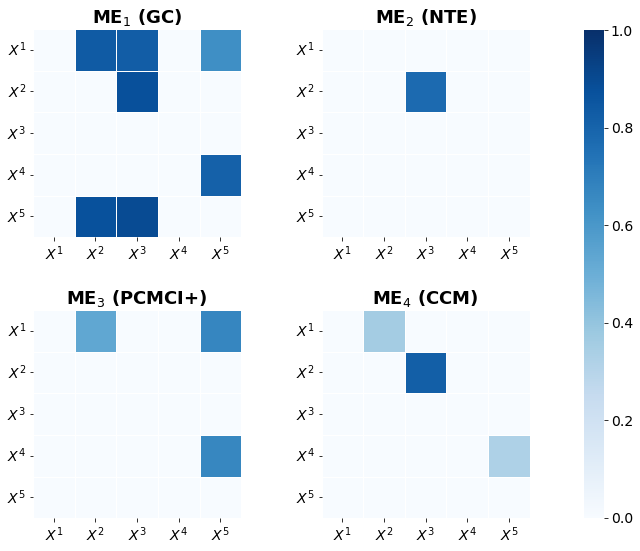

In [22]:
f, axes = plt.subplots(2, 2, figsize=(9,9))

f_1 = sns.heatmap(m_04, 
                  ax=axes[0][0], 
                  vmin=0, 
                  vmax=1, 
                  cmap='Blues', 
                  cbar=False, 
                  linewidths=.5, 
                  xticklabels=feature_names, 
                  yticklabels=feature_names,
                  annot_kws={'size':14},
                  square=True,
                  annot=False)
f_1.set_xticklabels(f_1.get_xticklabels(), fontsize=14)
f_1.set_yticklabels(f_1.get_yticklabels(), rotation=0, fontsize=14)
f_1.set_title('$\mathbf{ME}_1$ (GC)', fontsize=18, fontweight='bold')

f_2 = sns.heatmap(m_02, 
                  ax=axes[0][1], 
                  vmin=0, 
                  vmax=1, 
                  cmap='Blues', 
                  cbar=False, 
                  linewidths=.5, 
                  xticklabels=feature_names, 
                  yticklabels=feature_names, 
                  annot_kws={'size':14},
                  square=True,
                  annot=False)
f_2.set_xticklabels(f_2.get_xticklabels(), fontsize=14)
f_2.set_yticklabels(f_2.get_yticklabels(), rotation=0, fontsize=14)
f_2.set_title('$\mathbf{ME}_2$ (NTE)', fontsize=18, fontweight='bold')

f_3 = sns.heatmap(m_03, 
                  ax=axes[1][0], 
                  vmin=0, 
                  vmax=1, 
                  cmap='Blues', 
                  cbar=False, 
                  linewidths=.5, 
                  xticklabels=feature_names, 
                  yticklabels=feature_names, 
                  annot_kws={'size':14},
                  square=True,
                  annot=False)
f_3.set_xticklabels(f_3.get_xticklabels(), fontsize=14)
f_3.set_yticklabels(f_3.get_yticklabels(), rotation=0, fontsize=14)
f_3.set_title('$\mathbf{ME}_3$ (PCMCI+)', fontsize=18, fontweight='bold')

cbar_ax = f.add_axes([.98, .126, .03, 0.752])
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)

f_4 = sns.heatmap(m_01, 
                  ax=axes[1][1], 
                  vmin=0, 
                  vmax=1, 
                  cmap='Blues', 
                  cbar_ax=cbar_ax, 
                  linewidths=.5, 
                  xticklabels=feature_names, 
                  yticklabels=feature_names, 
                  annot_kws={'size':14},
                  square=True,
                  annot=False)
f_4.set_xticklabels(f_4.get_xticklabels(), fontsize=14)
f_4.set_yticklabels(f_4.get_yticklabels(), rotation=0, fontsize=14)
f_4.set_title('$\mathbf{ME}_4$ (CCM)', fontsize=18, fontweight='bold')

plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.savefig('C:/Users/zhipe/OneDrive/Desktop/Master thesis/codes/examples/results/Figure_4_9.jpg', 
            bbox_inches = 'tight',
            pad_inches=0.2,
            dpi=300)


In [23]:
score = ce.evaluation()
print('Normalized_score:')
print(score)

Normalized_score:
0.8


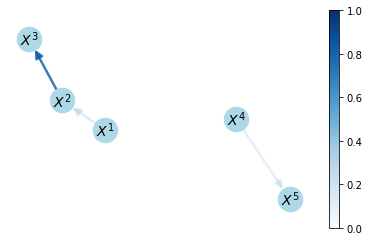

In [36]:
Graphic = causality_plotting(strength=m_01, 
                             feature_names=feature_names, 
                             #title='Example_1: Linear FakeData', 
                             name_size='short',
                             node_color="lightblue",
                             node_size = 600,
                             title_size=16,
                             seed=0)

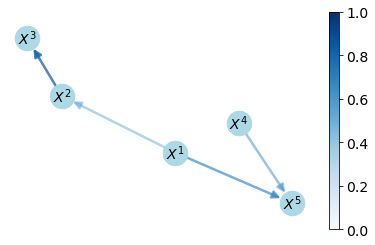

In [24]:
Graphic = causality_plotting(strength=strength_ensemble, 
                             feature_names=feature_names, 
                             #title='Example_1: Linear FakeData', 
                             name_size='short',
                             node_color="lightblue",
                             node_size = 600,
                             title_size=16,
                             seed=0)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)

plt.savefig('C:/Users/zhipe/OneDrive/Desktop/Master thesis/codes/examples/results/Figure_4_10.jpg', 
            bbox_inches = 'tight',
            pad_inches=0.2,
            dpi=300)

In [25]:
result = np.array([
    [0.,1.,0.,0.,1.],
    [0.,0.,1.,0.,0.],
    [0.,0.,0.,0.,0.],
    [0.,0.,0.,0.,1.],
    [0.,0.,0.,0.,0.],
 ])

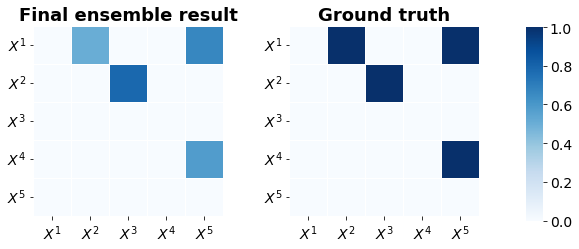

In [26]:
f_1, axes_1 = plt.subplots(1, 2, figsize=(8,8))
cbar_ax_1 = f_1.add_axes([.98, .33, .03, 0.336])

fig_0 = sns.heatmap(strength_ensemble, 
                    ax=axes_1[0], 
                    vmin=0, 
                    vmax=1, 
                    cmap='Blues', 
                    cbar=False, 
                    linewidths=.5, 
                    xticklabels=feature_names, 
                    yticklabels=feature_names, 
                    annot_kws={'size':14},
                    square=True,
                    annot=False)
fig_0.set_xticklabels(fig_0.get_xticklabels(), fontsize=14)
fig_0.set_yticklabels(fig_0.get_yticklabels(), rotation=0, fontsize=14)
fig_0.set_title('Final ensemble result', fontsize=18, fontweight='bold')

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)

fig_1 = sns.heatmap(result, 
                    ax=axes_1[1], 
                    vmin=0, 
                    vmax=1, 
                    cmap='Blues', 
                    cbar_ax=cbar_ax_1, 
                    linewidths=.5, 
                    xticklabels=feature_names, 
                    yticklabels=feature_names, 
                    square=True)
fig_1.set_xticklabels(fig_1.get_xticklabels(), fontsize=14)
fig_1.set_yticklabels(fig_1.get_yticklabels(), rotation=0, fontsize=14)
fig_1.set_title('Ground truth', fontsize=18, fontweight='bold')



plt.subplots_adjust(wspace=0.35)

plt.savefig('C:/Users/zhipe/OneDrive/Desktop/Master thesis/codes/examples/results/Figure_4_11.jpg', 
            bbox_inches = 'tight',
            pad_inches=0.2,
            dpi=300)


